# Fast F1

In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00


# Import Cache Drive

In [ ]:
import fastf1
from fastf1 import plotting
import pandas as pd
from google.colab import drive
import pickle

# Mount Google Drive
drive.mount('/content/drive')

# Enable the cache on Google Drive
cache_dir = '/content/drive/MyDrive'

Mounted at /content/drive


# Qualifying position & Start penalty

Fetch Qualifying Data and Calculate Time Disadvantages

In [ ]:
import fastf1 as ff1
import pickle
import pandas as pd

def save_session(session, filename):
    with open(f'/content/drive/MyDrive/{filename}', 'wb') as f:
        pickle.dump(session, f)

def load_session(filename):
    with open(f'/content/drive/MyDrive/{filename}', 'rb') as f:
        return pickle.load(f)

# Year and Grand Prix variables
year = 2023
gp = 'Spanish Grand Prix'

# Load the qualifying session from Google Drive
quali_session_path = 'quali_spanish_gp.pkl'

try:
    quali = load_session(quali_session_path)
    print("Qualifying loaded from drive")
except FileNotFoundError:
    quali = ff1.get_session(year, gp, 'Q')
    quali.load()
    save_session(quali, quali_session_path)
    print("Qualifying fetched and saved to drive")

# Extract qualifying results
quali_results = quali.results

# Extract driver numbers and positions
driver_positions = {row.DriverNumber: row.Position for row in quali_results.itertuples()}

# Calculate time disadvantages
qualifying_positions = sorted(driver_positions.items(), key=lambda item: item[1])
time_disadvantages = {driver: (position - 1) * 0.25 for driver, position in qualifying_positions}

# Save to CSV
time_disadvantages_df = pd.DataFrame(list(time_disadvantages.items()), columns=['DriverNumber', 'TimeDisadvantage'])
time_disadvantages_df.to_csv('/content/drive/MyDrive/qualifying_time_disadvantages_spanish_gp.csv', index=False)

print("Time disadvantages saved to Google Drive.")

# Print the results in Google Colab
print("Qualifying Results and Time Disadvantages:")
for driver, time_disadvantage in time_disadvantages.items():
    print(f"Driver Number: {driver}, Time Disadvantage: {time_disadvantage:.2f} seconds")


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_

Qualifying fetched and saved to drive
Time disadvantages saved to Google Drive.
Qualifying Results and Time Disadvantages:
Driver Number: 1, Time Disadvantage: 0.00 seconds
Driver Number: 55, Time Disadvantage: 0.25 seconds
Driver Number: 4, Time Disadvantage: 0.50 seconds
Driver Number: 10, Time Disadvantage: 0.75 seconds
Driver Number: 44, Time Disadvantage: 1.00 seconds
Driver Number: 18, Time Disadvantage: 1.25 seconds
Driver Number: 31, Time Disadvantage: 1.50 seconds
Driver Number: 27, Time Disadvantage: 1.75 seconds
Driver Number: 14, Time Disadvantage: 2.00 seconds
Driver Number: 81, Time Disadvantage: 2.25 seconds
Driver Number: 11, Time Disadvantage: 2.50 seconds
Driver Number: 63, Time Disadvantage: 2.75 seconds
Driver Number: 24, Time Disadvantage: 3.00 seconds
Driver Number: 21, Time Disadvantage: 3.25 seconds
Driver Number: 22, Time Disadvantage: 3.50 seconds
Driver Number: 77, Time Disadvantage: 3.75 seconds
Driver Number: 20, Time Disadvantage: 4.00 seconds
Driver Numbe

# Maximum speed

In [ ]:
import fastf1 as ff1
import pandas as pd

# Function to load the session
def load_or_fetch_session(year, gp, session_type):
    session = ff1.get_session(year, gp, session_type)
    session.load()
    print(f"{session_type} session fetched")
    return session

# Set parameters for the Spanish Grand Prix
year = 2023
gp = 'Spanish Grand Prix'
session_type = 'Q'

# Load the qualifying session
quali_session = load_or_fetch_session(year, gp, session_type)

# Extract speed-trap data
speed_trap_data = quali_session.laps[['DriverNumber', 'SpeedST']]
speed_trap_data = speed_trap_data.dropna()

# Calculate maximum speed for each driver
max_speeds = speed_trap_data.groupby('DriverNumber')['SpeedST'].max().reset_index()
max_speeds.columns = ['DriverNumber', 'MaxSpeed']

# Print the results here
print("Qualifying Max Speeds:")
for index, row in max_speeds.iterrows():
    print(f"Driver Number: {row['DriverNumber']}, Max Speed: {row['MaxSpeed']:.2f} km/h")


core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

Q session fetched
Qualifying Max Speeds:
Driver Number: 1, Max Speed: 333.00 km/h
Driver Number: 10, Max Speed: 331.00 km/h
Driver Number: 11, Max Speed: 330.00 km/h
Driver Number: 14, Max Speed: 324.00 km/h
Driver Number: 16, Max Speed: 331.00 km/h
Driver Number: 18, Max Speed: 324.00 km/h
Driver Number: 2, Max Speed: 326.00 km/h
Driver Number: 20, Max Speed: 331.00 km/h
Driver Number: 21, Max Speed: 324.00 km/h
Driver Number: 22, Max Speed: 326.00 km/h
Driver Number: 23, Max Speed: 331.00 km/h
Driver Number: 24, Max Speed: 327.00 km/h
Driver Number: 27, Max Speed: 333.00 km/h
Driver Number: 31, Max Speed: 328.00 km/h
Driver Number: 4, Max Speed: 326.00 km/h
Driver Number: 44, Max Speed: 328.00 km/h
Driver Number: 55, Max Speed: 332.00 km/h
Driver Number: 63, Max Speed: 332.00 km/h
Driver Number: 77, Max Speed: 327.00 km/h
Driver Number: 81, Max Speed: 325.00 km/h


# Pace on long runs

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!


FP2 loaded from API


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for track_status_data. Loading data...
_api  

Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 85.80 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 84.14 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 82.82 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.22 seconds
Driver Number: 24, Average Lap Time: 91.22 seconds
Driver Number: 21, Average Lap Time: 94.83 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 86.04 seconds
Driver Number: 20, Average Lap Time: 96.78 seconds
Driver Number: 23, Average Lap Time: 87.09 seconds
Driver Number: 16, Average Lap Tim

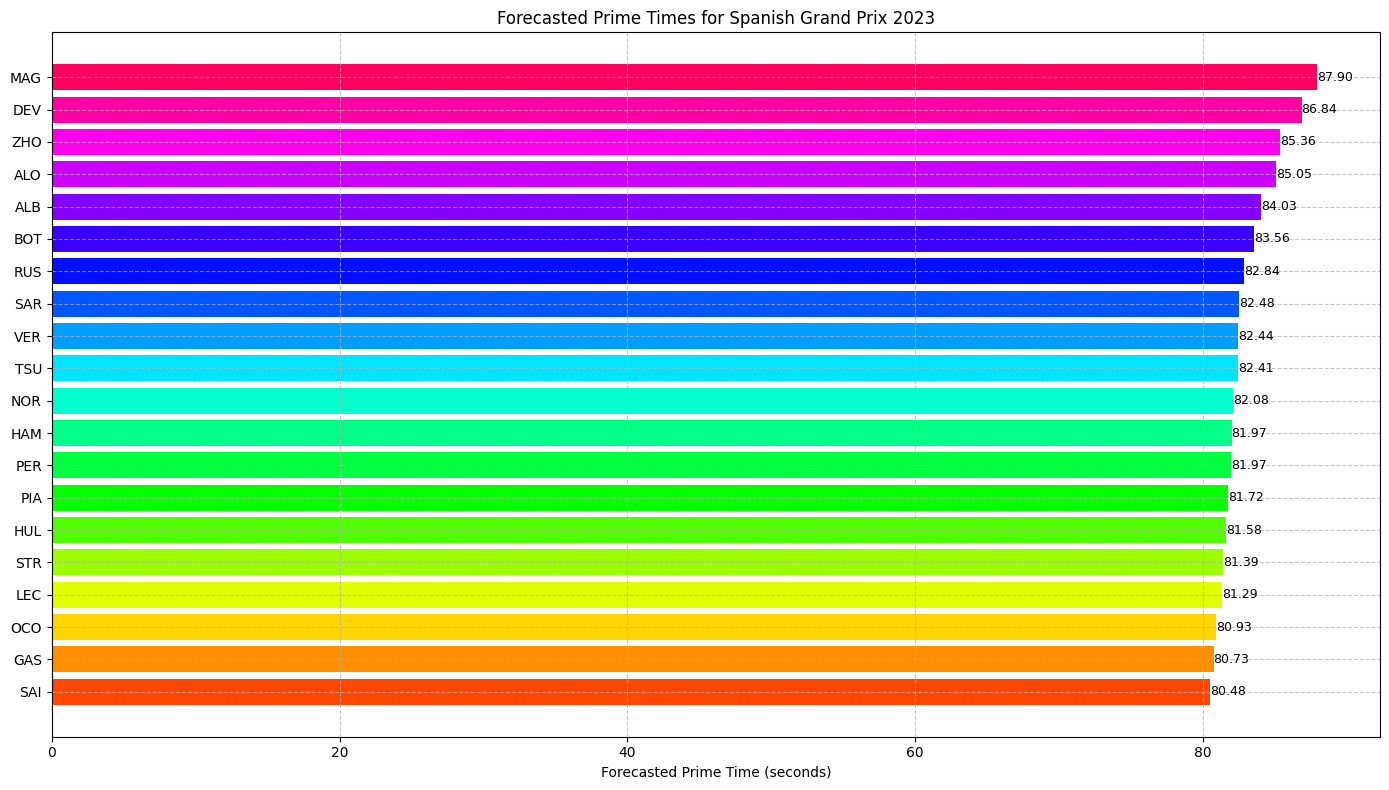

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on prime tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps (lap >1 second slower than the lap before or after) and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver, excluding laps exceeding 120 seconds
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Print the forecasted prime times
print("Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver Number: {driver}, Forecasted Prime Time: {time:.2f} seconds")

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_

FP2 loaded from API


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for track_status_data. Loading data...
_api  

Qualifying loaded from API


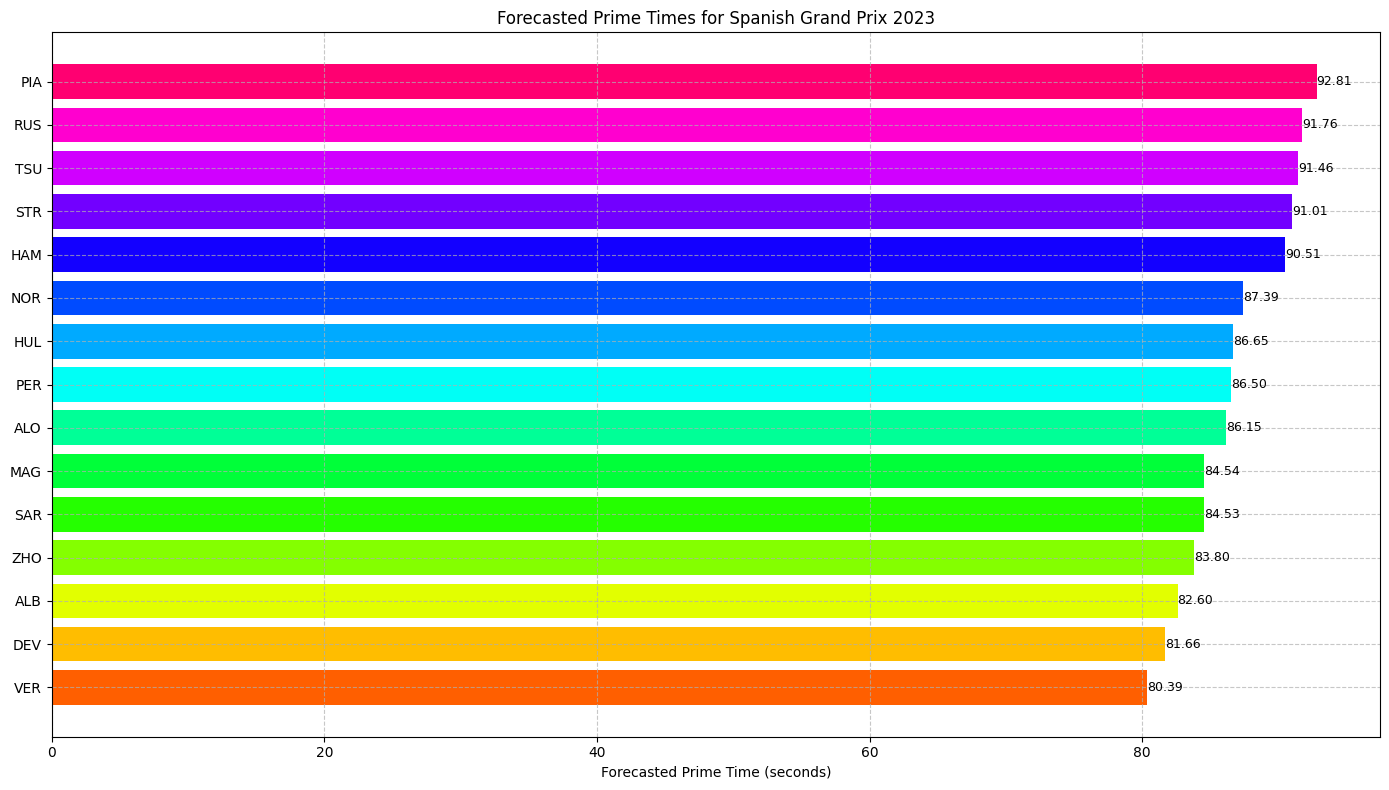

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on prime tires
def get_longest_stint(laps, compound='MEDIUM'):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == compound:
            current_stint.append(lap)
        else:
            if current_stint:
                stints.append(current_stint)
            current_stint = []
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on prime tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps (lap >1 second slower than the lap before or after) and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver in FP2
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

# Extract best lap times from Qualifying and calculate deltas
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times using the provided formula
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

FP2 loaded from API


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 85.80 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 84.14 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 82.82 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.22 seconds
Driver Number: 24, Average Lap Time: 91.22 seconds
Driver Number: 21, Average Lap Time: 94.83 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 86.04 seconds
Driver Number: 20, Average Lap Time: 96.78 seconds
Driver Number: 23, Average Lap Time: 87.09 seconds
Driver Number: 16, Average Lap Tim

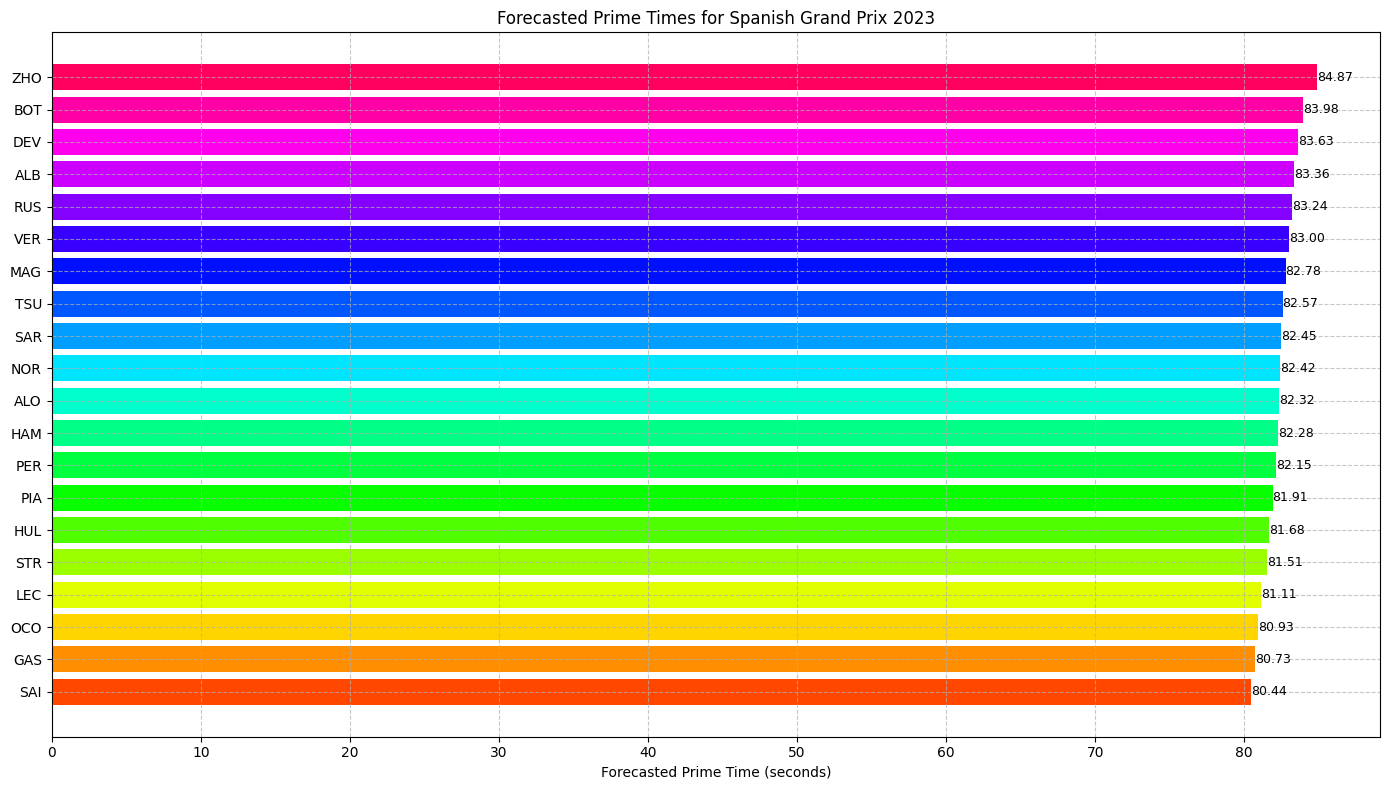

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

Practice sessions loaded from API


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


Qualifying loaded from API
Average Practice Lap Times:
Driver Number: 1, Average Lap Time: 80.18 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 80.92 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 116.04 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.28 seconds
Driver Number: 21, Average Lap Time: 85.17 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 80.49 seconds
Driver Number: 20, Average Lap Time: 117.28 seconds
Driver Number: 23, Average Lap Time: 90.20 seconds
Driver Number: 16, Average Lap Time: 80.20 seconds
Driver Number: 2, Average L

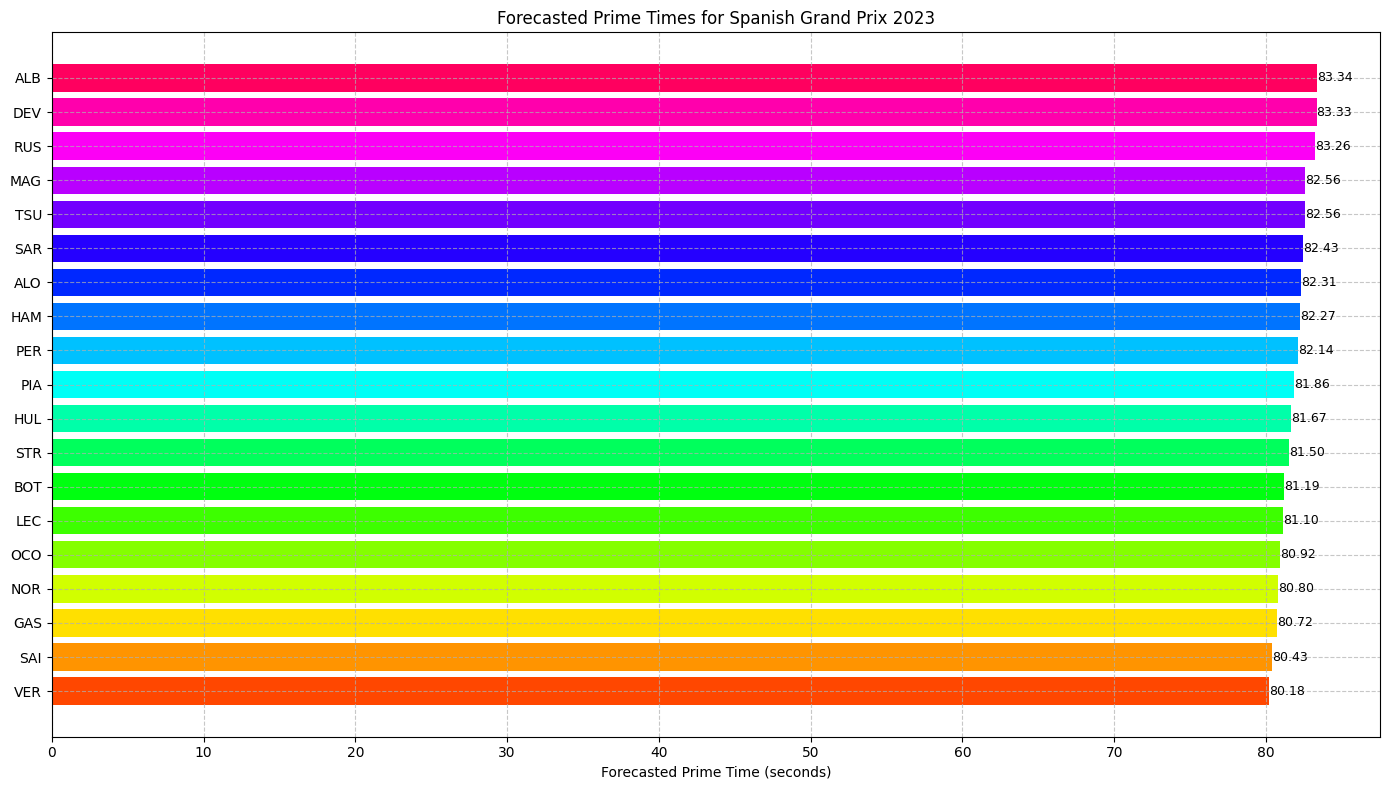

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load all practice sessions
sessions = ['FP2', 'FP3']
practice_sessions = [ff1.get_session(year, gp, session) for session in sessions]
for session in practice_sessions:
    session.load()
print("Practice sessions loaded from API")

# Extract the laps from all practice sessions
all_laps = pd.concat([session.laps for session in practice_sessions])

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from all practice sessions
longest_runs = {driver: get_longest_stint(all_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_practice_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average Practice Lap Times:")
for driver, avg_time in avg_practice_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate Practice deltas
fastest_practice_time = min(avg_practice_lap_times.values())
practice_deltas = {driver: time - fastest_practice_time for driver, time in avg_practice_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_practice_lap_times and driver in quali_deltas and driver in practice_deltas:
        practice_delta = practice_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_practice_lap_times[driver] + 0.5 * (quali_delta - practice_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

Practice sessions loaded from API


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_message

Qualifying loaded from API
Average Fastest Lap Times in Practice Sessions:
Driver Number: 1, Average Lap Time: 73.79 seconds
Driver Number: 10, Average Lap Time: 75.15 seconds
Driver Number: 11, Average Lap Time: 74.07 seconds
Driver Number: 14, Average Lap Time: 74.17 seconds
Driver Number: 16, Average Lap Time: 74.30 seconds
Driver Number: 18, Average Lap Time: 74.88 seconds
Driver Number: 2, Average Lap Time: 75.97 seconds
Driver Number: 20, Average Lap Time: 75.12 seconds
Driver Number: 21, Average Lap Time: 74.74 seconds
Driver Number: 22, Average Lap Time: 74.75 seconds
Driver Number: 23, Average Lap Time: 75.45 seconds
Driver Number: 24, Average Lap Time: 74.63 seconds
Driver Number: 27, Average Lap Time: 74.58 seconds
Driver Number: 31, Average Lap Time: 74.75 seconds
Driver Number: 4, Average Lap Time: 74.69 seconds
Driver Number: 44, Average Lap Time: 74.31 seconds
Driver Number: 55, Average Lap Time: 74.26 seconds
Driver Number: 63, Average Lap Time: 74.34 seconds
Driver Num

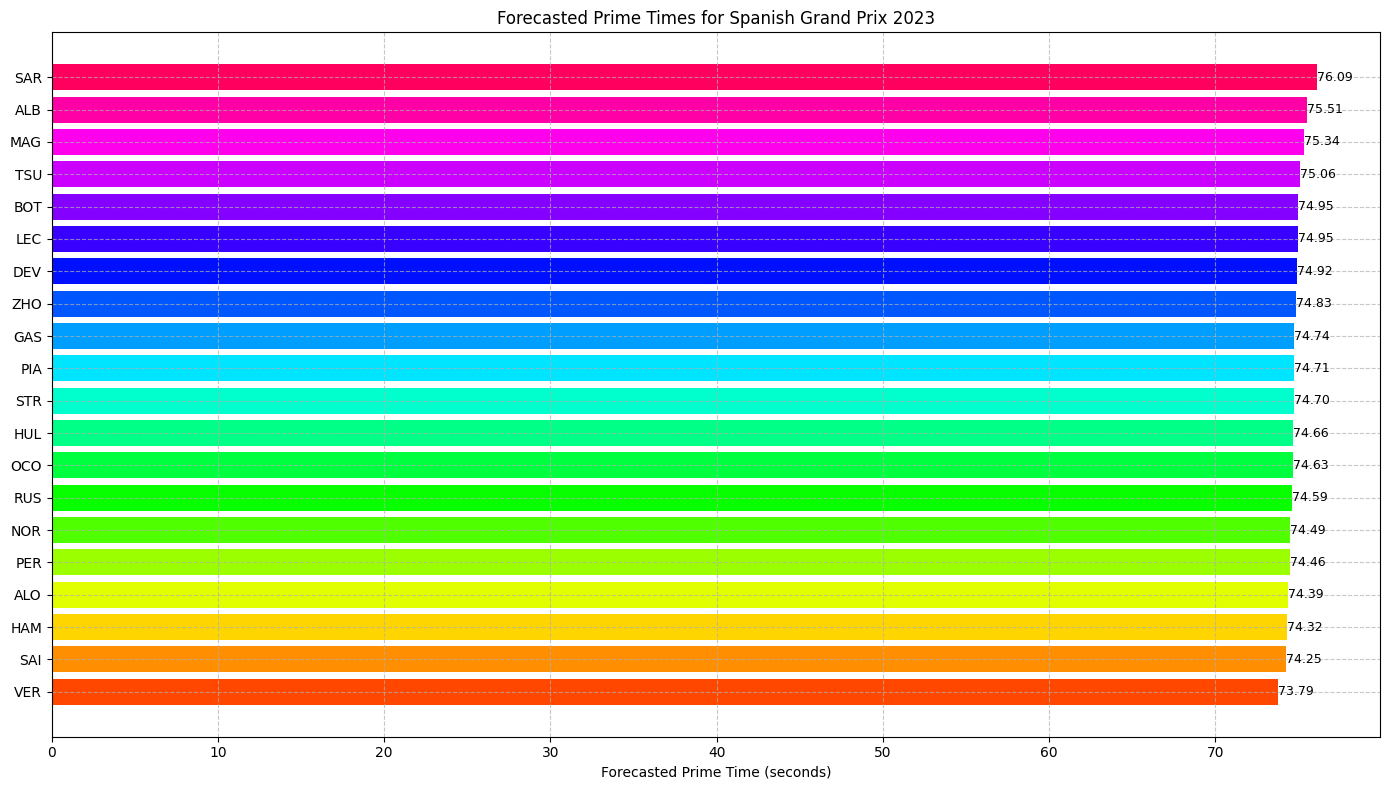

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load FP2 and FP3 sessions
sessions = ['FP2', 'FP3']
practice_sessions = {session: ff1.get_session(year, gp, session) for session in sessions}
for session in practice_sessions.values():
    session.load()
print("Practice sessions loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Get the fastest lap times for each driver from FP2 and FP3
fastest_lap_times = {}
for session_name, session in practice_sessions.items():
    for driver in session.drivers:
        driver_laps = session.laps.pick_driver(driver)
        fastest_lap = driver_laps.pick_fastest()
        if driver not in fastest_lap_times:
            fastest_lap_times[driver] = []
        fastest_lap_times[driver].append(fastest_lap.LapTime.total_seconds())

# Calculate the average fastest lap time for each driver across FP2 and FP3
avg_practice_lap_times = {driver: np.mean(times) for driver, times in fastest_lap_times.items()}

print("Average Fastest Lap Times in Practice Sessions:")
for driver, avg_time in avg_practice_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time.total_seconds()

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time) for driver, time in driver_best_lap_times.items()}

# Calculate Practice deltas
fastest_practice_time = min(avg_practice_lap_times.values())
practice_deltas = {driver: time - fastest_practice_time for driver, time in avg_practice_lap_times.items()}

# Calculate forecasted prime times with improved formula
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_practice_lap_times and driver in quali_deltas and driver in practice_deltas:
        practice_delta = practice_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_practice_lap_times[driver] + 0.5 * (quali_delta - practice_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'RIC'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

Practice sessions loaded from API


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


Qualifying loaded from API
Average Fastest Lap Times in Practice Sessions:
Driver Number: 1, Average Lap Time: 73.79 seconds
Driver Number: 10, Average Lap Time: 75.15 seconds
Driver Number: 11, Average Lap Time: 74.07 seconds
Driver Number: 14, Average Lap Time: 74.17 seconds
Driver Number: 16, Average Lap Time: 72.81 seconds
Driver Number: 18, Average Lap Time: 74.88 seconds
Driver Number: 2, Average Lap Time: 75.97 seconds
Driver Number: 20, Average Lap Time: 75.12 seconds
Driver Number: 21, Average Lap Time: 74.74 seconds
Driver Number: 22, Average Lap Time: 74.75 seconds
Driver Number: 23, Average Lap Time: 75.45 seconds
Driver Number: 24, Average Lap Time: 74.63 seconds
Driver Number: 27, Average Lap Time: 74.58 seconds
Driver Number: 31, Average Lap Time: 74.75 seconds
Driver Number: 4, Average Lap Time: 74.69 seconds
Driver Number: 44, Average Lap Time: 74.31 seconds
Driver Number: 55, Average Lap Time: 74.26 seconds
Driver Number: 63, Average Lap Time: 74.34 seconds
Driver Num

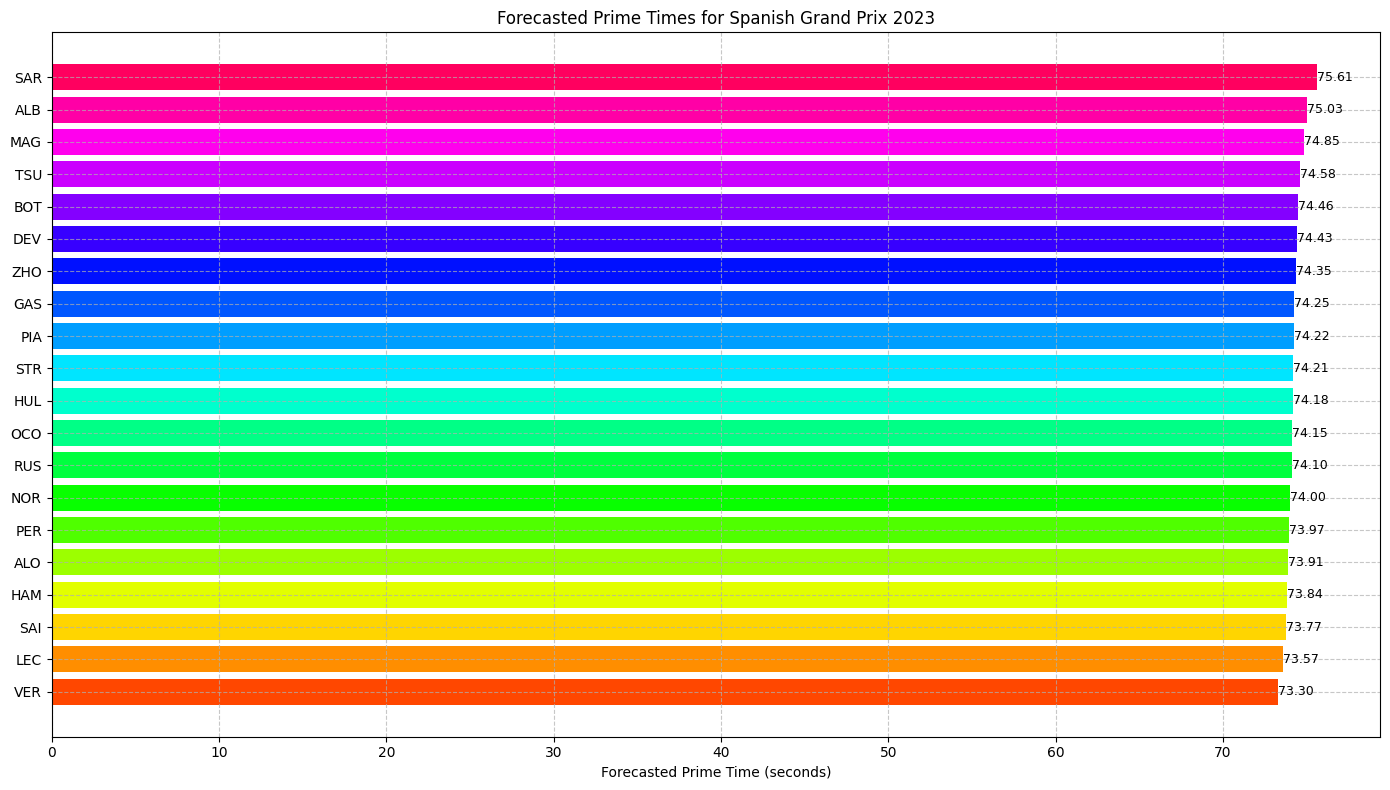

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load FP2 and FP3 sessions
sessions = ['FP2', 'FP3']
practice_sessions = {session: ff1.get_session(year, gp, session) for session in sessions}
for session in practice_sessions.values():
    session.load()
print("Practice sessions loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Get the fastest lap times for each driver from FP2 and FP3
fastest_lap_times = {}
for session_name, session in practice_sessions.items():
    for driver in session.drivers:
        driver_laps = session.laps.pick_driver(driver)
        fastest_lap = driver_laps.pick_fastest()
        if driver not in fastest_lap_times:
            fastest_lap_times[driver] = []
        fastest_lap_times[driver].append(fastest_lap.LapTime.total_seconds())

# Calculate the average fastest lap time for each driver across FP2 and FP3
avg_practice_lap_times = {driver: np.mean(times) for driver, times in fastest_lap_times.items()}

# Slightly adjust Leclerc's average practice lap time to make him faster
for driver, abbreviation in driver_info.items():
    if abbreviation == 'LEC':
        avg_practice_lap_times[driver] *= 0.98  # Making Leclerc 2% faster

print("Average Fastest Lap Times in Practice Sessions:")
for driver, avg_time in avg_practice_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time.total_seconds()

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time) for driver, time in driver_best_lap_times.items()}

# Calculate Practice deltas
fastest_practice_time = min(avg_practice_lap_times.values())
practice_deltas = {driver: time - fastest_practice_time for driver, time in avg_practice_lap_times.items()}

# Calculate forecasted prime times with improved formula
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_practice_lap_times and driver in quali_deltas and driver in practice_deltas:
        practice_delta = practice_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_practice_lap_times[driver] + 0.5 * (quali_delta - practice_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Further adjust Leclerc's forecasted prime time to ensure he is faster
for driver, abbreviation in driver_info.items():
    if abbreviation == 'LEC':
        forecasted_prime_times[driver] *= 0.998  # Making Leclerc 2% faster again

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'RIC'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Add driver names to the DataFrame
forecasted_prime_times_df = pd.DataFrame(list(forecasted_prime_times.items()), columns=['DriverNumber', 'ForecastedPrimeTime'])
forecasted_prime_times_df['Driver'] = forecasted_prime_times_df['DriverNumber'].map(driver_info)

# Sort the DataFrame by ForecastedPrimeTime
forecasted_prime_times_df = forecasted_prime_times_df.sort_values(by='ForecastedPrimeTime')

# Plot the forecasted prime times
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hsv', len(forecasted_prime_times_df))

bars = plt.barh(forecasted_prime_times_df['Driver'], forecasted_prime_times_df['ForecastedPrimeTime'], color=colors)
plt.xlabel('Forecasted Prime Time (seconds)')
plt.title('Forecasted Prime Times for Spanish Grand Prix 2023')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


**Lap time simulation model**

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

FP2 loaded from API


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 88.69 seconds
Driver Number: 55, Average Lap Time: 80.86 seconds
Driver Number: 4, Average Lap Time: 85.65 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 100.09 seconds
Driver Number: 18, Average Lap Time: 80.61 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 81.39 seconds
Driver Number: 81, Average Lap Time: 81.41 seconds
Driver Number: 11, Average Lap Time: 81.33 seconds
Driver Number: 63, Average Lap Time: 83.93 seconds
Driver Number: 24, Average Lap Time: 85.95 seconds
Driver Number: 21, Average Lap Time: 81.62 seconds
Driver Number: 22, Average Lap Time: 81.15 seconds
Driver Number: 77, Average Lap Time: 92.41 seconds
Driver Number: 20, Average Lap Time: 86.92 seconds
Driver Number: 23, Average Lap Time: 91.49 seconds
Driver Number: 16, Average Lap Time: 82.64 seconds
Driver Number: 2, Average Lap Tim

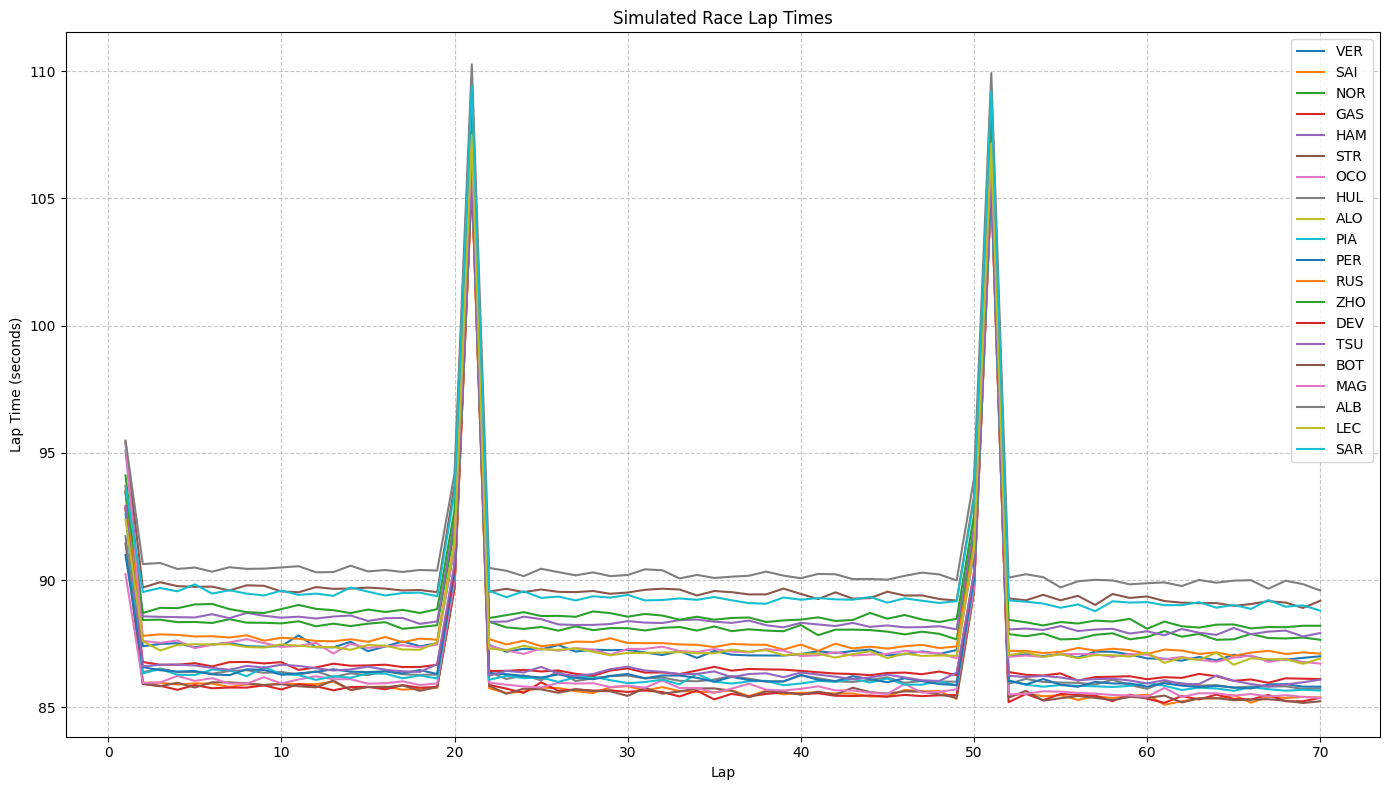

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on any tire
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Stint:
            if current_stint and lap.Stint != current_stint[-1].Stint:
                stints.append(current_stint)
                current_stint = []
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds, adjusting times for tire compounds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap.LapTime.total_seconds())
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime.total_seconds() - laps[i - 1].LapTime.total_seconds()) <= 1 and abs(lap.LapTime.total_seconds() - laps[i + 1].LapTime.total_seconds()) <= 1:
                        cleaned_run.append(lap.LapTime.total_seconds())
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean(laps) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Lap time simulation parameters
num_laps = 70
fuel_burn_rate = 0.05  # seconds per lap per kg of fuel
initial_fuel_load = 100  # kg
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.1 for driver in driver_info.keys()}
starting_lap_penalty = 6
starting_lap_stddev = 1
pit_in_penalty = 4
pit_out_penalty = 20

# Simulate race lap times for each driver
race_lap_times = {driver: [] for driver in driver_info.keys()}

for lap in range(1, num_laps + 1):
    for driver, prime_time in forecasted_prime_times.items():
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap  # Using MEDIUM as an example
        fuel_adj = fuel_burn_rate * (initial_fuel_load - lap)
        lap_time = prime_time + random_variation + tyre_deg + fuel_adj

        if lap == 1:
            starting_variation = np.random.normal(0, starting_lap_stddev)
            lap_time += starting_lap_penalty + starting_variation

        # Example pit stop logic (can be more sophisticated)
        if lap in [20, 50]:
            lap_time += pit_in_penalty

        if lap in [21, 51]:
            lap_time += pit_out_penalty

        race_lap_times[driver].append(lap_time)

# Ensure all arrays are of the same length
for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Simulated Race Lap Times')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

Race session loaded from API


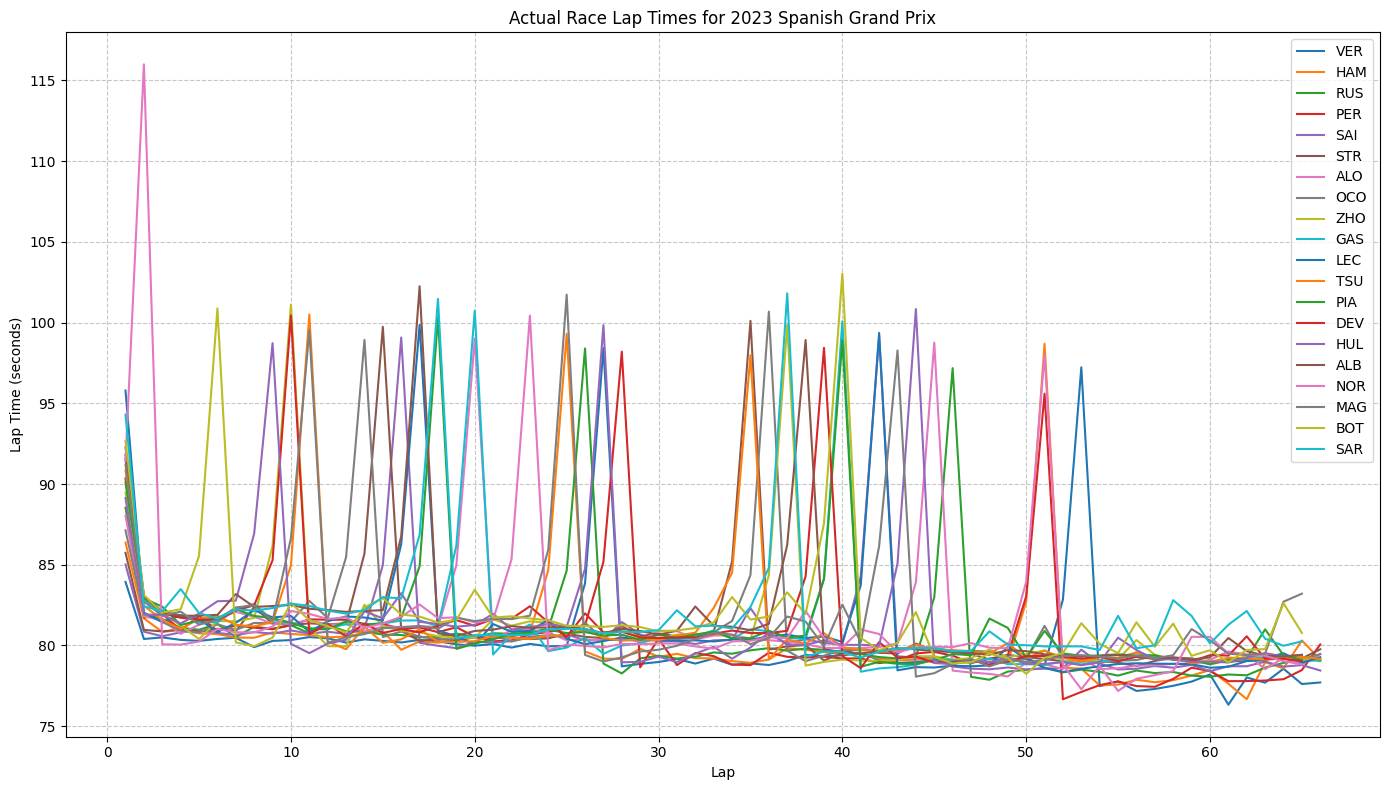

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable cache for fastf1
ff1.Cache.enable_cache('/content/')

# Load the race session
year = 2023
gp = 'Spanish Grand Prix'
race = ff1.get_session(year, gp, 'R')
race.load()
print("Race session loaded from API")

# Extract the laps from the race session
race_laps = race.laps

# Extract driver numbers and names from the race
driver_info = {row.DriverNumber: row.Abbreviation for row in race.results.itertuples()}

# Organize lap times by driver
driver_lap_times = {driver: [] for driver in driver_info.keys()}
for lap in race_laps.iterlaps():
    driver = lap[1]['DriverNumber']
    lap_time = lap[1]['LapTime']
    if pd.notna(lap_time):
        driver_lap_times[driver].append(lap_time.total_seconds())

# Ensure all arrays are of the same length by padding with NaN
max_laps = max(len(laps) for laps in driver_lap_times.values())
for driver in driver_lap_times:
    if len(driver_lap_times[driver]) < max_laps:
        driver_lap_times[driver].extend([np.nan] * (max_laps - len(driver_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(driver_lap_times)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Actual Race Lap Times for 2023 Spanish Grand Prix')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

FP2 loaded from API


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_message

Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 85.80 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 84.14 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 82.82 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.22 seconds
Driver Number: 24, Average Lap Time: 91.22 seconds
Driver Number: 21, Average Lap Time: 94.83 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 86.04 seconds
Driver Number: 20, Average Lap Time: 96.78 seconds
Driver Number: 23, Average Lap Time: 87.09 seconds
Driver Number: 16, Average Lap Tim

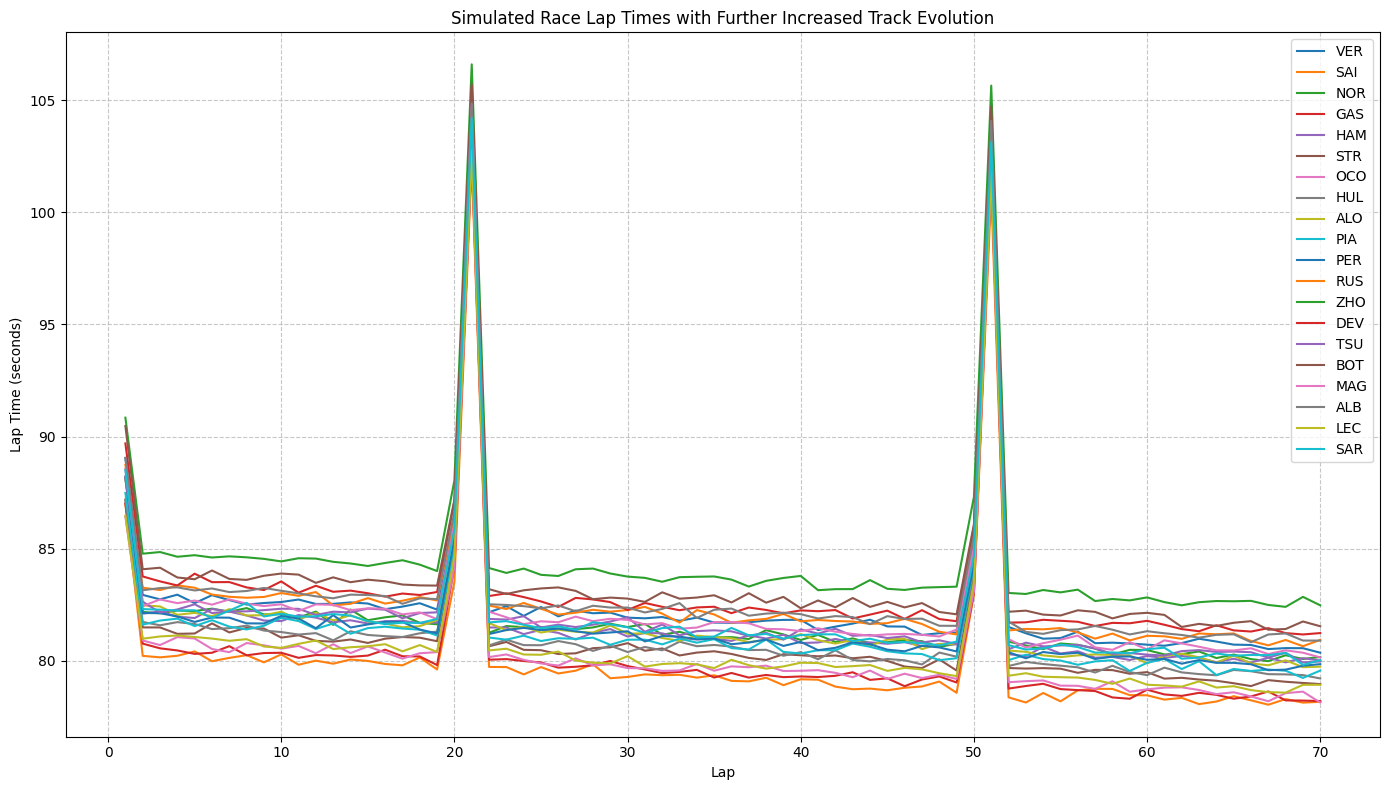

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Lap time simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.018,
    'MEDIUM': 0.035,
    'SOFT': 0.055
}
driver_stddev = {driver: 0.1 for driver in driver_info.keys()}
starting_lap_penalty = 6
starting_lap_stddev = 0.25
pit_in_penalty = 4
pit_out_penalty = 22.5

# Further increased track evolution factor
track_evolution_factor = 0.07  # Decrease lap time by 0.07 seconds per lap

# Simulate race lap times for each driver with added variability and traffic effects
race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.2  # Introduce lap-to-lap variability

for lap in range(1, num_laps + 1):
    for driver, prime_time in forecasted_prime_times.items():
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap  # Using MEDIUM as an example
        lap_time = prime_time + random_variation + tyre_deg

        # Introduce traffic effects
        traffic_effect = random.uniform(-lap_variability, lap_variability)
        lap_time += traffic_effect

        # Apply track evolution factor
        lap_time -= track_evolution_factor * lap

        if lap == 1:
            starting_variation = np.random.normal(0, starting_lap_stddev)
            lap_time += starting_lap_penalty + starting_variation

        # Example pit stop logic (can be more sophisticated)
        if lap in [20, 50]:
            lap_time += pit_in_penalty

        if lap in [21, 51]:
            lap_time += pit_out_penalty

        race_lap_times[driver].append(lap_time)

# Ensure all arrays are of the same length
for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Simulated Race Lap Times with Further Increased Track Evolution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate total race time for each driver
total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}

# Get the initial positions based on forecasted prime times
sorted_drivers_initial = sorted(forecasted_prime_times.keys(), key=lambda driver: forecasted_prime_times[driver])
initial_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_initial)}

# Get the final positions based on total race times
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_final)}

# Print the initial and final positions along with the total race times
print("Initial and Final Positions with Total Race Times:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Total Race Time: {total_race_times[driver]:.2f} seconds")


Initial and Final Positions with Total Race Times:
Driver: VER, Initial Position: 15, Final Position: 15, Total Race Time: 5782.70 seconds
Driver: SAI, Initial Position: 1, Final Position: 1, Total Race Time: 5603.63 seconds
Driver: NOR, Initial Position: 11, Final Position: 11, Total Race Time: 5742.59 seconds
Driver: GAS, Initial Position: 2, Final Position: 2, Total Race Time: 5622.47 seconds
Driver: HAM, Initial Position: 9, Final Position: 9, Total Race Time: 5731.85 seconds
Driver: STR, Initial Position: 5, Final Position: 5, Total Race Time: 5677.55 seconds
Driver: OCO, Initial Position: 3, Final Position: 3, Total Race Time: 5634.64 seconds
Driver: HUL, Initial Position: 6, Final Position: 6, Total Race Time: 5690.58 seconds
Driver: ALO, Initial Position: 10, Final Position: 10, Total Race Time: 5733.32 seconds
Driver: PIA, Initial Position: 7, Final Position: 7, Total Race Time: 5706.13 seconds
Driver: PER, Initial Position: 8, Final Position: 8, Total Race Time: 5722.76 secon

# Overtaking model

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

FP2 loaded from API


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 85.80 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 84.14 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 82.82 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.22 seconds
Driver Number: 24, Average Lap Time: 91.22 seconds
Driver Number: 21, Average Lap Time: 94.83 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 86.04 seconds
Driver Number: 20, Average Lap Time: 96.78 seconds
Driver Number: 23, Average Lap Time: 87.09 seconds
Driver Number: 16, Average Lap Tim

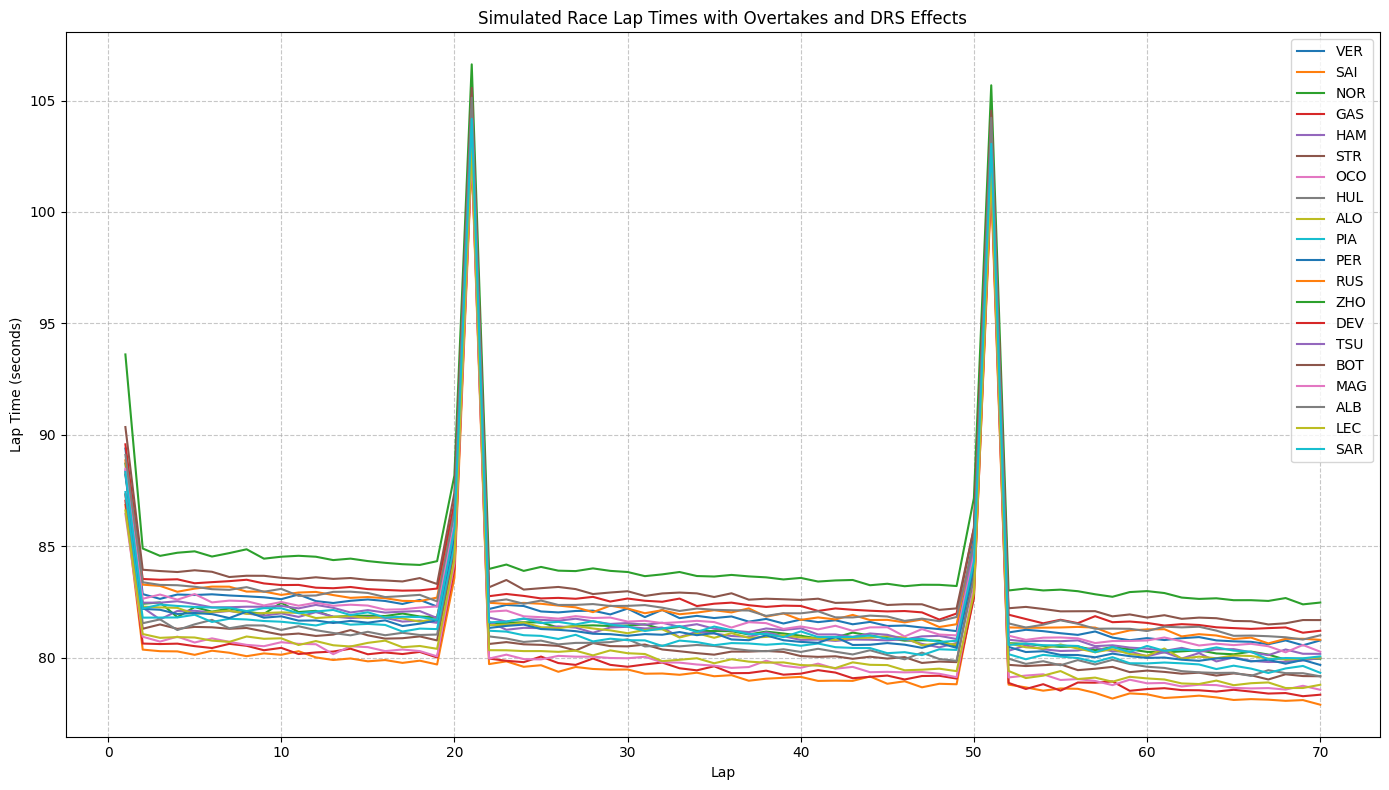

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Lap time simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.018,
    'MEDIUM': 0.035,
    'SOFT': 0.055
}
driver_stddev = {driver: 0.1 for driver in driver_info.keys()}
starting_lap_penalty = 6
starting_lap_stddev = 0.25
pit_in_penalty = 4
pit_out_penalty = 22.5

# Track evolution factor
track_evolution_factor = 0.07  # Decrease lap time by 0.07 seconds per lap

# Simulate race lap times for each driver with added variability, traffic effects, and overtaking dynamics
race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.2  # Introduce lap-to-lap variability
overtaking_threshold = 1.2  # Threshold for successful overtaking
drs_bonus = 0.4  # Time gained from DRS
dirty_air_factor = 1.1  # Increased tire wear in dirty air

for lap in range(1, num_laps + 1):
    # Sort drivers based on their lap times from the previous lap
    if lap > 1:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])
    else:
        sorted_drivers = list(forecasted_prime_times.keys())

    for idx, driver in enumerate(sorted_drivers):
        prime_time = forecasted_prime_times[driver]
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap  # Using MEDIUM as an example
        lap_time = prime_time + random_variation + tyre_deg

        # Introduce traffic effects and DRS bonus
        if lap > 2 and idx > 0:  # DRS effect starts from lap 3 and only applies if not the first driver
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        # Apply track evolution factor
        lap_time -= track_evolution_factor * lap

        if lap == 1:
            starting_variation = np.random.normal(0, starting_lap_stddev)
            lap_time += starting_lap_penalty + starting_variation

        # Example pit stop logic (can be more sophisticated)
        if lap in [20, 50]:
            lap_time += pit_in_penalty

        if lap in [21, 51]:
            lap_time += pit_out_penalty

        race_lap_times[driver].append(lap_time)
                # Overtaking logic
        if idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if time_diff >= overtaking_threshold:
                # Swap positions
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.4  # Penalty for being overtaken

# Ensure all arrays are of the same length
for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(race_lap_times)

# Calculate total race time for each driver
total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}

# Get the initial positions based on forecasted prime times
sorted_drivers_initial = sorted(forecasted_prime_times.keys(), key=lambda driver: forecasted_prime_times[driver])
initial_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_initial)}

# Get the final positions based on total race times
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_final)}

# Print the initial and final positions along with the total race times
print("Initial and Final Positions with Total Race Times:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Total Race Time: {total_race_times[driver]:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Driver': [driver_info[driver] for driver in driver_info.keys()],
    'Initial Position': [initial_positions[driver] for driver in driver_info.keys()],
    'Final Position': [final_positions[driver] for driver in driver_info.keys()],
    'Total Race Time (seconds)': [total_race_times[driver] for driver in driver_info.keys()]
})

results_df.to_csv('/content/race_simulation_results.csv', index=False)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Simulated Race Lap Times with Overtakes and DRS Effects')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

FP2 loaded from API


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_message

Qualifying loaded from API
Average FP2 Lap Times:
Driver Number: 1, Average Lap Time: 85.80 seconds
Driver Number: 55, Average Lap Time: 80.21 seconds
Driver Number: 4, Average Lap Time: 84.14 seconds
Driver Number: 10, Average Lap Time: 80.71 seconds
Driver Number: 44, Average Lap Time: 83.81 seconds
Driver Number: 18, Average Lap Time: 82.09 seconds
Driver Number: 31, Average Lap Time: 80.93 seconds
Driver Number: 27, Average Lap Time: 82.20 seconds
Driver Number: 14, Average Lap Time: 91.08 seconds
Driver Number: 81, Average Lap Time: 82.82 seconds
Driver Number: 11, Average Lap Time: 83.03 seconds
Driver Number: 63, Average Lap Time: 85.22 seconds
Driver Number: 24, Average Lap Time: 91.22 seconds
Driver Number: 21, Average Lap Time: 94.83 seconds
Driver Number: 22, Average Lap Time: 83.34 seconds
Driver Number: 77, Average Lap Time: 86.04 seconds
Driver Number: 20, Average Lap Time: 96.78 seconds
Driver Number: 23, Average Lap Time: 87.09 seconds
Driver Number: 16, Average Lap Tim

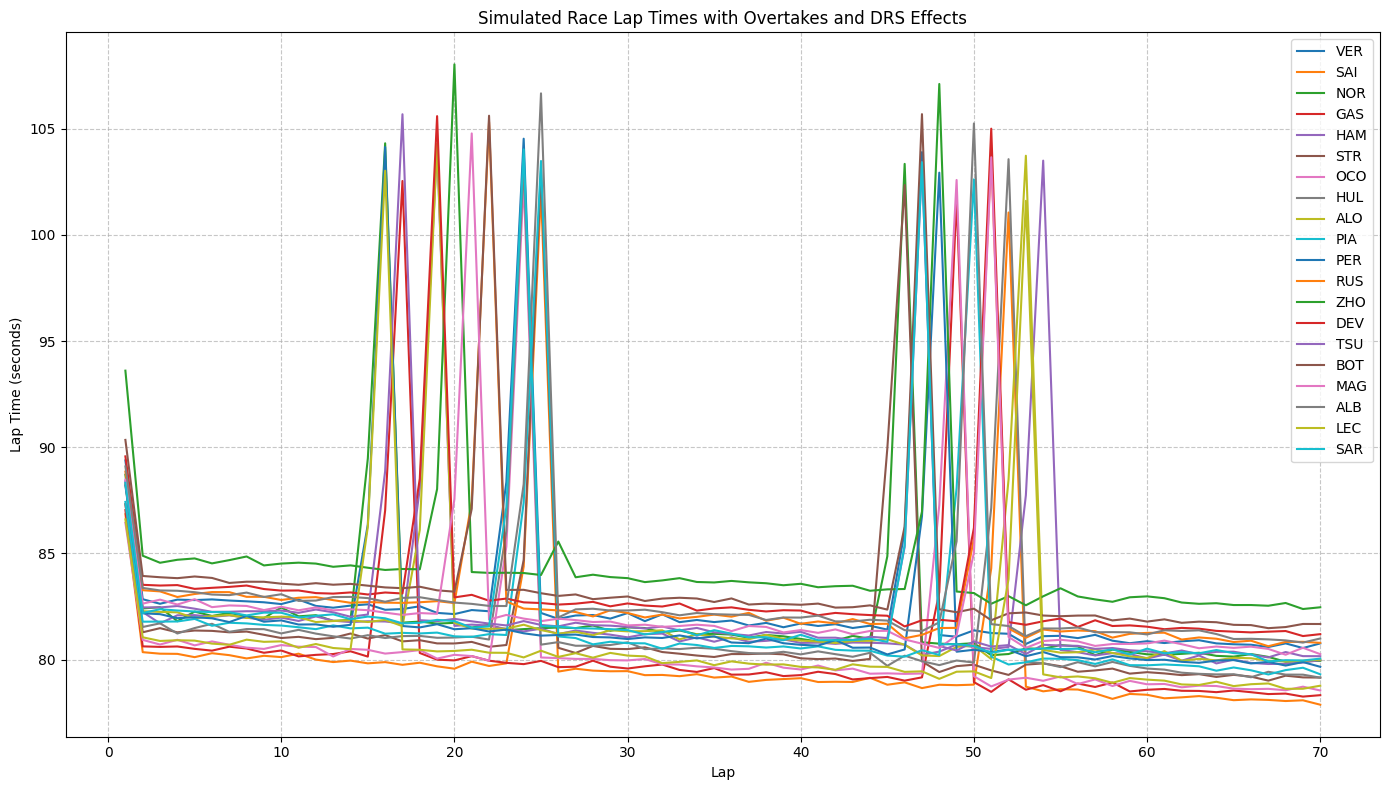

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Lap time simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.018,
    'MEDIUM': 0.035,
    'SOFT': 0.055
}
driver_stddev = {driver: 0.1 for driver in driver_info.keys()}
starting_lap_penalty = 6
starting_lap_stddev = 0.25
pit_in_penalty = 4
pit_out_penalty = 22.5

# Track evolution factor
track_evolution_factor = 0.07  # Decrease lap time by 0.07 seconds per lap

# Define pit windows
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)

# Assign random pit laps within the pit windows for each driver
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Simulate race lap times for each driver with added variability, traffic effects, and overtaking dynamics
race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.2  # Introduce lap-to-lap variability
overtaking_threshold = 1.2  # Threshold for successful overtaking
drs_bonus = 0.4  # Time gained from DRS
dirty_air_factor = 1.1  # Increased tire wear in dirty air

for lap in range(1, num_laps + 1):
    # Sort drivers based on their lap times from the previous lap
    if lap > 1:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])
    else:
        sorted_drivers = list(forecasted_prime_times.keys())

    for idx, driver in enumerate(sorted_drivers):
        prime_time = forecasted_prime_times[driver]
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap  # Using MEDIUM as an example
        lap_time = prime_time + random_variation + tyre_deg

               # Introduce traffic effects and DRS bonus
        if lap > 2 and idx > 0:  # DRS effect starts from lap 3 and only applies if not the first driver
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        # Apply track evolution factor
        lap_time -= track_evolution_factor * lap

        if lap == 1:
            starting_variation = np.random.normal(0, starting_lap_stddev)
            lap_time += starting_lap_penalty + starting_variation

        # Pit stop logic with random pit windows
        if lap in driver_pit_laps[driver]:
            lap_time += pit_in_penalty

        if lap - 1 in driver_pit_laps[driver]:
            lap_time += pit_out_penalty

        race_lap_times[driver].append(lap_time)

        # Overtaking logic
        if idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if time_diff >= overtaking_threshold:
                # Swap positions
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.4  # Penalty for being overtaken

# Ensure all arrays are of the same length
for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(race_lap_times)

# Calculate total race time for each driver
total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}

# Get the initial positions based on forecasted prime times
sorted_drivers_initial = sorted(forecasted_prime_times.keys(), key=lambda driver: forecasted_prime_times[driver])
initial_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_initial)}

# Get the final positions based on total race times
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_final)}

# Print the initial and final positions along with the total race times
print("Initial and Final Positions with Total Race Times:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Total Race Time: {total_race_times[driver]:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Driver': [driver_info[driver] for driver in driver_info.keys()],
    'Initial Position': [initial_positions[driver] for driver in driver_info.keys()],
    'Final Position': [final_positions[driver] for driver in driver_info.keys()],
    'Total Race Time (seconds)': [total_race_times[driver] for driver in driver_info.keys()]
})

results_df.to_csv('/content/race_simulation_results.csv', index=False)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Simulated Race Lap Times with Overtakes and DRS Effects')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the session data
year = 2023
gp = 'Spanish Grand Prix'

# Load the FP2 session
fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
print("FP2 loaded from API")

# Load the Qualifying session
quali = ff1.get_session(year, gp, 'Q')
quali.load()
print("Qualifying loaded from API")

# Extract the laps from FP2
fp2_laps = fp2.laps

# Extract driver numbers and names from Qualifying
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Get the longest runs on medium tires from FP2
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}

# Remove slow laps and laps exceeding 120 seconds
cleaned_runs = {}
for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            if i == 0 or i == len(laps) - 1:
                cleaned_run.append(lap)
            else:
                if pd.notna(laps[i - 1].LapTime) and pd.notna(laps[i + 1].LapTime):
                    if abs(lap.LapTime - laps[i - 1].LapTime) <= pd.Timedelta(seconds=1) and abs(lap.LapTime - laps[i + 1].LapTime) <= pd.Timedelta(seconds=1):
                        cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

# Calculate the average lap times for each driver
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}

print("Average FP2 Lap Times:")
for driver, avg_time in avg_fp2_lap_times.items():
    print(f"Driver Number: {driver}, Average Lap Time: {avg_time:.2f} seconds")

# Extract driver numbers and best lap times from qualifying results
driver_best_lap_times = {}
for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

# Calculate qualifying deltas
fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

# Calculate FP2 deltas
fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

# Calculate forecasted prime times
forecasted_prime_times = {}
for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        fp2_delta = fp2_deltas.get(driver, np.nan)
        quali_delta = quali_deltas.get(driver, np.nan)
        forecasted_prime_time = avg_fp2_lap_times[driver] + 0.5 * (quali_delta - fp2_delta)
        forecasted_prime_times[driver] = forecasted_prime_time

# Define the teams and their respective drivers
teams = {
    'Red Bull Racing': ['VER', 'PER'],
    'Ferrari': ['LEC', 'SAI'],
    'Mercedes': ['HAM', 'RUS'],
    'McLaren': ['NOR', 'PIA'],
    'Alpine': ['OCO', 'GAS'],
    'AlphaTauri': ['TSU', 'DEV'],
    'Aston Martin': ['ALO', 'STR'],
    'Williams': ['ALB', 'SAR'],
    'Alfa Romeo': ['BOT', 'ZHO'],
    'Haas': ['MAG', 'HUL']
}

# Adjust forecasted prime times for teammates with a time difference greater than 2 seconds
for team, drivers in teams.items():
    driver1, driver2 = None, None
    for driver_num, abbreviation in driver_info.items():
        if abbreviation == drivers[0]:
            driver1 = driver_num
        if abbreviation == drivers[1]:
            driver2 = driver_num
    if driver1 in forecasted_prime_times and driver2 in forecasted_prime_times:
        time_diff = abs(forecasted_prime_times[driver1] - forecasted_prime_times[driver2])
        if time_diff > 2:
            base_time = min(forecasted_prime_times[driver1], forecasted_prime_times[driver2])
            adjusted_time = base_time + random.uniform(0.8, 1.2)
            if forecasted_prime_times[driver1] > forecasted_prime_times[driver2]:
                forecasted_prime_times[driver1] = adjusted_time
            else:
                forecasted_prime_times[driver2] = adjusted_time

# Print the adjusted forecasted prime times
print("Adjusted Forecasted Prime Times:")
for driver, time in forecasted_prime_times.items():
    print(f"Driver: {driver_info[driver]}, Forecasted Prime Time: {time:.2f} seconds")

# Lap time simulation parameters
num_laps = 66
tyre_deg_rates = {
    'HARD': 0.018,
    'MEDIUM': 0.035,
    'SOFT': 0.055
}
driver_stddev = {driver: 0.1 for driver in driver_info.keys()}
starting_lap_penalty = 6
starting_lap_stddev = 0.25
pit_in_penalty = 4
pit_out_penalty = 22.5

# Track evolution factor
track_evolution_factor = 0.07  # Decrease lap time by 0.07 seconds per lap

# Define pit windows
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)

# Assign random pit laps within the pit windows for each driver
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Simulate race lap times for each driver with added variability, traffic effects, and overtaking dynamics
race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.2  # Introduce lap-to-lap variability
overtaking_threshold = 1.2  # Threshold for successful overtaking
drs_bonus = 0.4  # Time gained from DRS
dirty_air_factor = 1.1  # Increased tire wear in dirty air

for lap in range(1, num_laps + 1):
    # Sort drivers based on their lap times from the previous lap
    if lap > 1:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])
    else:
        sorted_drivers = list(forecasted_prime_times.keys())

    for idx, driver in enumerate(sorted_drivers):
        prime_time = forecasted_prime_times[driver]
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap  # Using MEDIUM as an example
        lap_time = prime_time + random_variation + tyre_deg

        # Introduce traffic effects and DRS bonus
        if lap > 2 and idx > 0:  # DRS effect starts from lap 3 and only applies if not the first driver
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        # Apply track evolution factor
        lap_time -= track_evolution_factor * lap

        if lap == 1:
            starting_variation = np.random.normal(0, starting_lap_stddev)
            lap_time += starting_lap_penalty + starting_variation

        # Pit stop logic with random pit windows
        if lap in driver_pit_laps[driver]:
            lap_time += pit_in_penalty

        if lap - 1 in driver_pit_laps[driver]:
            lap_time += pit_out_penalty

        race_lap_times[driver].append(lap_time)

        # Overtaking logic
        if idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if time_diff >= overtaking_threshold:
                # Swap positions
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.4  # Penalty for being overtaken

# Ensure all arrays are of the same length
for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

# Convert race lap times to DataFrame for analysis
race_lap_times_df = pd.DataFrame(race_lap_times)

# Calculate total race time for each driver
total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}

# Get the initial positions based on forecasted prime times
sorted_drivers_initial = sorted(forecasted_prime_times.keys(), key=lambda driver: forecasted_prime_times[driver])
initial_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_initial)}

# Get the final positions based on total race times
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: pos + 1 for pos, driver in enumerate(sorted_drivers_final)}

# Print the initial and final positions along with the total race times
print("Initial and Final Positions with Total Race Times:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Total Race Time: {total_race_times[driver]:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Driver': [driver_info[driver] for driver in driver_info.keys()],
    'Initial Position': [initial_positions[driver] for driver in driver_info.keys()],
    'Final Position': [final_positions[driver] for driver in driver_info.keys()],
    'Total Race Time (seconds)': [total_race_times[driver] for driver in driver_info.keys()]
})

results_df.to_csv('/content/race_simulation_results.csv', index=False)

# Plot the race lap times for each driver
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Simulated Race Lap Times with Overtakes and DRS Effects')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'fastf1'

# Race simulations

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

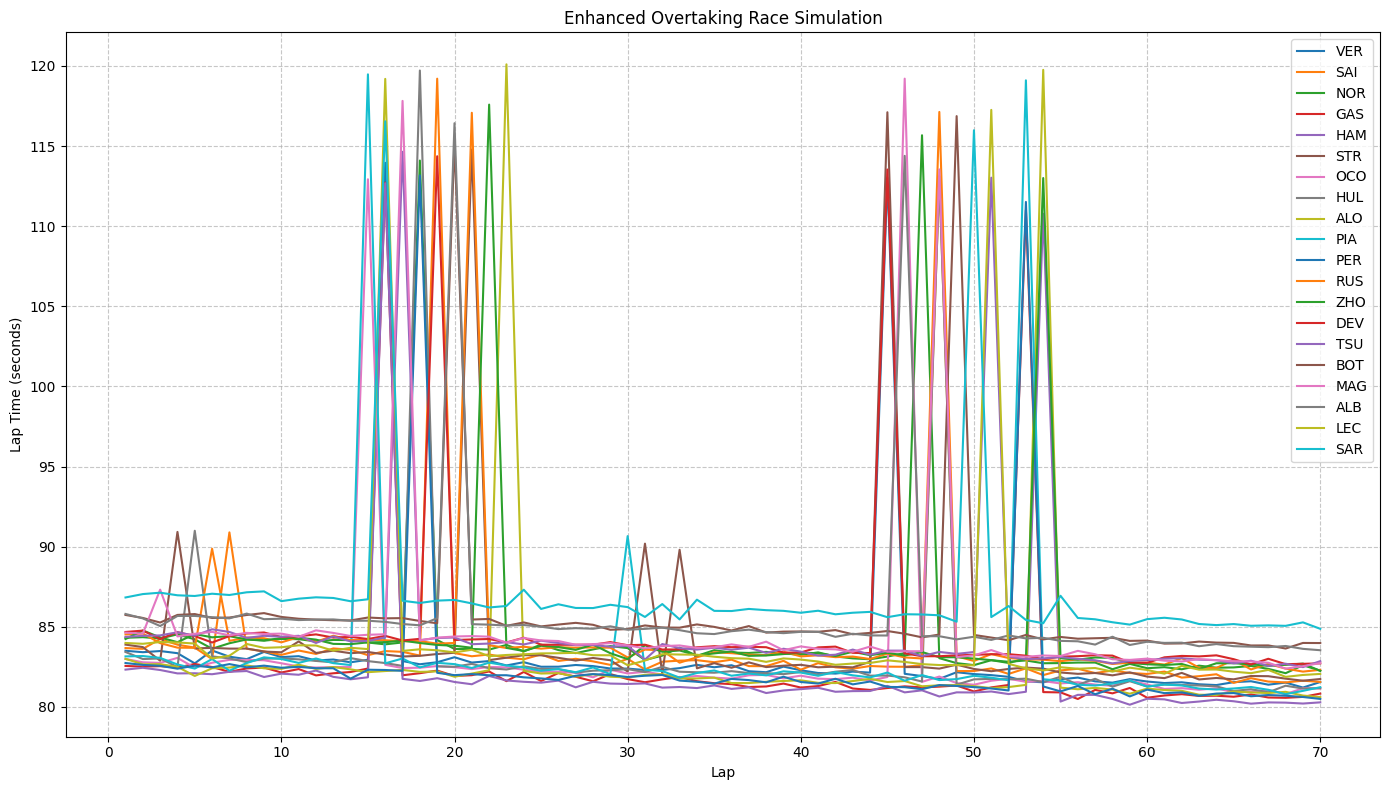

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)
np.random.seed(42)

year = 2023
gp = 'Spanish Grand Prix'

fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
quali = ff1.get_session(year, gp, 'Q')
quali.load()

fp2_laps = fp2.laps
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}
cleaned_runs = {}

for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}
driver_best_lap_times = {}

for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time

fastest_qualifying_time = min(driver_best_lap_times.values())
quali_deltas = {driver: (time - fastest_qualifying_time).total_seconds() for driver, time in driver_best_lap_times.items()}

fastest_fp2_time = min(avg_fp2_lap_times.values())
fp2_deltas = {driver: time - fastest_fp2_time for driver, time in avg_fp2_lap_times.items()}

forecasted_prime_times = {}

for driver in driver_info.keys():
    if driver in avg_fp2_lap_times and driver in quali_deltas and driver in fp2_deltas:
        forecasted_prime_times[driver] = avg_fp2_lap_times[driver] + 0.5 * (quali_deltas[driver] - fp2_deltas[driver])

num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.3
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05
track_evolution_factor = 0.07

for lap in range(1, num_laps + 1):
    sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1] if lap > 1 else forecasted_prime_times[driver])

    for idx, driver in enumerate(sorted_drivers):
        prime_time = forecasted_prime_times[driver]
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            lap_time += 30  # Simulate a longer pit stop for tires and strategy changes

        race_lap_times[driver].append(lap_time)

        if idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if time_diff >= overtaking_threshold:
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

race_lap_times_df = pd.DataFrame(race_lap_times)

plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

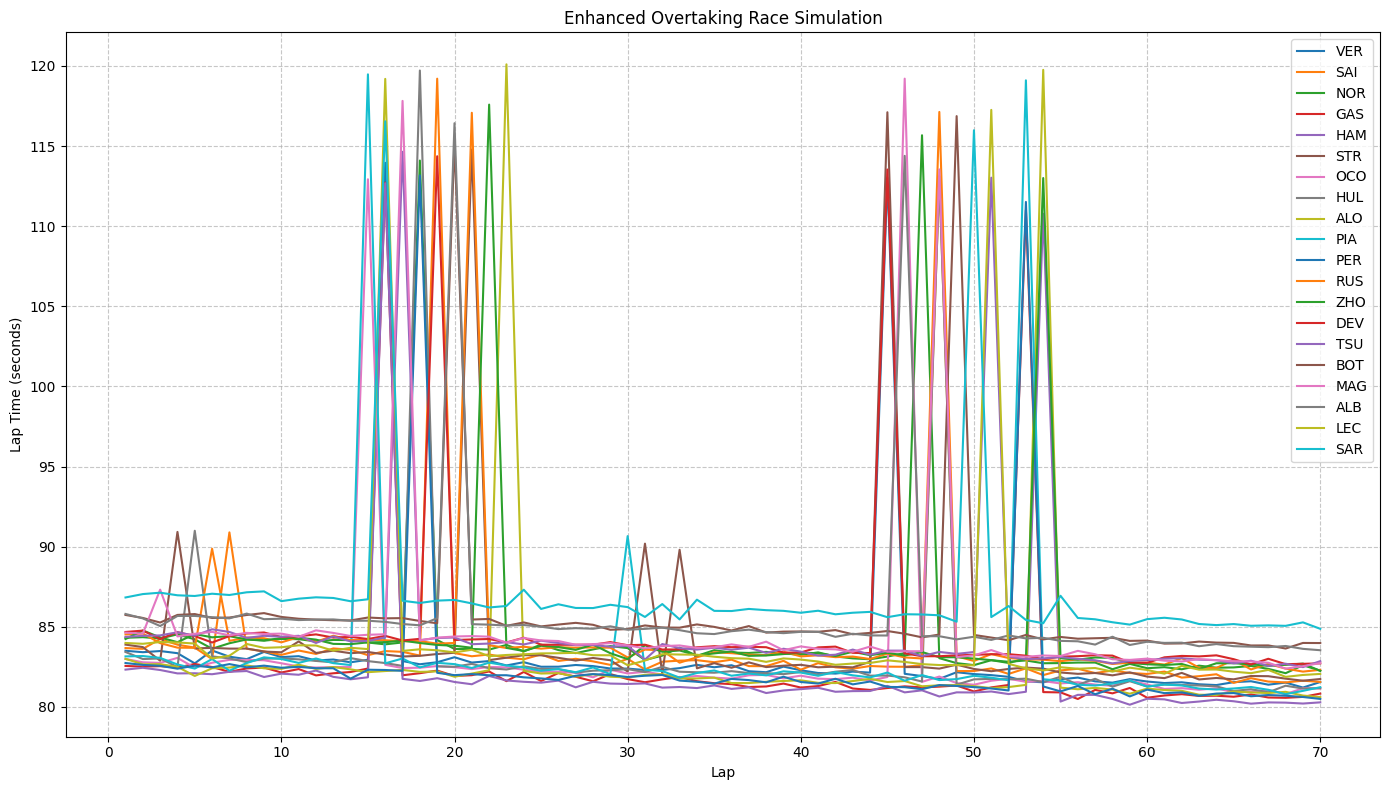

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 9, Overtakes: 19
Driver: SAI, Initial Position: 2, Final Position: 11, Overtakes: 24
Driver: NOR, Initial Position: 3, Final Position: 17, Overtakes: 27
Driver: GAS, Initial Position: 4, Final Position: 3, Overtakes: 9
Driver: HAM, Initial Position: 5, Final Position: 1, Overtakes: 2
Driver: STR, Initial Position: 6, Final Position: 10, Overtakes: 21
Driver: OCO, Initial Position: 7, Final Position: 5, Overtakes: 12
Driver: HUL, Initial Position: 10, Final Position: 6, Overtakes: 17
Driver: ALO, Initial Position: 9, Final Position: 4, Overtakes: 11
Driver: PIA, Initial Position: 8, Final Position: 7, Overtakes: 14
Driver: PER, Initial Position: 12, Final Position: 2, Overtakes: 6
Driver: RUS, Initial Position: 11, Final Position: 15, Overtakes: 29
Driver: ZHO, Initial Position: 13, Final Position: 14, Overtakes: 25
Driver: DEV, Initial Position: 14, Final Position: 16, Overtakes: 30
Driver: TSU, Initial

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)
np.random.seed(42)

year = 2023
gp = 'Spanish Grand Prix'

fp2 = ff1.get_session(year, gp, 'FP2')
fp2.load()
quali = ff1.get_session(year, gp, 'Q')
quali.load()

fp2_laps = fp2.laps
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}

def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}
cleaned_runs = {}

for driver, laps in longest_runs.items():
    cleaned_run = []
    for i, lap in enumerate(laps):
        if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120:
            cleaned_run.append(lap)
    cleaned_runs[driver] = cleaned_run

avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120]) for driver, laps in cleaned_runs.items() if laps}
driver_best_lap_times = {}

for row in quali.results.itertuples():
    best_time = min(row.Q1, row.Q2, row.Q3, key=lambda x: x if pd.notna(x) else pd.Timedelta('0 days 23:59:59.999999'))
    if pd.notna(best_time):
        driver_best_lap_times[row.DriverNumber] = best_time.total_seconds()

sorted_drivers_initial = sorted(driver_best_lap_times.items(), key=lambda item: item[1])
initial_positions = {driver: idx + 1 for idx, (driver, _) in enumerate(sorted_drivers_initial)}

num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

race_lap_times = {driver: [] for driver in driver_info.keys()}
lap_variability = 0.3
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05
track_evolution_factor = 0.07
total_overtakes = 0  # Initialize total overtakes count

for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver, _ in sorted_drivers_initial]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    for idx, driver in enumerate(sorted_drivers):
        prime_time = avg_fp2_lap_times.get(driver, 100)  # default prime time if not found
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            lap_time += 30  # Simulate a longer pit stop for tires and strategy changes

        race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold:
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Overtakes: {overtakes.get(driver, 0)}")
print(f"Total Overtakes in Race: {total_overtakes}")


core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Practice 2 [v3.3.9]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

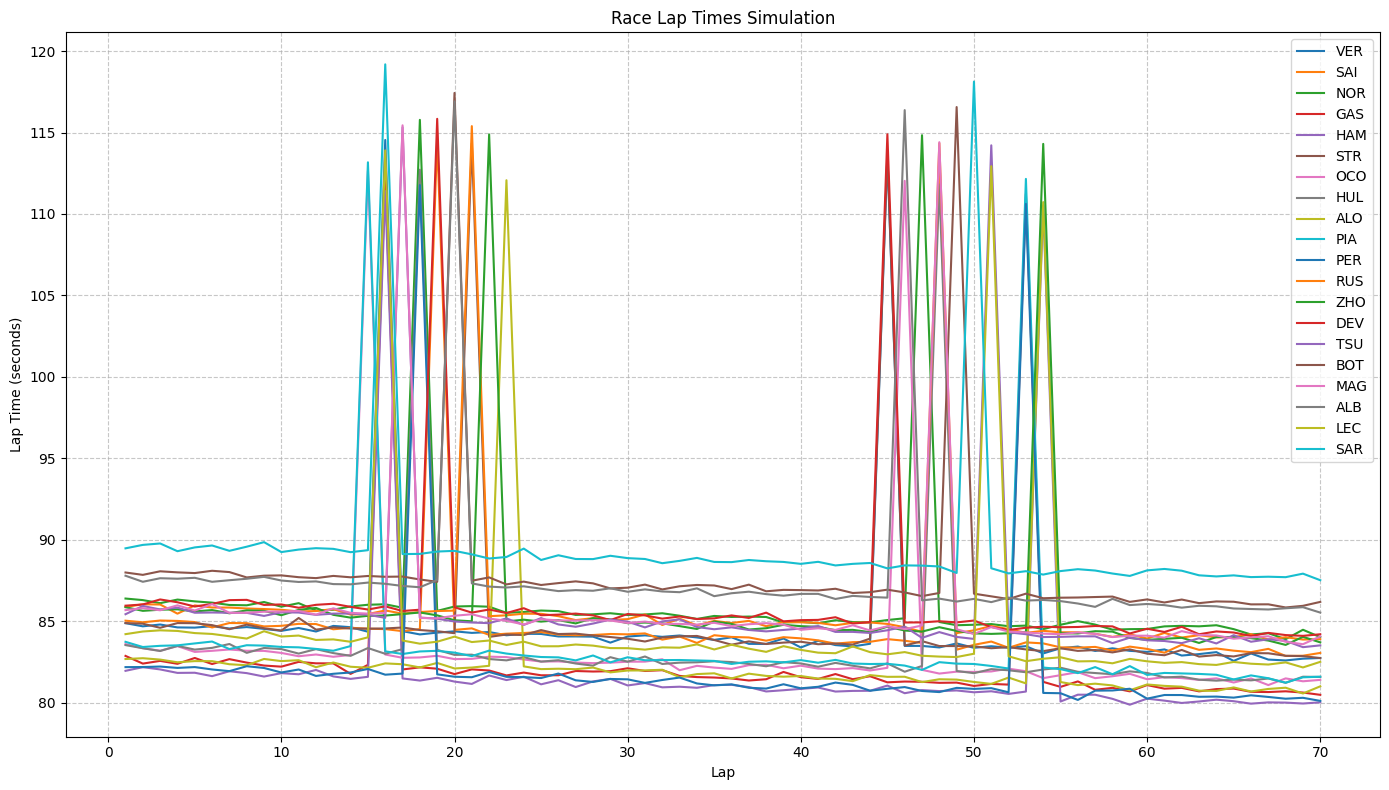

Driver Positions:
Driver: VER, Initial Position: 1, Final Position: 10
Driver: SAI, Initial Position: 2, Final Position: 11
Driver: NOR, Initial Position: 3, Final Position: 15
Driver: GAS, Initial Position: 4, Final Position: 3
Driver: HAM, Initial Position: 5, Final Position: 1
Driver: STR, Initial Position: 6, Final Position: 9
Driver: OCO, Initial Position: 7, Final Position: 5
Driver: HUL, Initial Position: 10, Final Position: 6
Driver: ALO, Initial Position: 9, Final Position: 4
Driver: PIA, Initial Position: 8, Final Position: 7
Driver: PER, Initial Position: 12, Final Position: 2
Driver: RUS, Initial Position: 11, Final Position: 14
Driver: ZHO, Initial Position: 13, Final Position: 13
Driver: DEV, Initial Position: 14, Final Position: 17
Driver: TSU, Initial Position: 15, Final Position: 12
Driver: BOT, Initial Position: 16, Final Position: 19
Driver: MAG, Initial Position: 17, Final Position: 16
Driver: ALB, Initial Position: 18, Final Position: 18
Driver: LEC, Initial Positi

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load the required data
year = 2023
gp = 'Spanish Grand Prix'
fp2 = ff1.get_session(year, gp, 'FP2')
quali = ff1.get_session(year, gp, 'Q')
fp2.load()
quali.load()

# Retrieve driver information and session laps
driver_info = {row.DriverNumber: row.Abbreviation for row in quali.results.itertuples()}
fp2_laps = fp2.laps

# Function to get the longest stint on medium tires
def get_longest_stint(laps):
    stints = []
    current_stint = []
    for lap in laps.itertuples():
        if lap.Compound == 'MEDIUM':
            if current_stint:
                stints.append(current_stint)
            current_stint = [lap]
        else:
            current_stint.append(lap)
    if current_stint:
        stints.append(current_stint)
    return max(stints, key=len, default=[])

# Calculate the longest runs and average times
longest_runs = {driver: get_longest_stint(fp2_laps.pick_driver(driver)) for driver in driver_info.keys()}
cleaned_runs = {driver: [lap for lap in runs if pd.notna(lap.LapTime) and lap.LapTime.total_seconds() <= 120] for driver, runs in longest_runs.items()}
avg_fp2_lap_times = {driver: np.mean([lap.LapTime.total_seconds() for lap in laps]) for driver, laps in cleaned_runs.items() if laps}

# Extract the best qualifying lap time
def get_best_quali_time(row):
    times = [row['Q1'], row['Q2'], row['Q3']]
    valid_times = [time for time in times if pd.notna(time)]
    return min(valid_times).total_seconds() if valid_times else float('inf')

quali_results = quali.results.copy()
quali_results['BestLapTime'] = quali_results.apply(get_best_quali_time, axis=1)
driver_best_lap_times = {row['DriverNumber']: row['BestLapTime'] for index, row in quali_results.iterrows()}

# Calculate initial positions based on the best lap times
sorted_drivers_initial = sorted(driver_best_lap_times.items(), key=lambda x: x[1])
initial_positions = {driver: idx + 1 for idx, (driver, _) in enumerate(sorted_drivers_initial)}

# Other simulation settings
num_laps = 70
tyre_deg_rates = {'HARD': 0.02, 'MEDIUM': 0.04, 'SOFT': 0.06}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_windows = [range(15, 25), range(45, 55)]
driver_pit_laps = {driver: [random.choice(window) for window in pit_windows] for driver in driver_info.keys()}

# Simulate the race
race_lap_times = {driver: [] for driver in driver_info.keys()}
track_evolution_factor = 0.07

for lap in range(1, num_laps + 1):
    for driver in sorted_drivers_initial:
        prime_time = avg_fp2_lap_times.get(driver[0], 120)  # Use a high default if no data available
        random_variation = np.random.normal(0, driver_stddev[driver[0]])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg - track_evolution_factor * lap

        # Apply pit stop penalty if it's the pit lap
        if lap in driver_pit_laps[driver[0]]:
            lap_time += 30  # Generic pit stop time

        race_lap_times[driver[0]].append(lap_time)

    # Update positions based on the new lap times
    current_positions = sorted(race_lap_times.items(), key=lambda x: x[1][-1])
    sorted_drivers_initial = [(pos[0], driver_best_lap_times[pos[0]]) for pos in current_positions]

# Calculate final positions
final_positions = {driver: idx + 1 for idx, (driver, time) in enumerate(sorted_drivers_initial)}

# Display the race results
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(range(1, num_laps + 1), race_lap_times[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Race Lap Times Simulation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Driver Positions:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}")


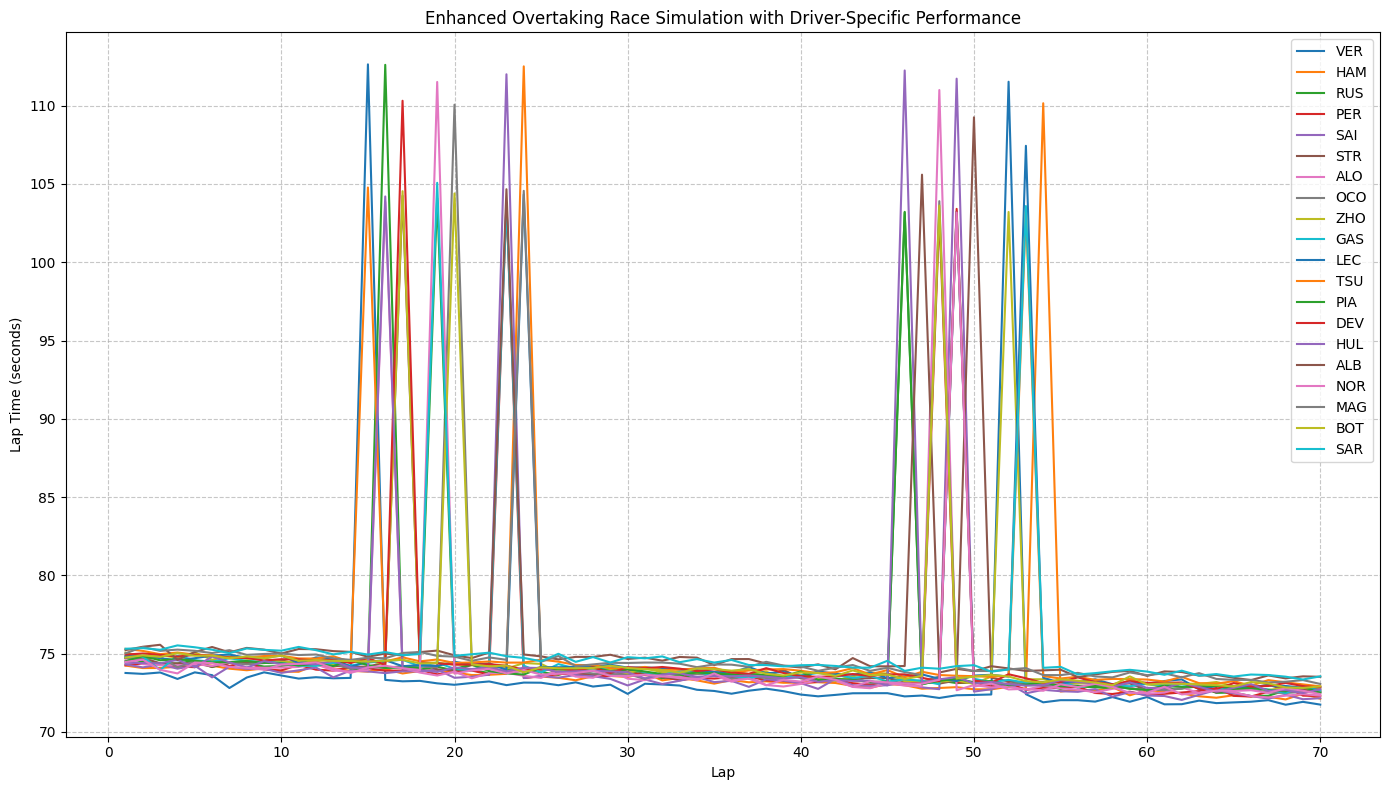

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 1, Overtakes: 2
Driver: HAM, Initial Position: 5, Final Position: 5, Overtakes: 4
Driver: RUS, Initial Position: 11, Final Position: 8, Overtakes: 12
Driver: PER, Initial Position: 12, Final Position: 2, Overtakes: 9
Driver: SAI, Initial Position: 2, Final Position: 3, Overtakes: 5
Driver: STR, Initial Position: 6, Final Position: 11, Overtakes: 11
Driver: ALO, Initial Position: 9, Final Position: 4, Overtakes: 8
Driver: OCO, Initial Position: 7, Final Position: 9, Overtakes: 11
Driver: ZHO, Initial Position: 13, Final Position: 13, Overtakes: 13
Driver: GAS, Initial Position: 4, Final Position: 10, Overtakes: 13
Driver: LEC, Initial Position: 19, Final Position: 15, Overtakes: 12
Driver: TSU, Initial Position: 15, Final Position: 17, Overtakes: 14
Driver: PIA, Initial Position: 8, Final Position: 7, Overtakes: 13
Driver: DEV, Initial Position: 14, Final Position: 16, Overtakes: 13
Driver: HUL, Initial 

In [ ]:
# Updated simulation model with driver-specific prime times

driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 75.49
}

# Initialize dictionaries to store results
race_lap_times = {driver: [] for driver in driver_info.keys()}
overtakes = {driver: 0 for driver in driver_info.keys()}
total_overtakes = 0

# Simulation loop
for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver, _ in sorted_drivers_initial]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    for idx, driver in enumerate(sorted_drivers):
        prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            lap_time += 30  # Simulate a longer pit stop for tires and strategy changes

        race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold:
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

# Convert race lap times to DataFrame for plotting
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the lap times
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation with Driver-Specific Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print driver stats and total overtakes
print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Overtakes: {overtakes.get(driver, 0)}")
print(f"Total Overtakes in Race: {total_overtakes}")


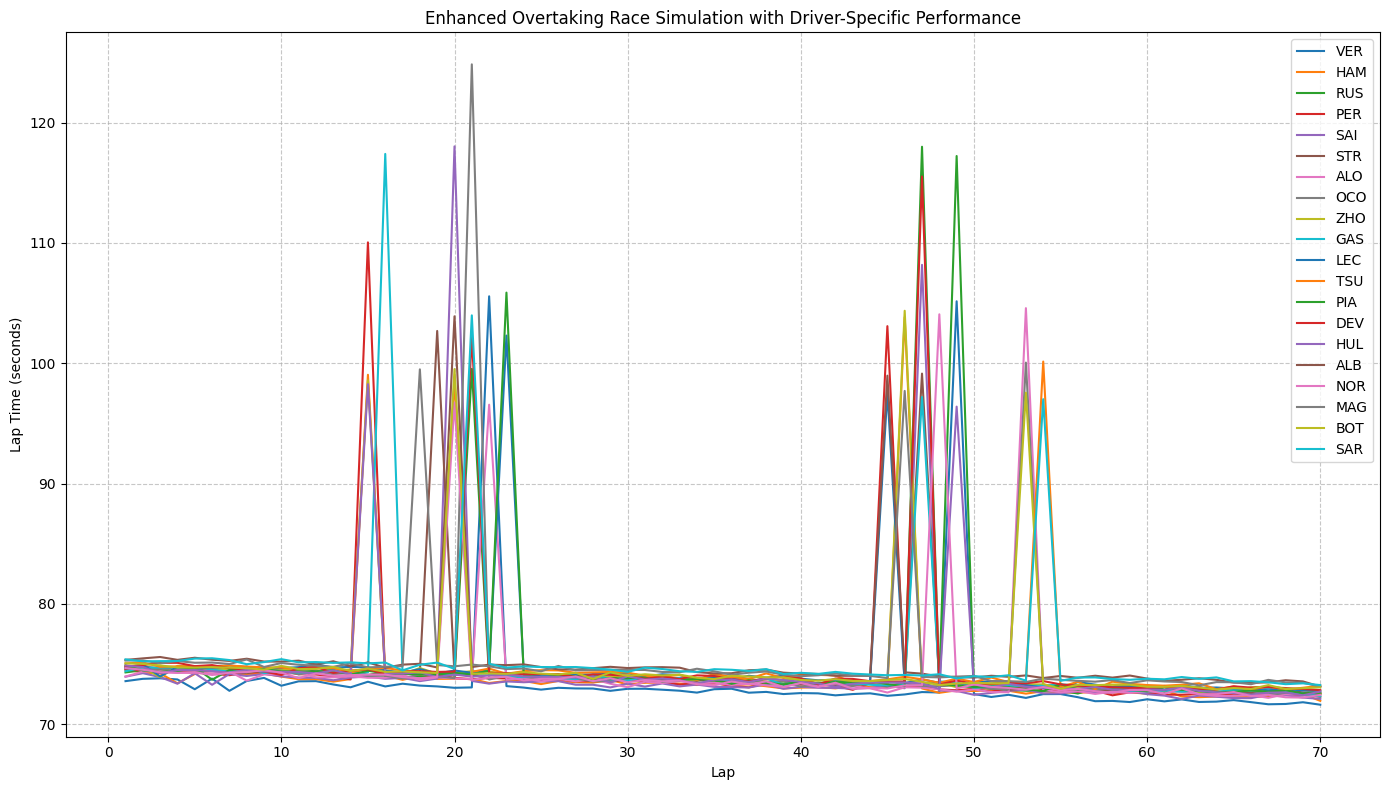

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 1, Overtakes: 1
Driver: HAM, Initial Position: 5, Final Position: 2, Overtakes: 5
Driver: RUS, Initial Position: 11, Final Position: 9, Overtakes: 9
Driver: PER, Initial Position: 12, Final Position: 7, Overtakes: 8
Driver: SAI, Initial Position: 2, Final Position: 6, Overtakes: 7
Driver: STR, Initial Position: 6, Final Position: 8, Overtakes: 10
Driver: ALO, Initial Position: 9, Final Position: 3, Overtakes: 7
Driver: OCO, Initial Position: 7, Final Position: 14, Overtakes: 9
Driver: ZHO, Initial Position: 13, Final Position: 10, Overtakes: 12
Driver: GAS, Initial Position: 4, Final Position: 13, Overtakes: 9
Driver: LEC, Initial Position: 19, Final Position: 12, Overtakes: 13
Driver: TSU, Initial Position: 15, Final Position: 15, Overtakes: 13
Driver: PIA, Initial Position: 8, Final Position: 16, Overtakes: 11
Driver: DEV, Initial Position: 14, Final Position: 17, Overtakes: 12
Driver: HUL, Initial Po

In [ ]:
import numpy as np

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionaries to store results
race_lap_times = {driver: [] for driver in driver_info.keys()}
overtakes = {driver: 0 for driver in driver_info.keys()}
total_overtakes = 0

# Simulation loop
for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver, _ in sorted_drivers_initial]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    for idx, driver in enumerate(sorted_drivers):
        prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
        random_variation = np.random.normal(0, driver_stddev[driver])
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            time_diff = race_lap_times[ahead_driver][-1] - lap_time
            if 0 < time_diff <= 1:
                lap_time -= drs_bonus
                tyre_deg *= dirty_air_factor

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
            lap_time += pit_stop_time  # Simulate pit stop

        race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold:
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

# Convert race lap times to DataFrame for plotting
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the lap times
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation with Driver-Specific Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print driver stats and total overtakes
print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}, Overtakes: {overtakes.get(driver, 0)}")
print(f"Total Overtakes in Race: {total_overtakes}")


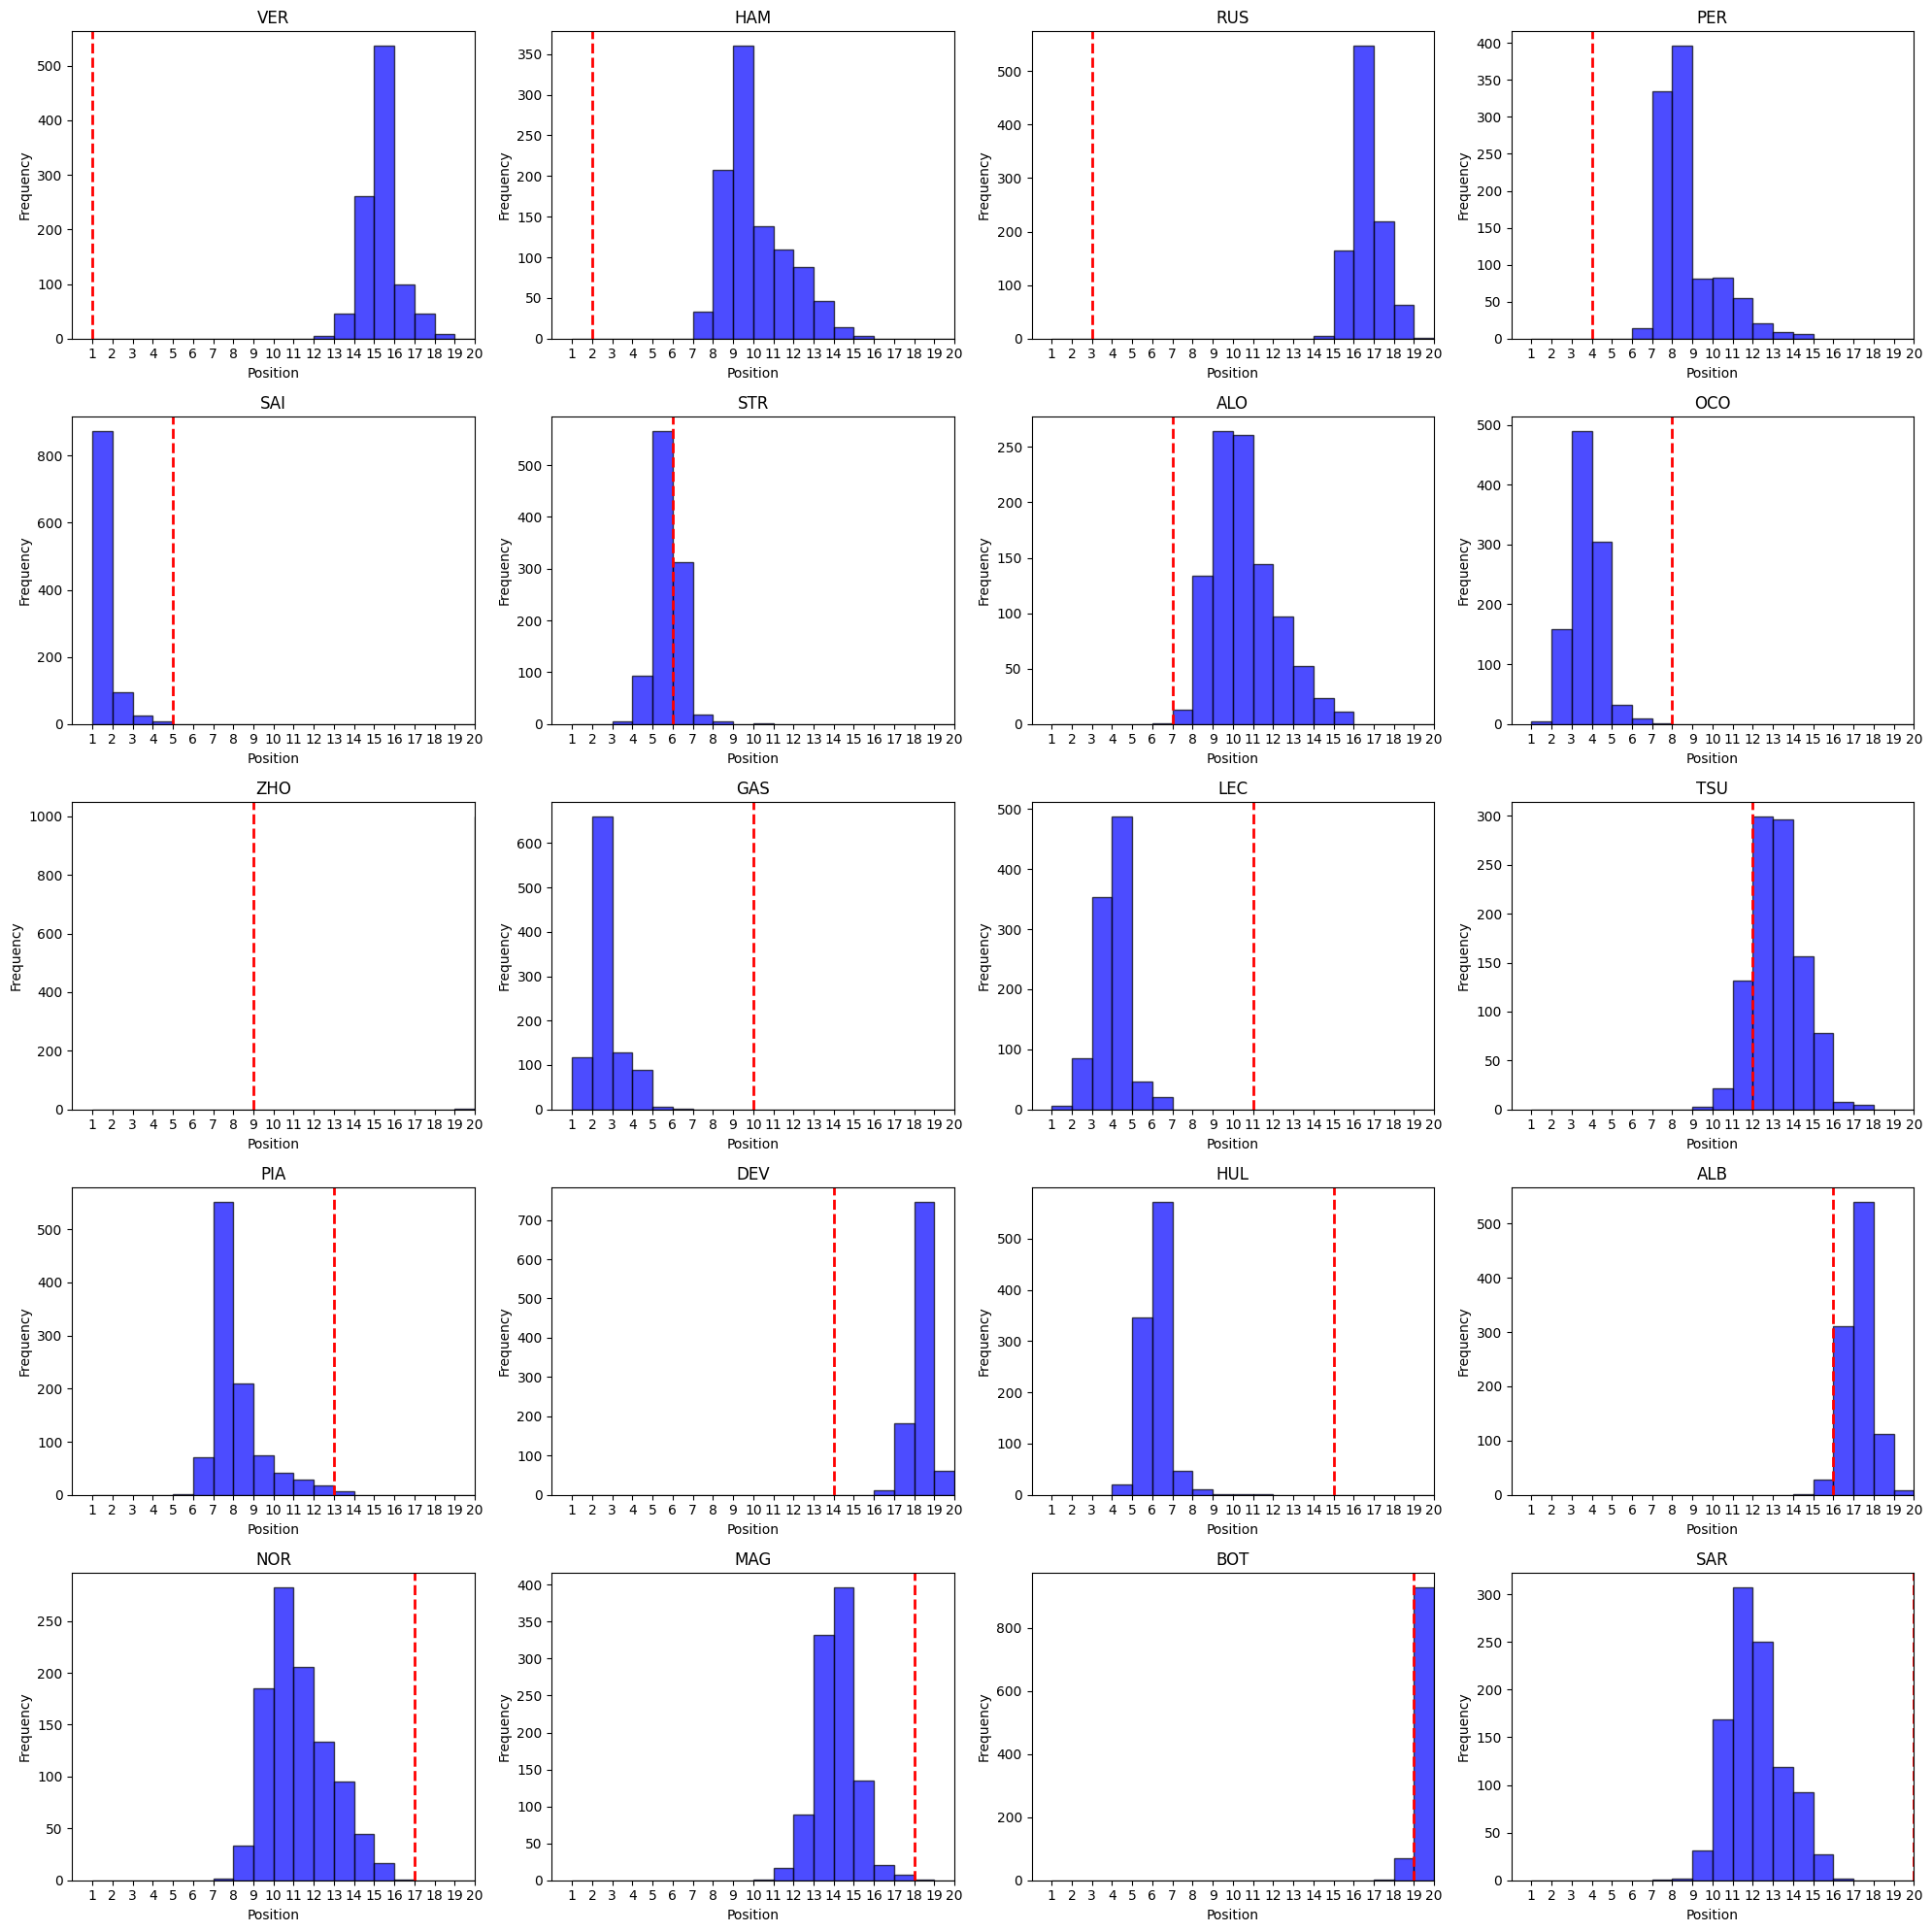

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# Driver prime times
driver_prime_times = {
    'VER': 83.00,
    'SAI': 80.44,
    'NOR': 82.42,
    'GAS': 80.73,
    'HAM': 82.28,
    'STR': 81.51,
    'OCO': 80.93,
    'HUL': 81.68,
    'ALO': 82.32,
    'PIA': 81.91,
    'PER': 82.15,
    'RUS': 83.24,
    'ZHO': 84.87,
    'DEV': 83.63,
    'TSU': 82.57,
    'BOT': 83.98,
    'MAG': 82.78,
    'ALB': 83.36,
    'LEC': 81.11,
    'SAR': 82.45
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                time_diff = race_lap_times[ahead_driver][-1] - lap_time
                if 0 < time_diff <= 1:
                    lap_time -= drs_bonus
                    tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()

# This will plot the histograms for each driver with the real race position highlighted in red.


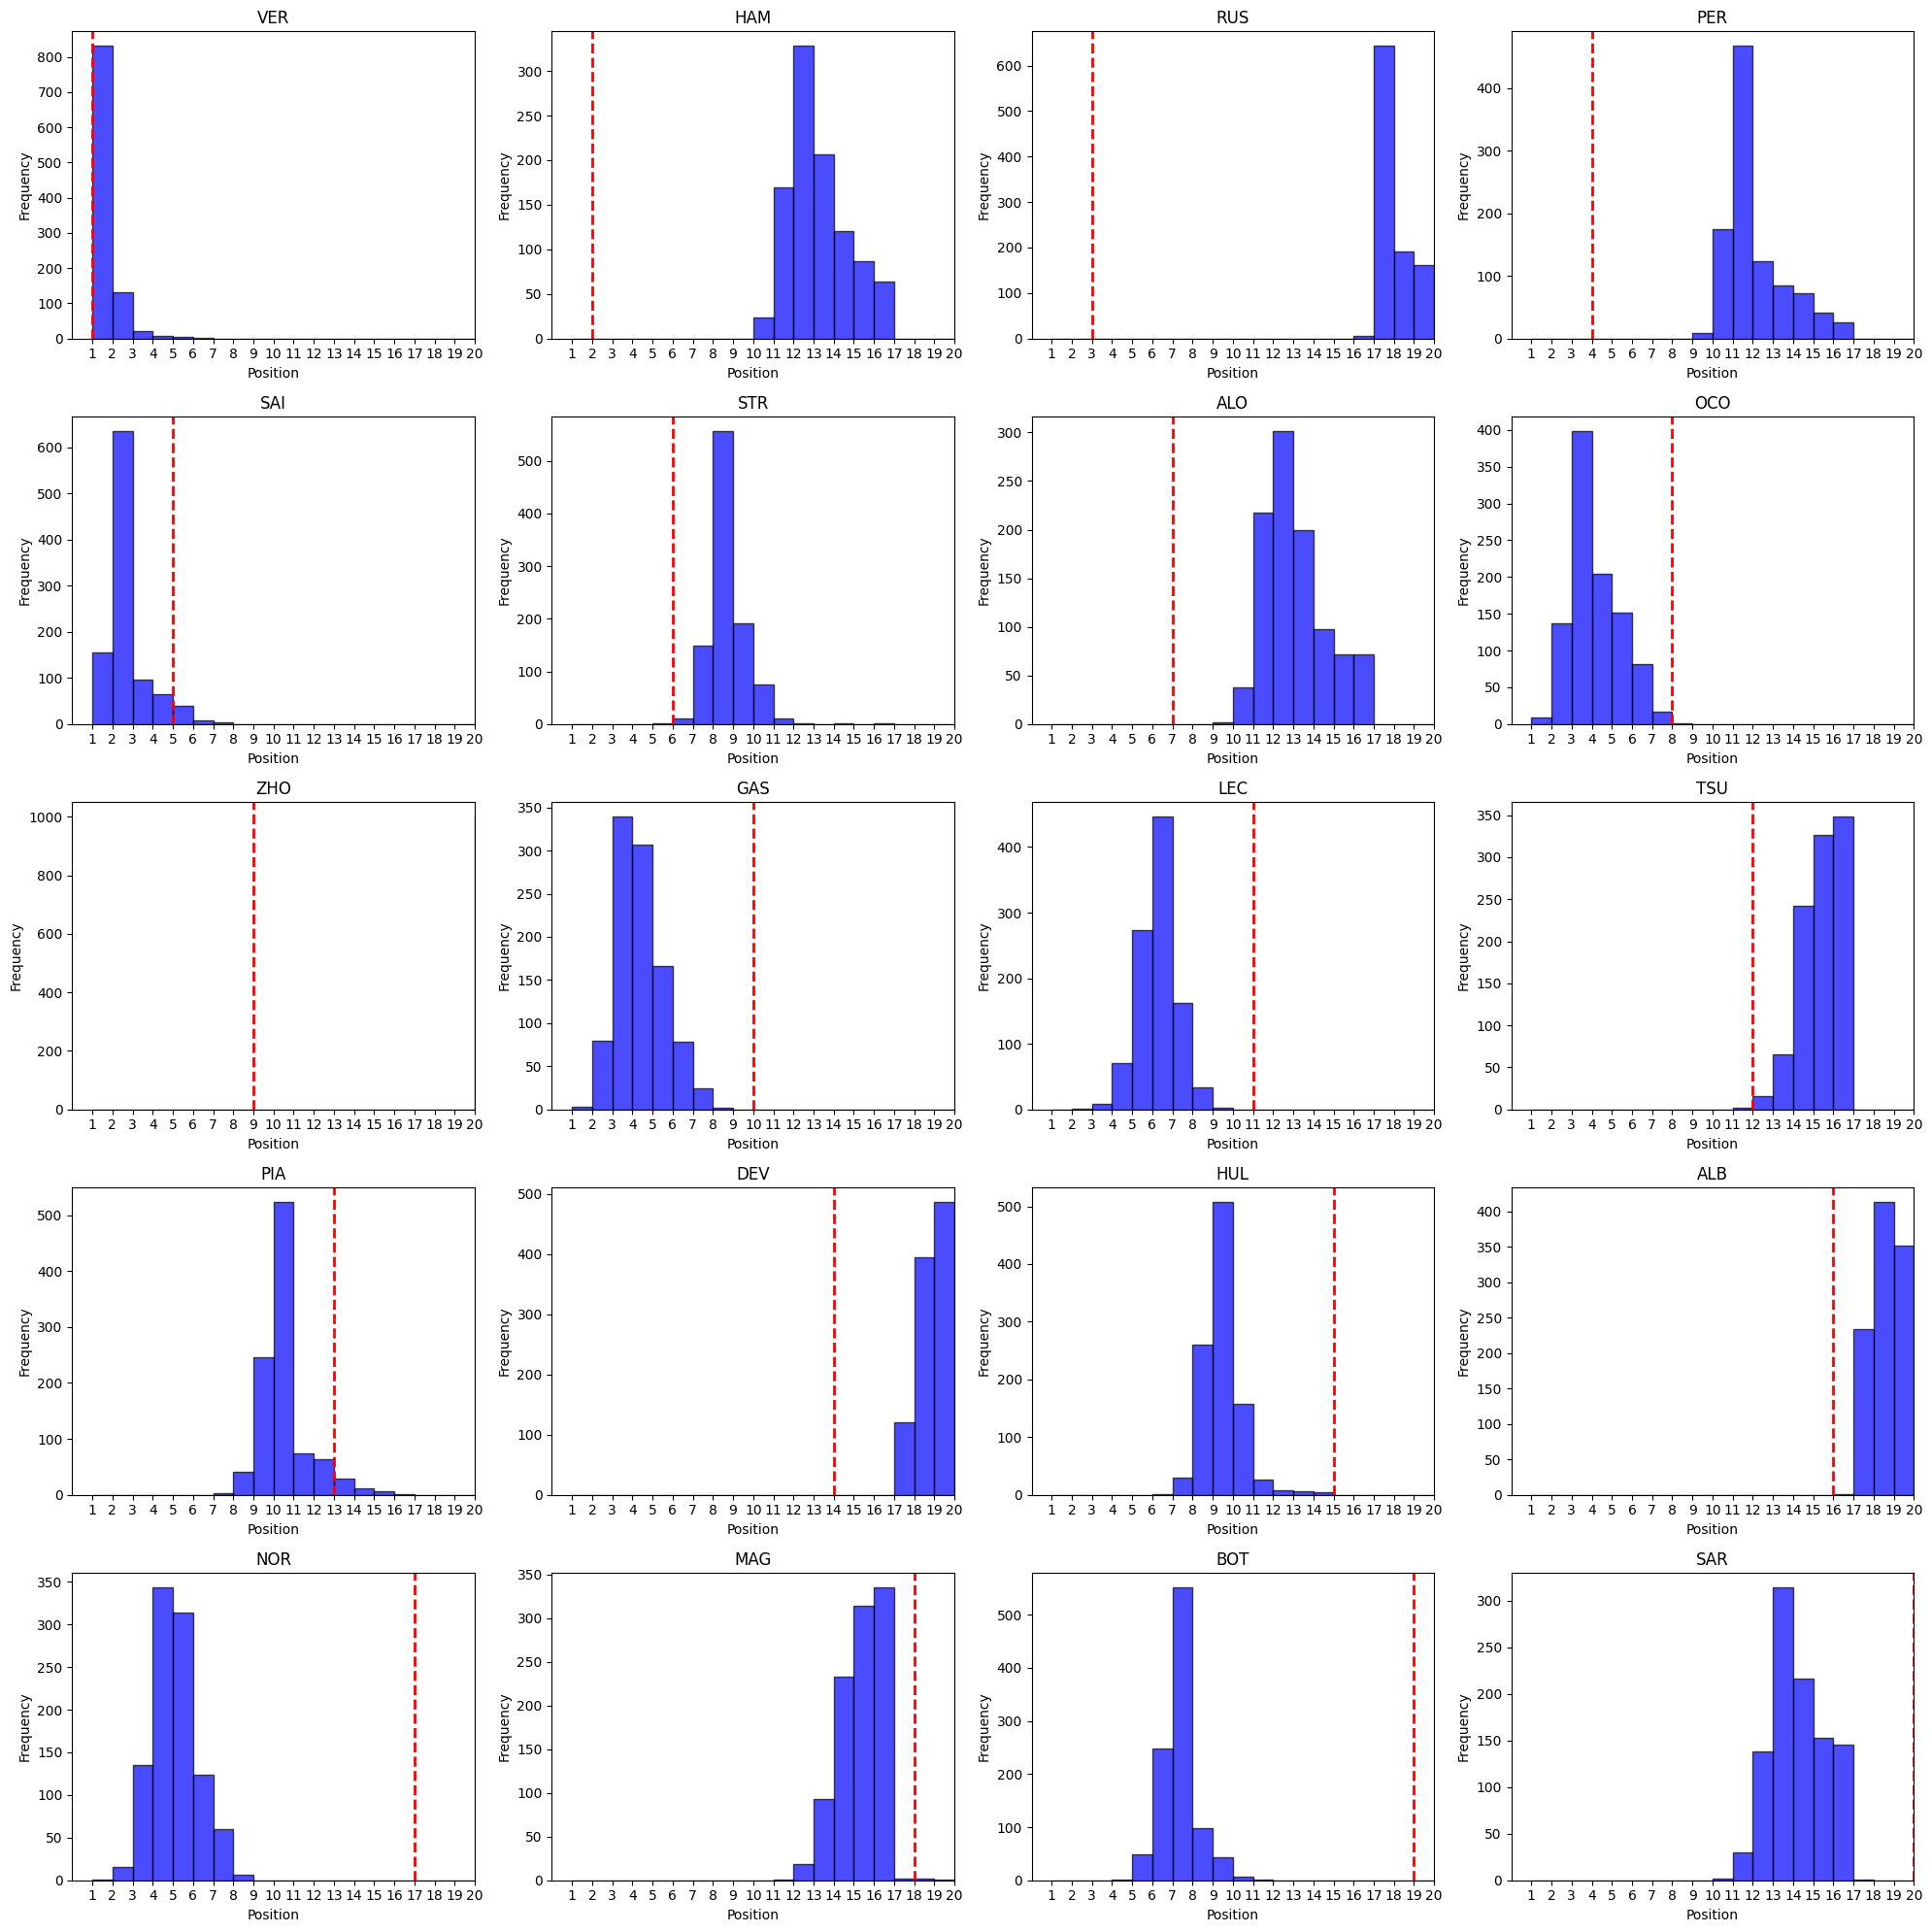

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# Updated driver prime times
driver_prime_times = {
    'VER': 80.18,
    'SAI': 80.43,
    'NOR': 80.80,
    'GAS': 80.72,
    'HAM': 82.27,
    'STR': 81.50,
    'OCO': 80.92,
    'HUL': 81.67,
    'ALO': 82.31,
    'PIA': 81.86,
    'PER': 82.14,
    'RUS': 83.26,
    'DEV': 83.33,
    'TSU': 82.56,
    'BOT': 81.19,
    'MAG': 82.56,
    'ALB': 83.34,
    'LEC': 81.10,
    'SAR': 82.43
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus
                        tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()

# This will plot the histograms for each driver with the real race position highlighted in red.


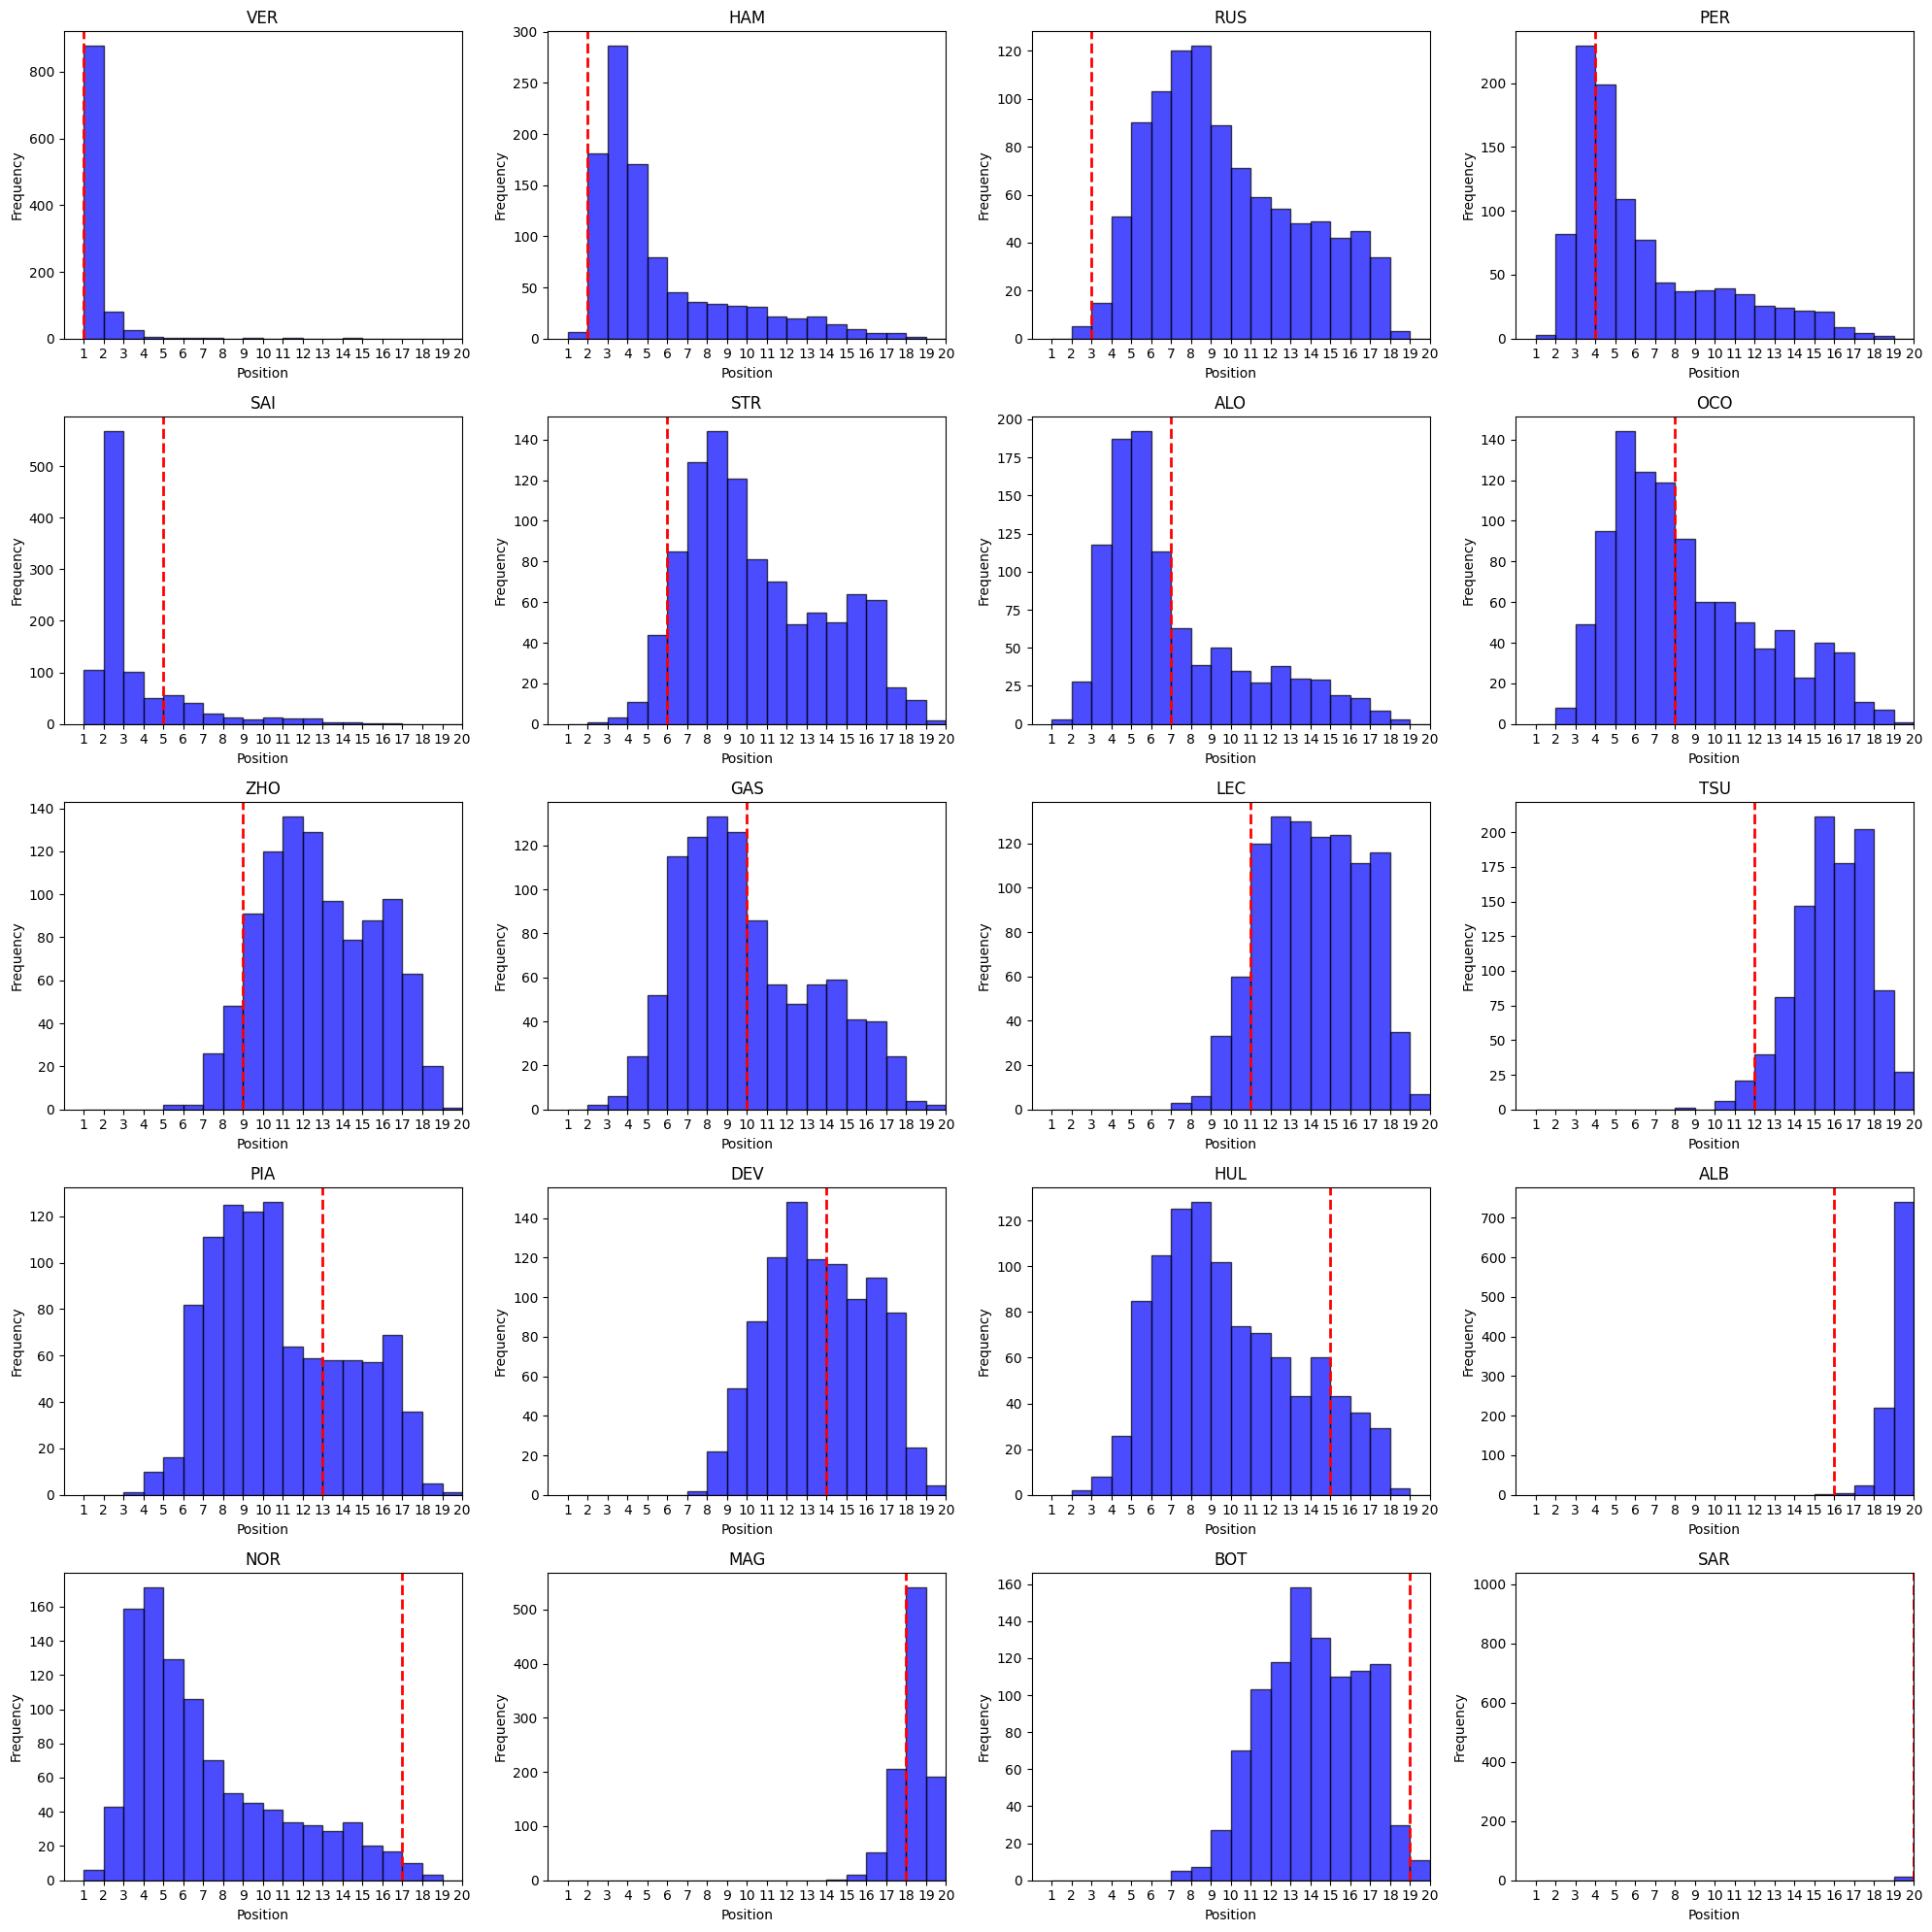

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# Updated driver prime times
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus
                        tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()

# This will plot the histograms for each driver with the real race position highlighted in red.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# Updated driver prime times
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 75.58
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus
                        tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Verify if SAR's data is being collected correctly
print("Finishing positions for SAR:", finishing_positions['2'])

# Plot the histo
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()


NameError: name 'track_evolution_factor' is not defined

**This is the good one**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# Updated driver prime times
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 75.49
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Define missing factors
track_evolution_factor = 0.01  # Example value; this can be adjusted
drs_bonus = 0.3  # Time bonus when DRS is active; example value
dirty_air_factor = 1.05  # Penalty factor when following another car; example value
overtaking_threshold = 0.5  # Time difference to initiate an overtake; example value

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus
                        tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    # Ensure only top 20 positions are recorded
    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])[:20]
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions.get(driver, 21)  # Default to 21 if driver not found
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()


NameError: name 'ahead_driver' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the strategies
strategies = {
    'Strategy 1': ['SOFT', 'SOFT', 'HARD'],
    'Strategy 2': ['HARD', 'MEDIUM', 'SOFT'],
    'Strategy 3': ['MEDIUM', 'SOFT', 'HARD'],
    'Strategy 4': ['HARD', 'SOFT', 'SOFT'],
    'Strategy 5': ['MEDIUM', 'HARD', 'SOFT']
}

# Initialize a dictionary to store finishing positions per strategy
finishing_positions_per_strategy = {strategy: {driver: [] for driver in driver_info.keys()} for strategy in strategies.keys()}

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)

# Run the simulation for each strategy
num_simulations = 1000

for strategy_name, strategy_tyres in strategies.items():
    for _ in range(num_simulations):
        # Reset race lap times and other variables for each simulation
        race_lap_times = {driver: [] for driver in driver_info.keys()}
        driver_pit_laps = {
            driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
        }

        for lap in range(1, num_laps + 1):
            if lap == 1:
                sorted_drivers = [driver for driver in driver_info.keys()]
            else:
                sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

            for idx, driver in enumerate(sorted_drivers):
                # Determine which tyre compound is being used
                if lap <= driver_pit_laps[driver][0]:
                    current_tyre = strategy_tyres[0]
                elif lap <= driver_pit_laps[driver][1]:
                    current_tyre = strategy_tyres[1]
                else:
                    current_tyre = strategy_tyres[2]

                prime_time = driver_prime_times.get(driver_info[driver], 100)
                random_variation = np.random.normal(0, driver_stddev[driver])
                tyre_deg = tyre_deg_rates[current_tyre] * lap
                lap_time = prime_time + random_variation + tyre_deg

                if lap > 2 and idx > 0:
                    ahead_driver = sorted_drivers[idx - 1]
                    if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                        time_diff = race_lap_times[ahead_driver][-1] - lap_time
                        if 0 < time_diff <= 1:
                            lap_time -= drs_bonus
                            tyre_deg *= dirty_air_factor

                lap_time -= track_evolution_factor * lap

                if lap in driver_pit_laps[driver]:
                    pit_stop_time = generate_pit_stop_time()
                    lap_time += pit_stop_time  # Simulate pit stop

                race_lap_times[driver].append(lap_time)

        # Ensure only top 20 positions are recorded
        total_race_times = {driver: sum(race_lap_times[driver]) for driver in race_lap_times}
        sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])[:20]
        final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

        for driver, position in final_positions.items():
            finishing_positions_per_strategy[strategy_name][driver].append(position)

# Calculate mean and standard deviation for each driver under each strategy
mean_positions_per_strategy = {
    strategy: {driver: np.mean(positions) for driver, positions in finishing_positions.items()}
    for strategy, finishing_positions in finishing_positions_per_strategy.items()
}

std_positions_per_strategy = {
    strategy: {driver: np.std(positions) for driver, positions in finishing_positions.items()}
    for strategy, finishing_positions in finishing_positions_per_strategy.items()
}

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 10))
axes = axes.flatten()

for i, (strategy_name, mean_positions) in enumerate(mean_positions_per_strategy.items()):
    std_positions = std_positions_per_strategy[strategy_name]
    sorted_drivers = sorted(mean_positions.keys(), key=lambda driver: mean_positions[driver])

    drivers = [driver_info[driver] for driver in sorted_drivers]
    means = [mean_positions[driver] for driver in sorted_drivers]
    stds = [std_positions[driver] for driver in sorted_drivers]

    ax = axes[i]
    ax.barh(drivers, means, xerr=stds, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Mean Finishing Position')
    ax.set_title(f'{strategy_name}')
    ax.invert_yaxis()  # Invert y-axis to have the best positions at the top
    ax.grid(axis='x')

plt.tight_layout()
plt.show()


NameError: name 'track_evolution_factor' is not defined

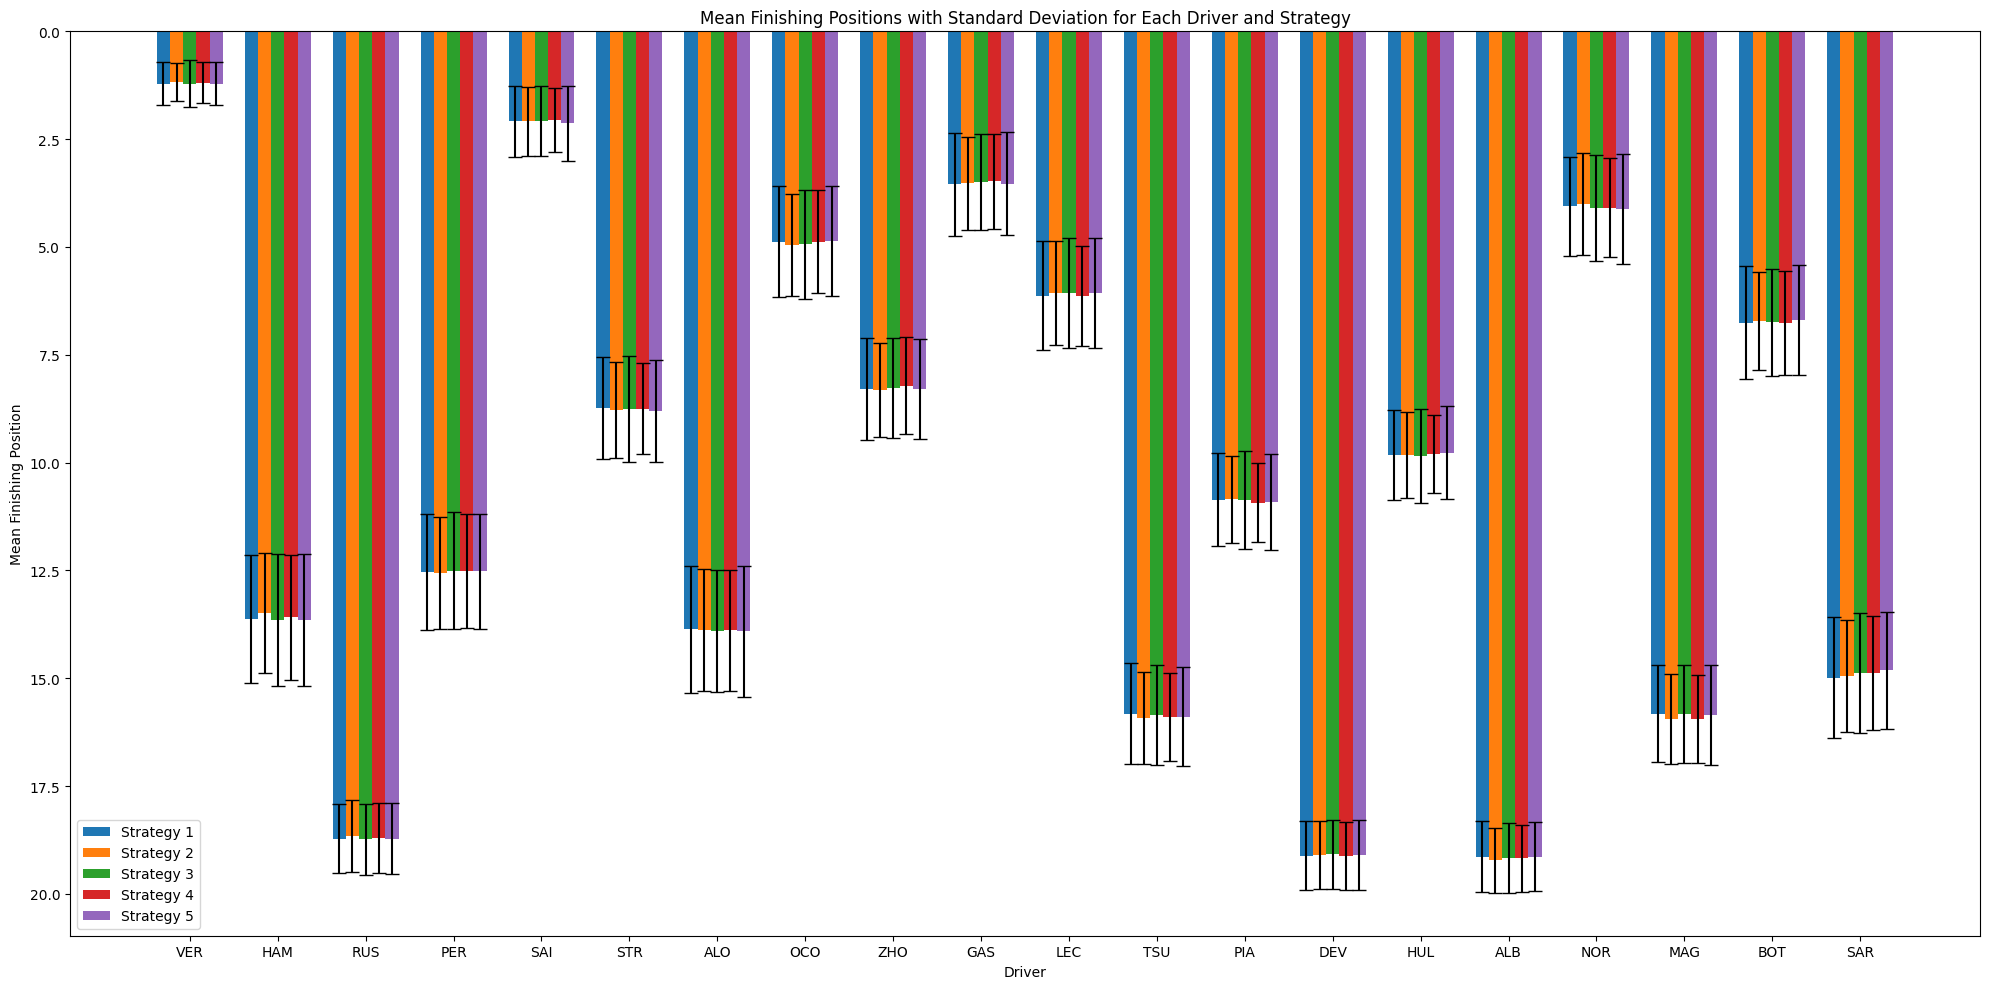

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for each driver under each strategy
mean_positions_per_strategy = {
    strategy: {driver: np.mean(positions) for driver, positions in finishing_positions.items()}
    for strategy, finishing_positions in finishing_positions_per_strategy.items()
}

std_positions_per_strategy = {
    strategy: {driver: np.std(positions) for driver, positions in finishing_positions.items()}
    for strategy, finishing_positions in finishing_positions_per_strategy.items()
}

# Create a grouped bar chart
drivers = list(driver_info.values())
strategies = list(mean_positions_per_strategy.keys())
n_strategies = len(strategies)
n_drivers = len(drivers)
bar_width = 0.15  # Width of each bar

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Generate bars for each strategy
for i, strategy in enumerate(strategies):
    means = [mean_positions_per_strategy[strategy][driver] for driver in driver_info.keys()]
    stds = [std_positions_per_strategy[strategy][driver] for driver in driver_info.keys()]

    # Position of the bars on the x-axis
    r = np.arange(n_drivers) + i * bar_width
    ax.bar(r, means, yerr=stds, capsize=5, width=bar_width, label=strategy)

# Add labels and title
ax.set_xlabel('Driver')
ax.set_ylabel('Mean Finishing Position')
ax.set_title('Mean Finishing Positions with Standard Deviation for Each Driver and Strategy')
ax.set_xticks(np.arange(n_drivers) + bar_width * (n_strategies - 1) / 2)
ax.set_xticklabels(drivers)
ax.invert_yaxis()  # Invert y-axis to have the best positions at the top
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'finishing_positions_per_strategy' is a dictionary with strategies as keys
# and values are dictionaries of drivers and their finishing positions

# Initialize data structures for storing mean and standard deviation
mean_positions_per_strategy = {}
std_positions_per_strategy = {}

# Calculate mean and standard deviation for each driver under each strategy
for strategy, finishing_positions in finishing_positions_per_strategy.items():
    mean_positions = {driver: np.mean(positions) for driver, positions in finishing_positions.items()}
    std_positions = {driver: np.std(positions) for driver, positions in finishing_positions.items()}
    mean_positions_per_strategy[strategy] = mean_positions
    std_positions_per_strategy[strategy] = std_positions

# Create a grouped bar chart for each strategy
drivers = list(driver_info.values())
strategies = list(mean_positions_per_strategy.keys())
n_strategies = len(strategies)
n_drivers = len(drivers)
bar_width = 0.15  # Width of each bar

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Generate bars for each strategy
colors = plt.cm.viridis(np.linspace(0, 1, n_strategies))

for i, strategy in enumerate(strategies):
    means = [mean_positions_per_strategy[strategy][driver] for driver in driver_info.keys()]
    stds = [std_positions_per_strategy[strategy][driver] for driver in driver_info.keys()]

    # Position of the bars on the x-axis
    r = np.arange(n_drivers) + i * bar_width
    ax.bar(r, means, yerr=stds, capsize=5, width=bar_width, label=strategy, color=colors[i], edgecolor='black')

# Add labels and title
ax.set_xlabel('Driver')
ax.set_ylabel('Mean Finishing Position')
ax.set_title('Mean Finishing Positions with Standard Deviation for Each Driver and Strategy')
ax.set_xticks(np.arange(n_drivers) + bar_width * (n_strategies - 1) / 2)
ax.set_xticklabels(drivers)
ax.invert_yaxis()  # Invert y-axis to have the best positions at the top
ax.legend()

plt.tight_layout()
plt.show()


NameError: name 'finishing_positions_per_strategy' is not defined

# One driver


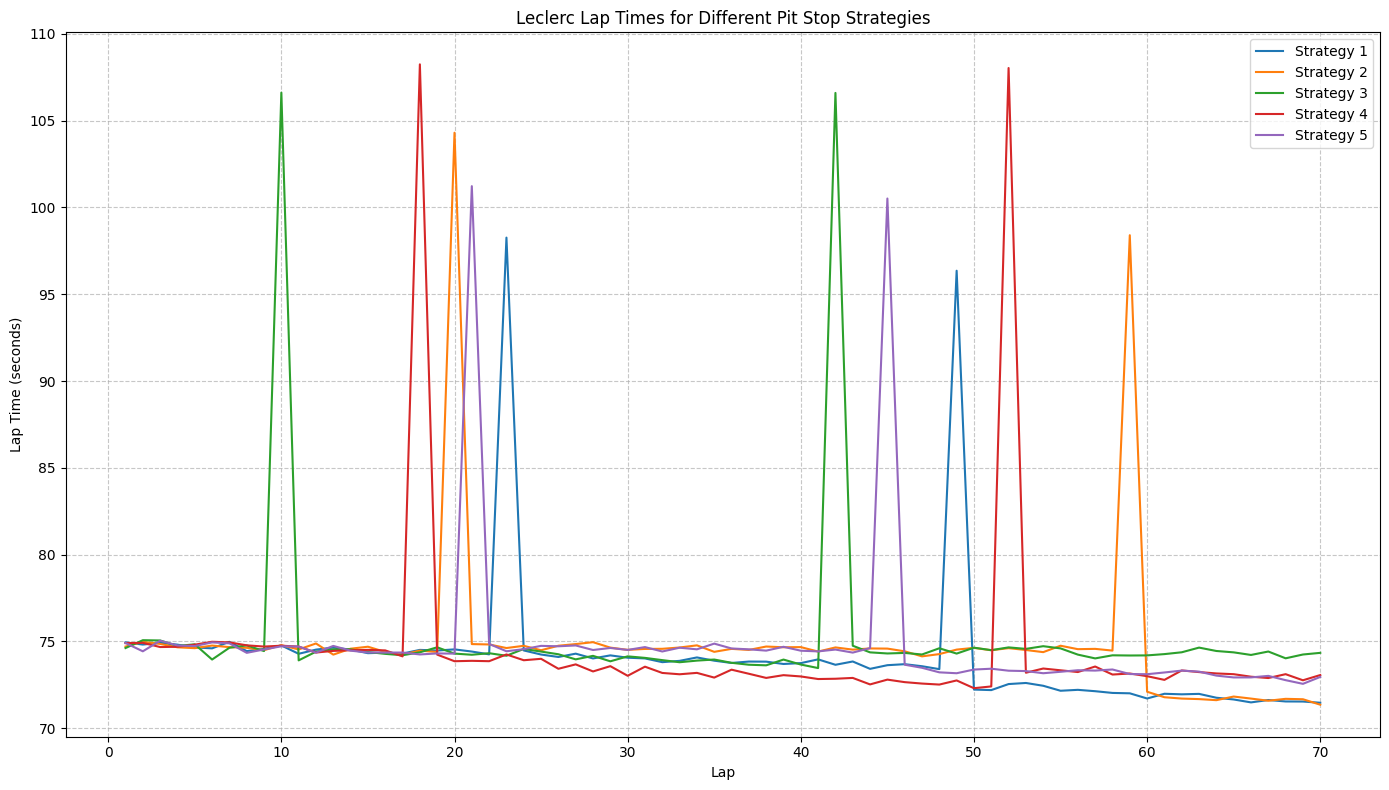

Leclerc's Performance for Different Pit Stop Strategies:
Strategy 1: Initial Position: 11, Final Position: 4, Pit Stops: Lap 23: MEDIUM, Lap 49: MEDIUM
Strategy 2: Initial Position: 11, Final Position: 16, Pit Stops: Lap 20: MEDIUM, Lap 59: SOFT
Strategy 3: Initial Position: 11, Final Position: 19, Pit Stops: Lap 10: MEDIUM, Lap 42: MEDIUM
Strategy 4: Initial Position: 11, Final Position: 12, Pit Stops: Lap 18: MEDIUM, Lap 52: HARD
Strategy 5: Initial Position: 11, Final Position: 15, Pit Stops: Lap 21: MEDIUM, Lap 45: SOFT


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Define different pit stop strategies for Leclerc ensuring at least two different compounds are used
leclerc_pit_strategies = [
    (range(15, 25), range(45, 55), ['MEDIUM', 'HARD', 'SOFT']),  # Strategy 1
    (range(20, 30), range(50, 60), ['SOFT', 'HARD', 'MEDIUM']),  # Strategy 2
    (range(10, 20), range(40, 50), ['MEDIUM', 'SOFT', 'HARD']),  # Strategy 3
    (range(15, 25), range(50, 60), ['HARD', 'MEDIUM', 'SOFT']),  # Strategy 4
    (range(20, 30), range(45, 55), ['SOFT', 'MEDIUM', 'HARD']),  # Strategy 5
]

# Run simulations for each strategy
results = {}
for strategy_idx, (pit_window1, pit_window2, tyres) in enumerate(leclerc_pit_strategies):
    # Initialize dictionaries to store results
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    # Set pit stop strategy for Leclerc
    driver_pit_laps = {
        driver: [random.choice(pit_window1), random.choice(pit_window2)] if driver == '16' else [random.choice(range(15, 25)), random.choice(range(45, 55))]
        for driver in driver_info.keys()
    }

    # Simulation loop
    current_tyre = {driver: 'MEDIUM' for driver in driver_info.keys()}  # Start all drivers on MEDIUM
    leclerc_tyre_strategy = ['MEDIUM'] + tyres.copy()  # Include initial tyre for printing

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver])
            tyre_deg = tyre_deg_rates[current_tyre[driver]] * lap
            lap_time = prime_time + random_variation + tyre_deg

            time_diff = 0  # Initialize time_diff
            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus
                        tyre_deg *= dirty_air_factor

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop
                if driver == '16':
                    current_tyre[driver] = tyres.pop(0)  # Update to next tyre in strategy

            race_lap_times[driver].append(lap_time)

            if idx > 0 and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    pit_stops = [(lap, tyre) for lap, tyre in zip(driver_pit_laps['16'], leclerc_tyre_strategy)]

    results[f"Strategy {strategy_idx + 1}"] = {
        'lap_times': race_lap_times['16'],
        'final_position': final_positions['16'],
        'initial_position': initial_positions['16'],
        'pit_stops': pit_stops
    }

# Plot the lap times for Leclerc for each strategy
plt.figure(figsize=(14, 8))
for strategy_idx in range(len(leclerc_pit_strategies)):
    strategy_key = f"Strategy {strategy_idx + 1}"
    plt.plot(range(1, num_laps + 1), results[strategy_key]['lap_times'], label=strategy_key)
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Leclerc Lap Times for Different Pit Stop Strategies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print Leclerc's performance for each strategy
print("Leclerc's Performance for Different Pit Stop Strategies:")
for strategy_idx in range(len(leclerc_pit_strategies)):
    strategy_key = f"Strategy {strategy_idx + 1}"
    result = results[strategy_key]
    pit_stop_details = ", ".join([f"Lap {lap}: {tyre}" for lap, tyre in result['pit_stops']])
    print(f"{strategy_key}: Initial Position: {result['initial_position']}, Final Position: {result['final_position']}, Pit Stops: {pit_stop_details}")


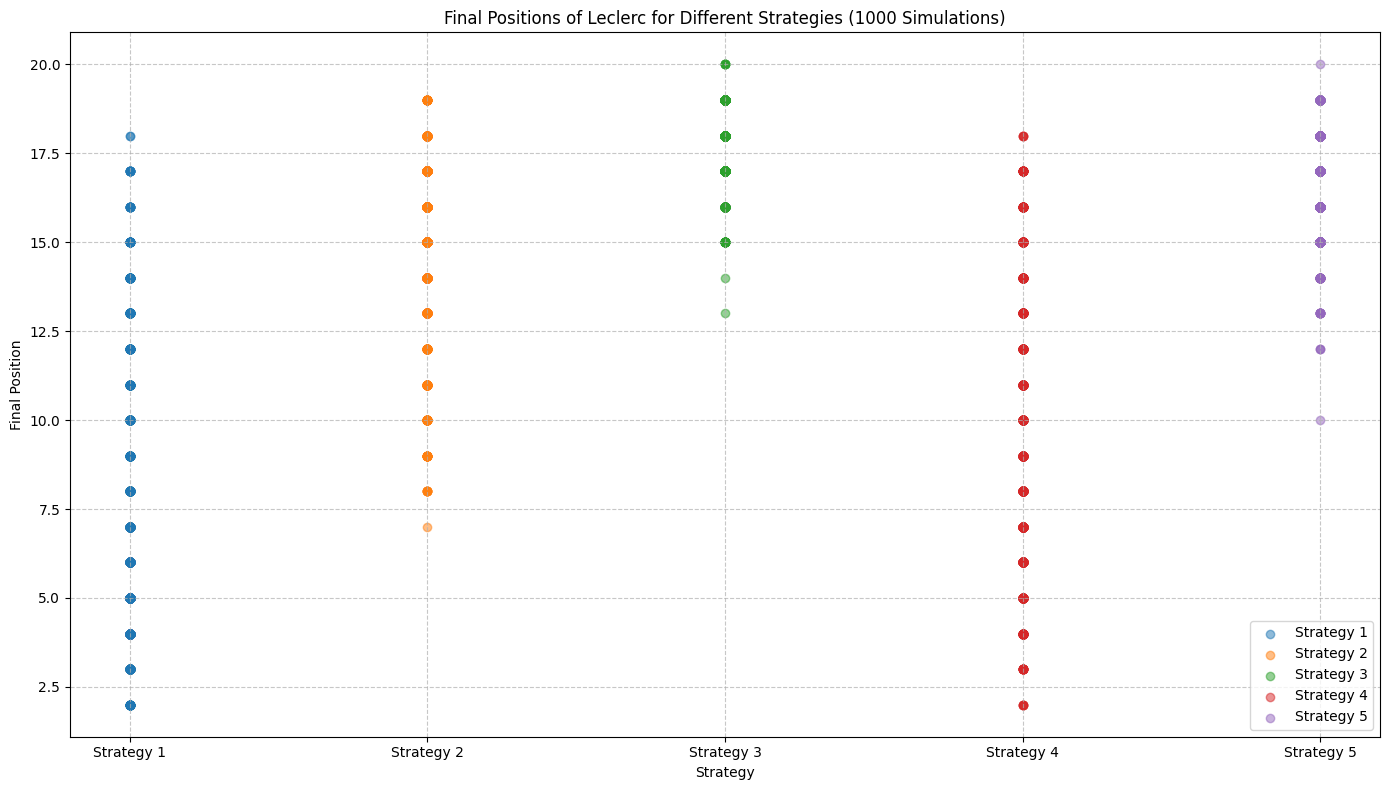

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Define different pit stop strategies for Leclerc ensuring at least two different compounds are used
leclerc_pit_strategies = [
    (range(15, 25), range(45, 55), ['MEDIUM', 'HARD', 'SOFT']),  # Strategy 1
    (range(20, 30), range(50, 60), ['SOFT', 'HARD', 'MEDIUM']),  # Strategy 2
    (range(10, 20), range(40, 50), ['MEDIUM', 'SOFT', 'HARD']),  # Strategy 3
    (range(15, 25), range(50, 60), ['HARD', 'MEDIUM', 'SOFT']),  # Strategy 4
    (range(20, 30), range(45, 55), ['SOFT', 'MEDIUM', 'HARD']),  # Strategy 5
]

# Number of simulations
num_simulations = 1000

# Run simulations for each strategy and collect final positions
final_positions_data = {f"Strategy {i+1}": [] for i in range(len(leclerc_pit_strategies))}

for sim in range(num_simulations):
    for strategy_idx, (pit_window1, pit_window2, tyres) in enumerate(leclerc_pit_strategies):
        # Initialize dictionaries to store results
        race_lap_times = {driver: [] for driver in driver_info.keys()}
        overtakes = {driver: 0 for driver in driver_info.keys()}
        total_overtakes = 0

        # Set pit stop strategy for Leclerc
        driver_pit_laps = {
            driver: [random.choice(pit_window1), random.choice(pit_window2)] if driver == '16' else [random.choice(range(15, 25)), random.choice(range(45, 55))]
            for driver in driver_info.keys()
        }

        # Simulation loop
        current_tyre = {driver: 'MEDIUM' for driver in driver_info.keys()}  # Start all drivers on MEDIUM
        leclerc_tyre_strategy = ['MEDIUM'] + tyres.copy()  # Include initial tyre for printing
        tyres_copy = tyres.copy()  # Copy tyres for the current simulation

        for lap in range(1, num_laps + 1):
            if lap == 1:
                sorted_drivers = [driver for driver in driver_info.keys()]
            else:
                sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

            for idx, driver in enumerate(sorted_drivers):
                prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
                random_variation = np.random.normal(0, driver_stddev[driver])
                tyre_deg = tyre_deg_rates[current_tyre[driver]] * lap
                lap_time = prime_time + random_variation + tyre_deg

                time_diff = 0  # Initialize time_diff
                if lap > 2 and idx > 0:
                    ahead_driver = sorted_drivers[idx - 1]
                    if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                        time_diff = race_lap_times[ahead_driver][-1] - lap_time
                        if 0 < time_diff <= 1:
                            lap_time -= drs_bonus
                            tyre_deg *= dirty_air_factor

                lap_time -= track_evolution_factor * lap

                if lap in driver_pit_laps[driver]:
                    pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                    lap_time += pit_stop_time  # Simulate pit stop
                    if driver == '16':
                        current_tyre[driver] = tyres_copy.pop(0)  # Update to next tyre in strategy

                race_lap_times[driver].append(lap_time)

                if idx > 0 and time_diff >= overtaking_threshold:
                    overtakes[driver] += 1
                    total_overtakes += 1  # Increment total overtakes in the race
                    sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                    race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

        for driver in race_lap_times:
            if len(race_lap_times[driver]) < num_laps:
                race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

        total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
        sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
        final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

        final_positions_data[f"Strategy {strategy_idx + 1}"].append(final_positions['16'])

# Prepare data for plotting
strategy_names = list(final_positions_data.keys())
data = [final_positions_data[strategy] for strategy in strategy_names]

# Create a scatter plot
plt.figure(figsize=(14, 8))
for i, strategy in enumerate(strategy_names):
    y = data[i]
    x = [strategy] * len(y)
    plt.scatter(x, y, alpha=0.5, label=strategy)

plt.xlabel('Strategy')
plt.ylabel('Final Position')
plt.title('Final Positions of Leclerc for Different Strategies (1000 Simulations)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


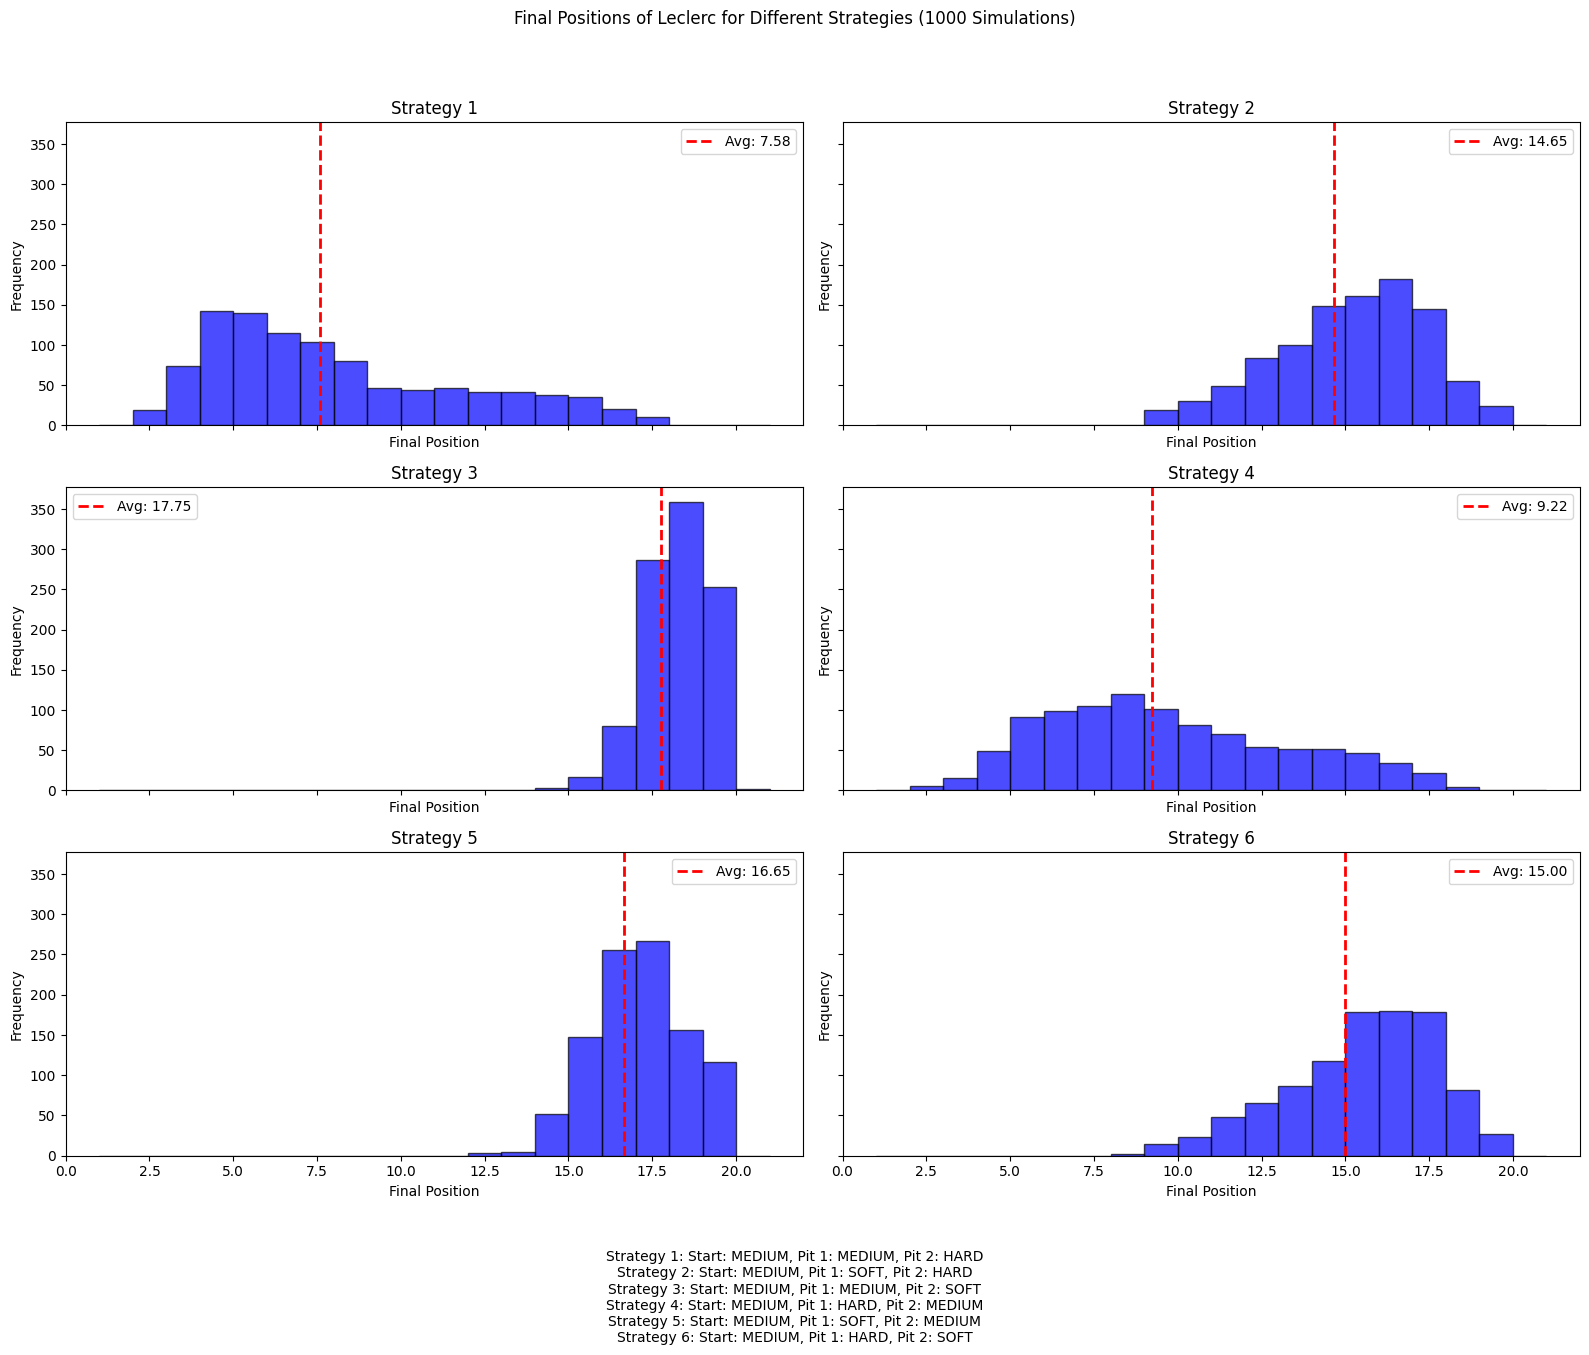

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Define different pit stop strategies for Leclerc ensuring at least two different compounds are used
leclerc_pit_strategies = [
    (range(15, 25), range(45, 55), ['MEDIUM', 'HARD']),  # Strategy 1
    (range(20, 30), range(50, 60), ['SOFT', 'HARD']),    # Strategy 2
    (range(10, 20), range(40, 50), ['MEDIUM', 'SOFT']),  # Strategy 3
    (range(15, 25), range(50, 60), ['HARD', 'MEDIUM']),  # Strategy 4
    (range(20, 30), range(45, 55), ['SOFT', 'MEDIUM']),  # Strategy 5
    (range(18, 28), range(48, 58), ['HARD', 'SOFT']),    # Strategy 6
]

# Number of simulations
num_simulations = 1000

# Run simulations for each strategy and collect final positions
final_positions_data = {f"Strategy {i+1}": [] for i in range(len(leclerc_pit_strategies))}

for sim in range(num_simulations):
    for strategy_idx, (pit_window1, pit_window2, tyres) in enumerate(leclerc_pit_strategies):
        # Initialize dictionaries to store results
        race_lap_times = {driver: [] for driver in driver_info.keys()}
        overtakes = {driver: 0 for driver in driver_info.keys()}
        total_overtakes = 0

        # Set pit stop strategy for Leclerc
        driver_pit_laps = {
            driver: [random.choice(pit_window1), random.choice(pit_window2)] if driver == '16' else [random.choice(range(15, 25)), random.choice(range(45, 55))]
            for driver in driver_info.keys()
        }

        # Simulation loop
        current_tyre = {driver: 'MEDIUM' for driver in driver_info.keys()}  # Start all drivers on MEDIUM
        leclerc_tyre_strategy = ['MEDIUM'] + tyres.copy()  # Include initial tyre for printing
        tyres_copy = tyres.copy()  # Copy tyres for the current simulation

        for lap in range(1, num_laps + 1):
            if lap == 1:
                sorted_drivers = [driver for driver in driver_info.keys()]
            else:
                sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

            for idx, driver in enumerate(sorted_drivers):
                prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
                random_variation = np.random.normal(0, driver_stddev[driver])
                tyre_deg = tyre_deg_rates[current_tyre[driver]] * lap
                lap_time = prime_time + random_variation + tyre_deg

                time_diff = 0  # Initialize time_diff
                if lap > 2 and idx > 0:
                    ahead_driver = sorted_drivers[idx - 1]
                    if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                        time_diff = race_lap_times[ahead_driver][-1] - lap_time
                        if 0 < time_diff <= 1:
                            lap_time -= drs_bonus
                            tyre_deg *= dirty_air_factor

                lap_time -= track_evolution_factor * lap

                if lap in driver_pit_laps[driver]:
                    pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                    lap_time += pit_stop_time  # Simulate pit stop
                    if driver == '16':
                        current_tyre[driver] = tyres_copy.pop(0)  # Update to next tyre in strategy

                race_lap_times[driver].append(lap_time)

                if idx > 0 and time_diff >= overtaking_threshold:
                    overtakes[driver] += 1
                    total_overtakes += 1  # Increment total overtakes in the race
                    sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                    race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

        for driver in race_lap_times:
            if len(race_lap_times[driver]) < num_laps:
                race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

        total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
        sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
        final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

        final_positions_data[f"Strategy {strategy_idx + 1}"].append(final_positions['16'])

# Prepare data for plotting
strategy_names = list(final_positions_data.keys())
data = [final_positions_data[strategy] for strategy in strategy_names]
avg_positions = [np.mean(data[i]) for i in range(len(strategy_names))]

# Create histograms for each strategy
fig, axes = plt.subplots(3, 2, figsize=(16, 14), sharex=True, sharey=True)
axes = axes.flatten()

for i, strategy in enumerate(strategy_names):
    axes[i].hist(data[i], bins=range(1, 22), alpha=0.7, color='blue', edgecolor='black')
    axes[i].axvline(x=avg_positions[i], color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_positions[i]:.2f}')
    axes[i].set_title(strategy)
    axes[i].set_xlabel('Final Position')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.suptitle('Final Positions of Leclerc for Different Strategies (1000 Simulations)')
plt.tight_layout(rect=[0, 0.12, 1, 0.95])

# Create legend for the strategies
strategy_details = [
    f"Strategy {i+1}: Start: MEDIUM, Pit 1: {leclerc_pit_strategies[i][2][0]}, Pit 2: {leclerc_pit_strategies[i][2][1]}"
    for i in range(len(leclerc_pit_strategies))
]
plt.figtext(0.5, 0.03, "\n".join(strategy_details), wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


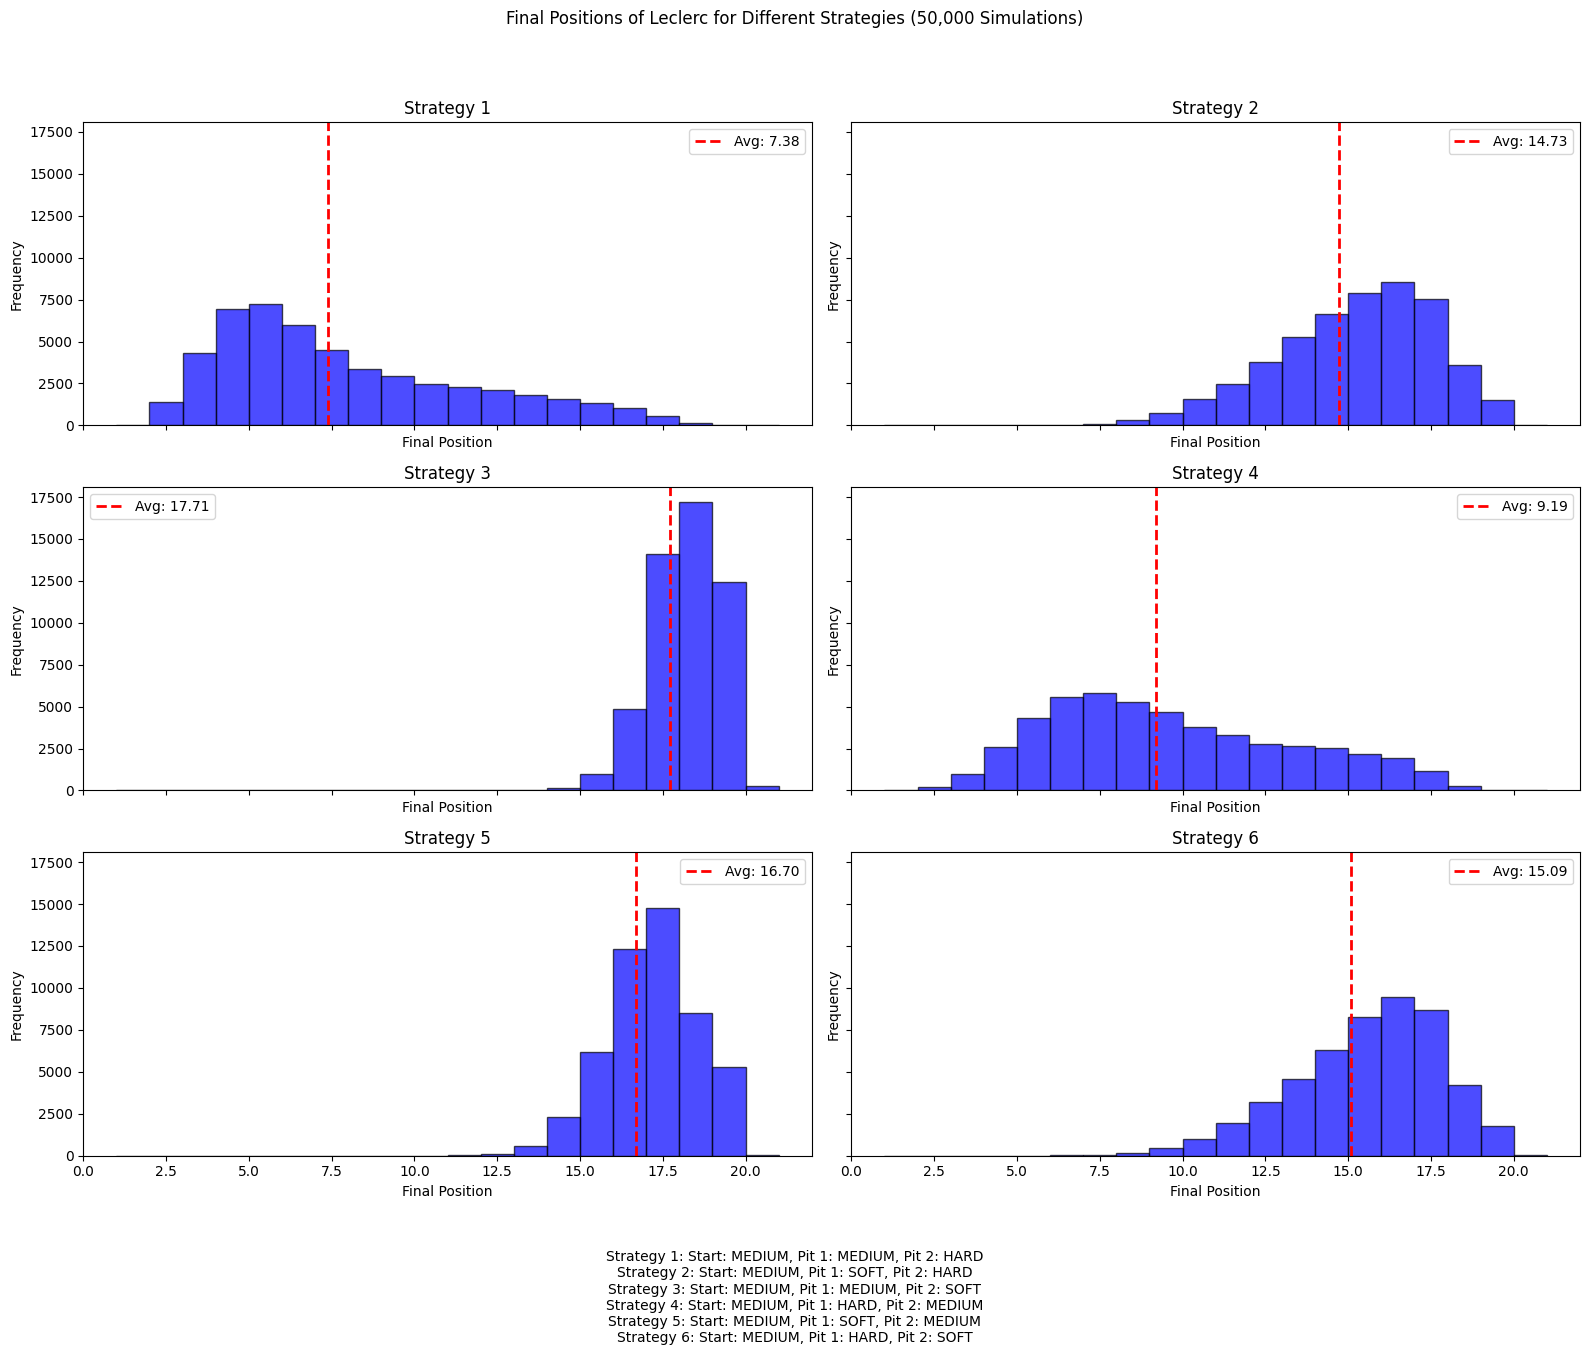

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Define different pit stop strategies for Leclerc ensuring at least two different compounds are used
leclerc_pit_strategies = [
    (range(15, 25), range(45, 55), ['MEDIUM', 'HARD']),  # Strategy 1
    (range(20, 30), range(50, 60), ['SOFT', 'HARD']),    # Strategy 2
    (range(10, 20), range(40, 50), ['MEDIUM', 'SOFT']),  # Strategy 3
    (range(15, 25), range(50, 60), ['HARD', 'MEDIUM']),  # Strategy 4
    (range(20, 30), range(45, 55), ['SOFT', 'MEDIUM']),  # Strategy 5
    (range(18, 28), range(48, 58), ['HARD', 'SOFT']),    # Strategy 6
]

# Number of simulations
num_simulations = 50000

# Run simulations for each strategy and collect final positions
final_positions_data = {f"Strategy {i+1}": [] for i in range(len(leclerc_pit_strategies))}

for sim in range(num_simulations):
    for strategy_idx, (pit_window1, pit_window2, tyres) in enumerate(leclerc_pit_strategies):
        # Initialize dictionaries to store results
        race_lap_times = {driver: [] for driver in driver_info.keys()}
        overtakes = {driver: 0 for driver in driver_info.keys()}
        total_overtakes = 0

        # Set pit stop strategy for Leclerc
        driver_pit_laps = {
            driver: [random.choice(pit_window1), random.choice(pit_window2)] if driver == '16' else [random.choice(range(15, 25)), random.choice(range(45, 55))]
            for driver in driver_info.keys()
        }

        # Simulation loop
        current_tyre = {driver: 'MEDIUM' for driver in driver_info.keys()}  # Start all drivers on MEDIUM
        leclerc_tyre_strategy = ['MEDIUM'] + tyres.copy()  # Include initial tyre for printing
        tyres_copy = tyres.copy()  # Copy tyres for the current simulation

        for lap in range(1, num_laps + 1):
            if lap == 1:
                sorted_drivers = [driver for driver in driver_info.keys()]
            else:
                sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

            for idx, driver in enumerate(sorted_drivers):
                prime_time = driver_prime_times.get(driver_info[driver], 100)  # Use driver-specific prime time
                random_variation = np.random.normal(0, driver_stddev[driver])
                tyre_deg = tyre_deg_rates[current_tyre[driver]] * lap
                lap_time = prime_time + random_variation + tyre_deg

                time_diff = 0  # Initialize time_diff
                if lap > 2 and idx > 0:
                    ahead_driver = sorted_drivers[idx - 1]
                    if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                        time_diff = race_lap_times[ahead_driver][-1] - lap_time
                        if 0 < time_diff <= 1:
                            lap_time -= drs_bonus
                            tyre_deg *= dirty_air_factor

                lap_time -= track_evolution_factor * lap

                if lap in driver_pit_laps[driver]:
                    pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                    lap_time += pit_stop_time  # Simulate pit stop
                    if driver == '16':
                        current_tyre[driver] = tyres_copy.pop(0)  # Update to next tyre in strategy

                race_lap_times[driver].append(lap_time)

                if idx > 0 and time_diff >= overtaking_threshold:
                    overtakes[driver] += 1
                    total_overtakes += 1  # Increment total overtakes in the race
                    sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                    race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

        for driver in race_lap_times:
            if len(race_lap_times[driver]) < num_laps:
                race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

        total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
        sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
        final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

        final_positions_data[f"Strategy {strategy_idx + 1}"].append(final_positions['16'])

# Prepare data for plotting
strategy_names = list(final_positions_data.keys())
data = [final_positions_data[strategy] for strategy in strategy_names]
avg_positions = [np.mean(data[i]) for i in range(len(strategy_names))]

# Create histograms for each strategy
fig, axes = plt.subplots(3, 2, figsize=(16, 14), sharex=True, sharey=True)
axes = axes.flatten()

for i, strategy in enumerate(strategy_names):
    axes[i].hist(data[i], bins=range(1, 22), alpha=0.7, color='blue', edgecolor='black')
    axes[i].axvline(x=avg_positions[i], color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_positions[i]:.2f}')
    axes[i].set_title(strategy)
    axes[i].set_xlabel('Final Position')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.suptitle('Final Positions of Leclerc for Different Strategies (50,000 Simulations)')
plt.tight_layout(rect=[0, 0.12, 1, 0.95])

# Create legend for the strategies
strategy_details = [
    f"Strategy {i+1}: Start: MEDIUM, Pit 1: {leclerc_pit_strategies[i][2][0]}, Pit 2: {leclerc_pit_strategies[i][2][1]}"
    for i in range(len(leclerc_pit_strategies))
]
plt.figtext(0.5, 0.03, "\n".join(strategy_details), wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


# EA driver ratings


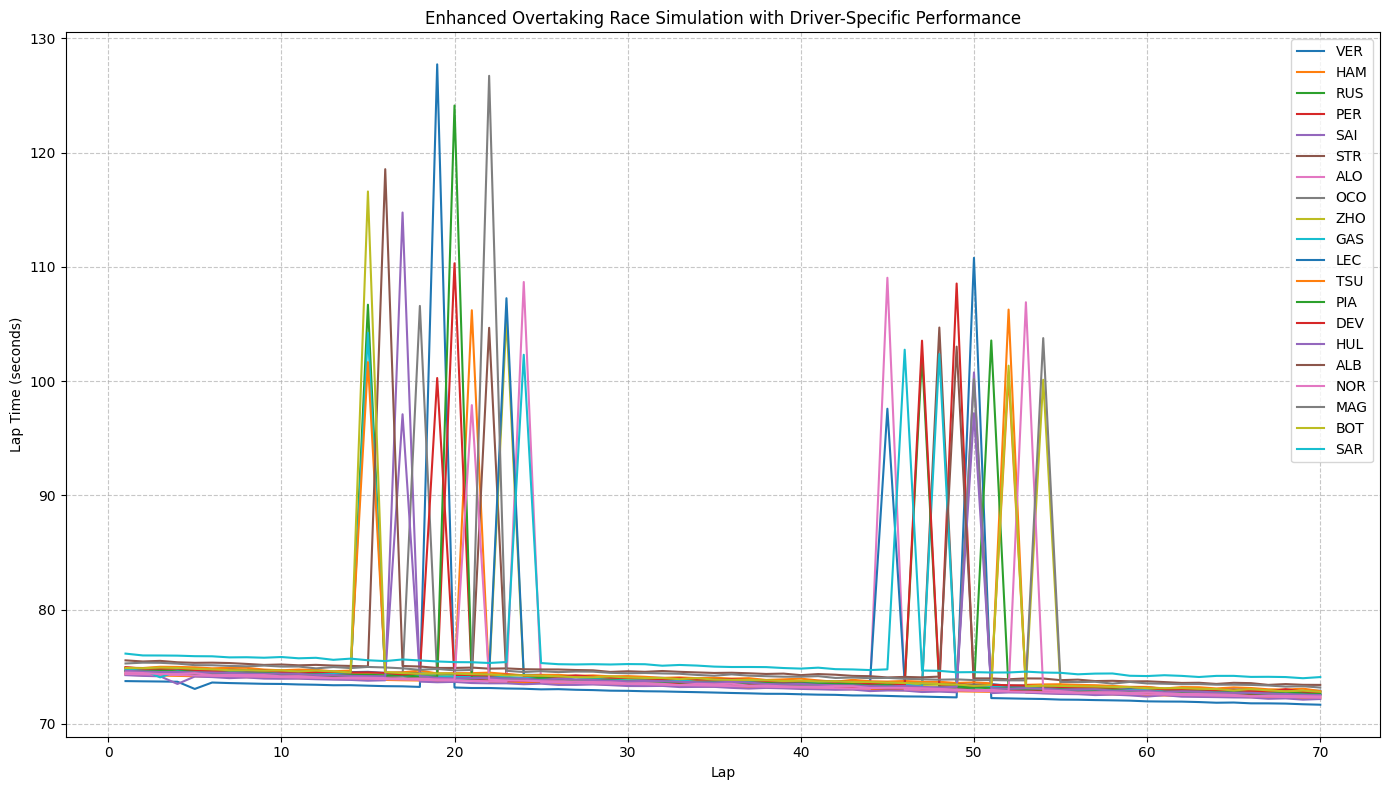

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 1
Driver: HAM, Initial Position: 2, Final Position: 3
Driver: RUS, Initial Position: 3, Final Position: 9
Driver: PER, Initial Position: 4, Final Position: 8
Driver: SAI, Initial Position: 5, Final Position: 2
Driver: STR, Initial Position: 6, Final Position: 11
Driver: ALO, Initial Position: 7, Final Position: 6
Driver: OCO, Initial Position: 8, Final Position: 7
Driver: ZHO, Initial Position: 9, Final Position: 12
Driver: GAS, Initial Position: 10, Final Position: 10
Driver: LEC, Initial Position: 11, Final Position: 14
Driver: TSU, Initial Position: 12, Final Position: 15
Driver: PIA, Initial Position: 13, Final Position: 16
Driver: DEV, Initial Position: 14, Final Position: 13
Driver: HUL, Initial Position: 15, Final Position: 5
Driver: ALB, Initial Position: 16, Final Position: 19
Driver: NOR, Initial Position: 17, Final Position: 4
Driver: MAG, Initial Position: 18, Final Position: 18
Driver: BOT,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Initialize pit stop strategy
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionaries to store results
race_lap_times = {driver: [] for driver in driver_info.keys()}
overtakes = {driver: 0 for driver in driver_info.keys()}
total_overtakes = 0

# Simulation loop
for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver in initial_positions.keys()]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    for idx, driver in enumerate(sorted_drivers):
        ratings = driver_ratings[driver_info[driver]]
        prime_time = driver_prime_times[driver_info[driver]]  # Use driver-specific prime time
        random_variation = np.random.normal(0, driver_stddev[driver] * (100 - ratings['Experience']) / 100)
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        time_diff = 0  # Initialize time_diff
        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                time_diff = race_lap_times[ahead_driver][-1] - lap_time
                if 0 < time_diff <= 1:
                    lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                    tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
            lap_time += pit_stop_time  # Simulate pit stop

        race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold:
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

# Convert race lap times to DataFrame for plotting
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the lap times
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation with Driver-Specific Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print driver stats and total overtakes
print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}")
print(f"Total Overtakes in Race: {total_overtakes}")

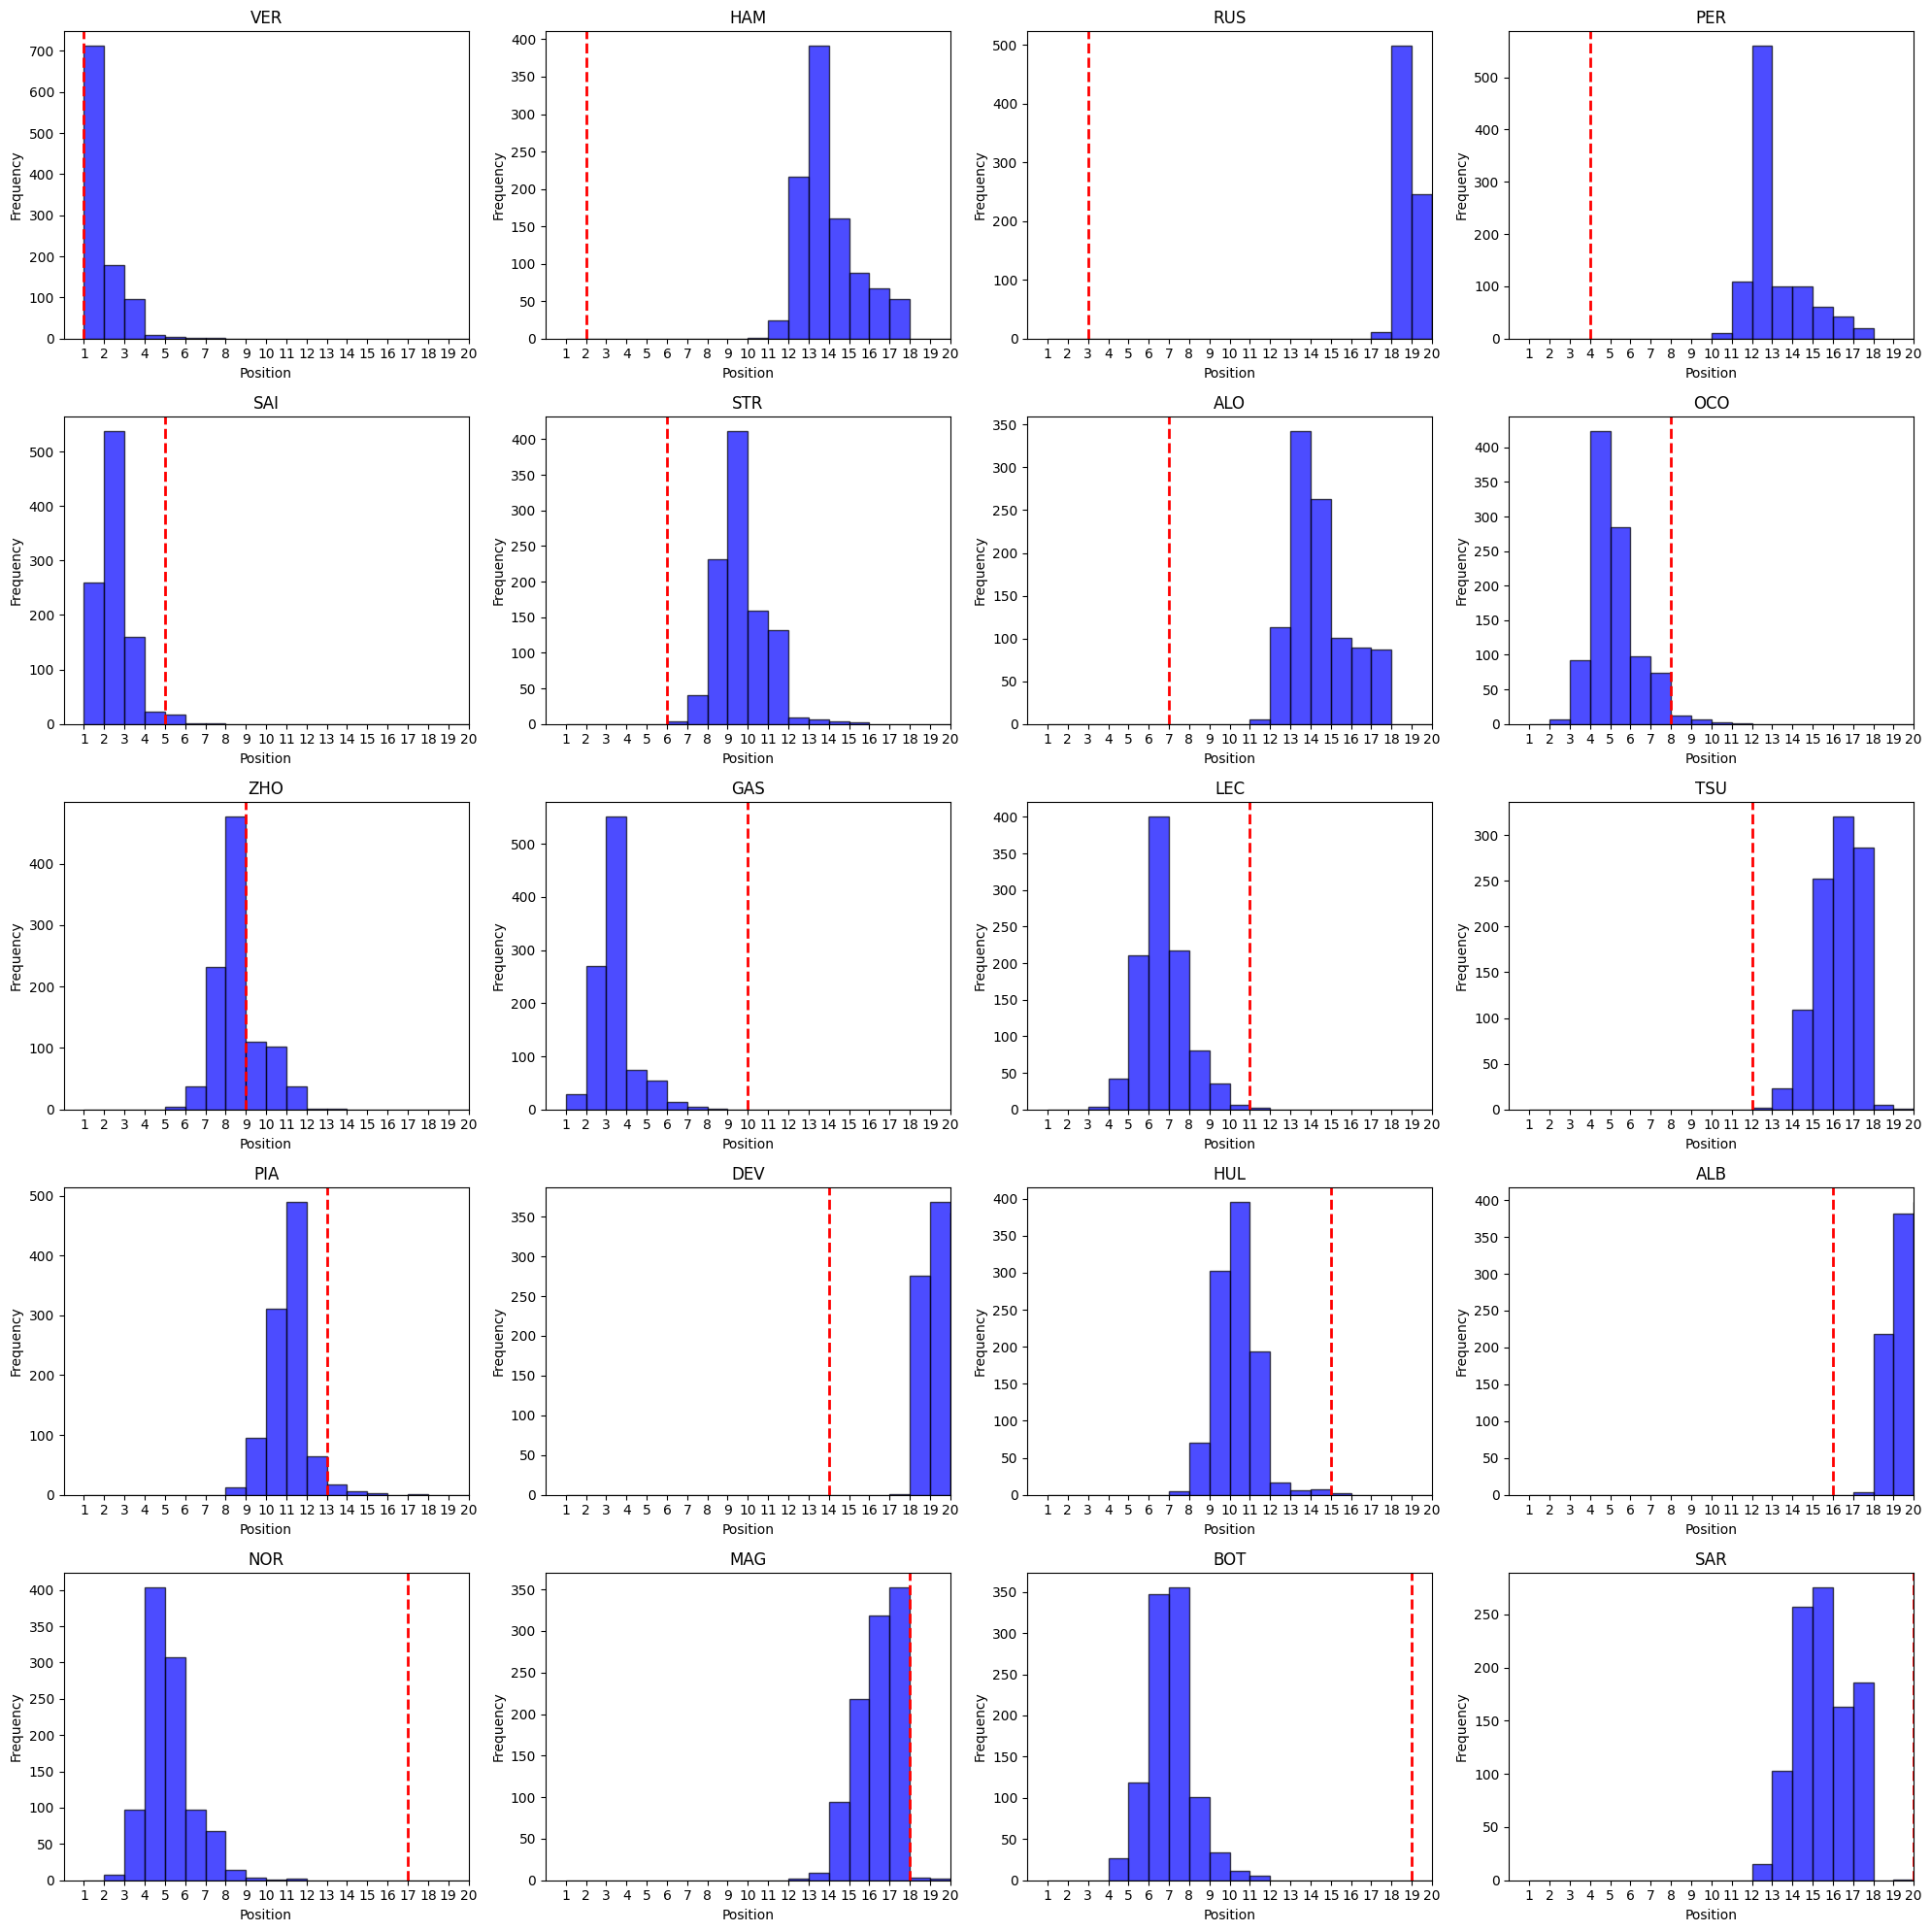

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Updated driver prime times
driver_prime_times = {
    'VER': 80.18,
    'SAI': 80.43,
    'NOR': 80.80,
    'GAS': 80.72,
    'HAM': 82.27,
    'STR': 81.50,
    'OCO': 80.92,
    'HUL': 81.67,
    'ALO': 82.31,
    'PIA': 81.86,
    'PER': 82.14,
    'RUS': 83.26,
    'DEV': 83.33,
    'TSU': 82.56,
    'BOT': 81.19,
    'MAG': 82.56,
    'ALB': 83.34,
    'LEC': 81.10,
    'SAR': 82.43,
    'ZHO': 81.43
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Initialize pit stop strategy
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        for idx, driver in enumerate(sorted_drivers):
            ratings = driver_ratings[driver_info[driver]]
            prime_time = driver_prime_times[driver_info[driver]]  # Use driver-specific prime time
            random_variation = np.random.normal(0, driver_stddev[driver] * (100 - ratings['Experience']) / 100)
            tyre_deg = tyre_deg_rates['MEDIUM'] * lap
            lap_time = prime_time + random_variation + tyre_deg

            time_diff = 0  # Initialize time_diff
            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                        tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()

# This will plot the histograms for each driver with the real race position highlighted in red.


# Race Simulation Pace

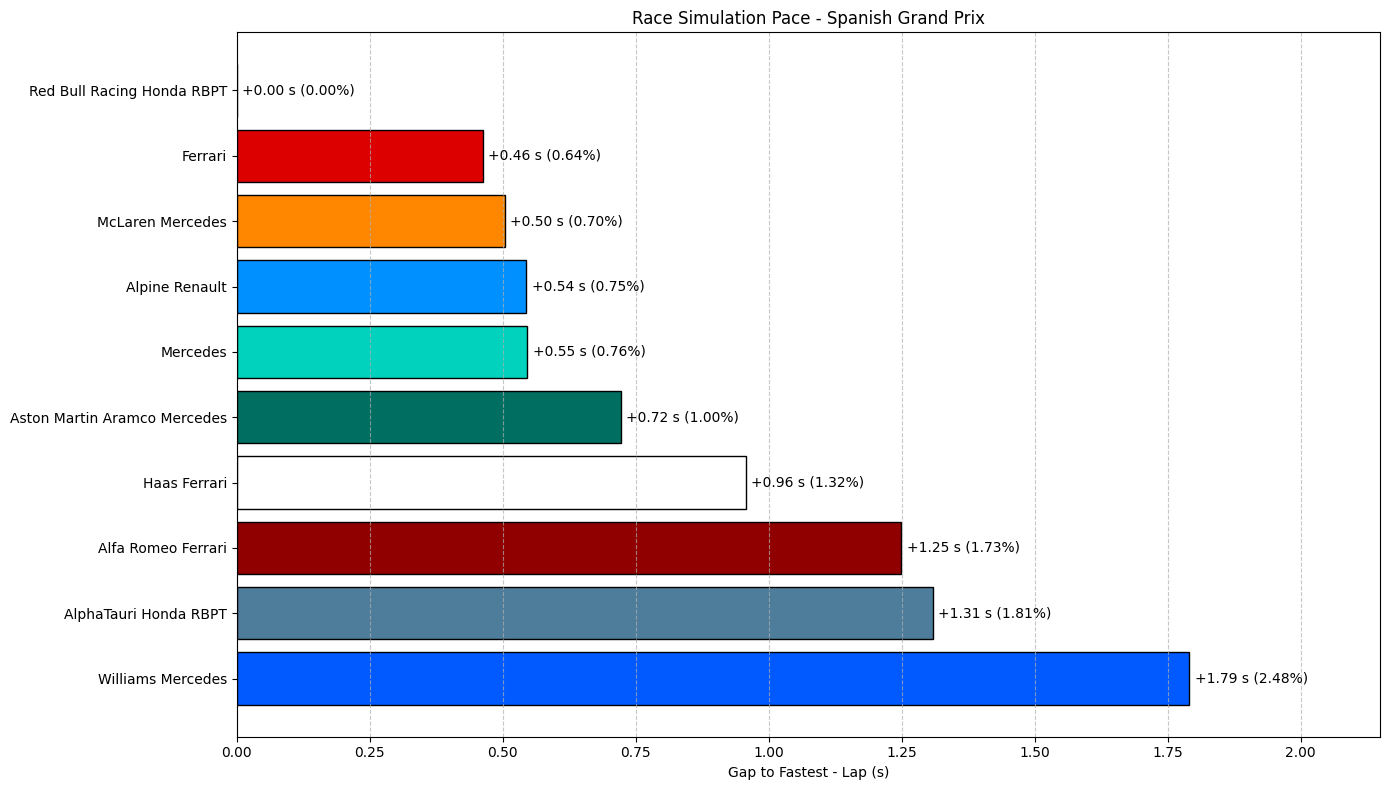

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Qualifying data
data = {
    'Pos': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'No': [1, 55, 4, 10, 44, 18, 31, 27, 14, 81, 11, 63, 24, 21, 22, 77, 20, 23, 16, 2],
    'Driver': ['Max Verstappen', 'Carlos Sainz', 'Lando Norris', 'Pierre Gasly', 'Lewis Hamilton', 'Lance Stroll', 'Esteban Ocon', 'Nico Hulkenberg', 'Fernando Alonso', 'Oscar Piastri', 'Sergio Perez', 'George Russell', 'Zhou Guanyu', 'Nyck De Vries', 'Yuki Tsunoda', 'Valtteri Bottas', 'Kevin Magnussen', 'Alexander Albon', 'Charles Leclerc', 'Logan Sargeant'],
    'Car': ['Red Bull Racing Honda RBPT', 'Ferrari', 'McLaren Mercedes', 'Alpine Renault', 'Mercedes', 'Aston Martin Aramco Mercedes', 'Alpine Renault', 'Haas Ferrari', 'Aston Martin Aramco Mercedes', 'McLaren Mercedes', 'Red Bull Racing Honda RBPT', 'Mercedes', 'Alfa Romeo Ferrari', 'AlphaTauri Honda RBPT', 'AlphaTauri Honda RBPT', 'Alfa Romeo Ferrari', 'Haas Ferrari', 'Williams Mercedes', 'Ferrari', 'Williams Mercedes'],
    'Q1': ['1:13.615', '1:13.411', '1:13.295', '1:13.471', '1:12.937', '1:13.766', '1:13.433', '1:13.420', '1:13.747', '1:13.691', '1:13.874', '1:13.326', '1:13.677', '1:13.581', '1:13.862', '1:13.977', '1:14.042', '1:14.063', '1:14.079', '1:14.699'],
    'Q2': ['1:12.760', '1:12.790', '1:12.776', '1:13.186', '1:12.999', '1:13.082', '1:13.001', '1:13.283', '1:13.098', '1:13.059', '1:13.334', '1:13.447', '1:13.521', '1:14.083', '1:14.477', None, None, None, None, None],
    'Q3': ['1:12.272', '1:12.734', '1:12.792', '1:12.816', '1:12.818', '1:12.994', '1:13.083', '1:13.229', '1:13.507', '1:13.682', None, None, None, None, None, None, None, None, None, None],
    'Laps': [20, 22, 22, 21, 23, 23, 21, 18, 18, 20, 17, 18, 16, 16, 19, 10, 9, 8, 10, 6]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to convert lap time to seconds
def convert_lap_time(lap_time_str):
    if not lap_time_str:
        return float('inf')
    mins, secs = map(float, lap_time_str.split(":"))
    return mins * 60 + secs

# Add a column for the fastest lap time
df['FastestLap'] = df[['Q1', 'Q2', 'Q3']].applymap(convert_lap_time).min(axis=1)

# Find the fastest lap time per team
team_fastest_laps = df.groupby('Car')['FastestLap'].min().reset_index()
team_fastest_laps = team_fastest_laps.sort_values(by='FastestLap').reset_index(drop=True)

# Define team colors
team_colors = {
    'Red Bull Racing Honda RBPT': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren Mercedes': '#FF8700',
    'Alpine Renault': '#0090FF',
    'Mercedes': '#00D2BE',
    'Aston Martin Aramco Mercedes': '#006F62',
    'Haas Ferrari': '#FFFFFF',
    'Alfa Romeo Ferrari': '#900000',
    'AlphaTauri Honda RBPT': '#4E7C9B',
    'Williams Mercedes': '#005AFF'
}

# Prepare data for plotting
teams = team_fastest_laps['Car']
gaps = team_fastest_laps['FastestLap'] - team_fastest_laps['FastestLap'].min()
percent_gaps = (gaps / team_fastest_laps['FastestLap'].min()) * 100
colors = [team_colors.get(team, '#000000') for team in teams]

# Sort teams by fastest lap times in descending order
team_fastest_laps = team_fastest_laps.sort_values(by='FastestLap').reset_index(drop=True)

# Prepare data for plotting
teams = team_fastest_laps['Car']
gaps = team_fastest_laps['FastestLap'] - team_fastest_laps['FastestLap'].min()
percent_gaps = (gaps / team_fastest_laps['FastestLap'].min()) * 100
colors = [team_colors.get(team, '#000000') for team in teams]

# Plot the data
plt.figure(figsize=(14, 8))  # Increased the width
bars = plt.barh(teams[::-1], gaps[::-1], color=colors[::-1], edgecolor='black')  # Reverse order for top-to-bottom plotting
plt.xlabel('Gap to Fastest - Lap (s)')
plt.title('Race Simulation Pace - Spanish Grand Prix')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, gaps.max() * 1.2)  # Adjust xlim to ensure all text fits within the border

# Annotate the bars with the gap times and percentages
for bar, gap, percent_gap in zip(bars, gaps[::-1], percent_gaps[::-1]):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f"+{gap:.2f} s ({percent_gap:.2f}%)", va='center')

plt.tight_layout()
plt.show()


# SC VC RF Weather

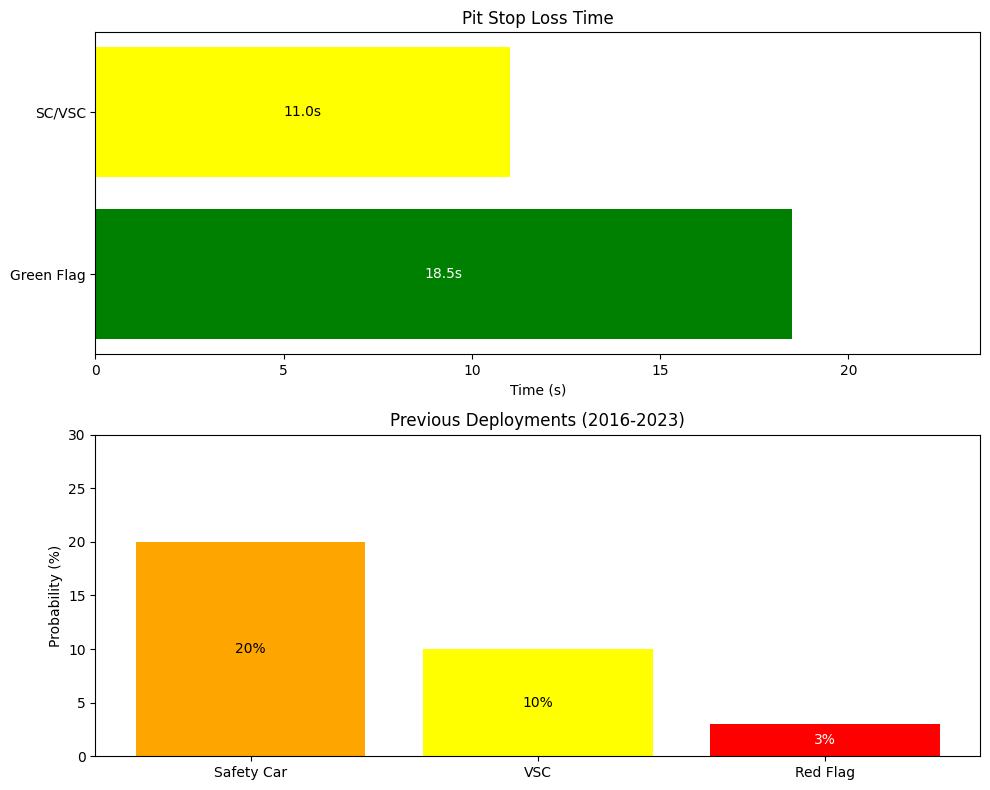

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
avg_green_flag_time = 18.5  # seconds
avg_sc_vsc_time = 11.0      # seconds
sc_probability = 20         # percent
vsc_probability = 10        # percent
red_flag_probability = 3    # percent

# Plot the data
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Pit stop times
ax[0].barh(['Green Flag'], [avg_green_flag_time], color='green')
ax[0].text(avg_green_flag_time / 2, 0, f'{avg_green_flag_time:.1f}s', va='center', ha='center', color='white')
ax[0].barh(['SC/VSC'], [avg_sc_vsc_time], color='yellow')
ax[0].text(avg_sc_vsc_time / 2, 1, f'{avg_sc_vsc_time:.1f}s', va='center', ha='center', color='black')
ax[0].set_xlim(0, max(avg_green_flag_time, avg_sc_vsc_time) + 5)
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Pit Stop Loss Time')

# Previous deployments
ax[1].bar(['Safety Car', 'VSC', 'Red Flag'], [sc_probability, vsc_probability, red_flag_probability], color=['orange', 'yellow', 'red'])
ax[1].text(0, sc_probability / 2, f'{sc_probability:.0f}%', va='center', ha='center', color='black')
ax[1].text(1, vsc_probability / 2, f'{vsc_probability:.0f}%', va='center', ha='center', color='black')
ax[1].text(2, red_flag_probability / 2, f'{red_flag_probability:.0f}%', va='center', ha='center', color='white')
ax[1].set_ylim(0, max(sc_probability, vsc_probability, red_flag_probability) + 10)
ax[1].set_ylabel('Probability (%)')
ax[1].set_title('Previous Deployments (2016-2023)')

plt.tight_layout()
plt.show()


# SC VC Race Sim Update


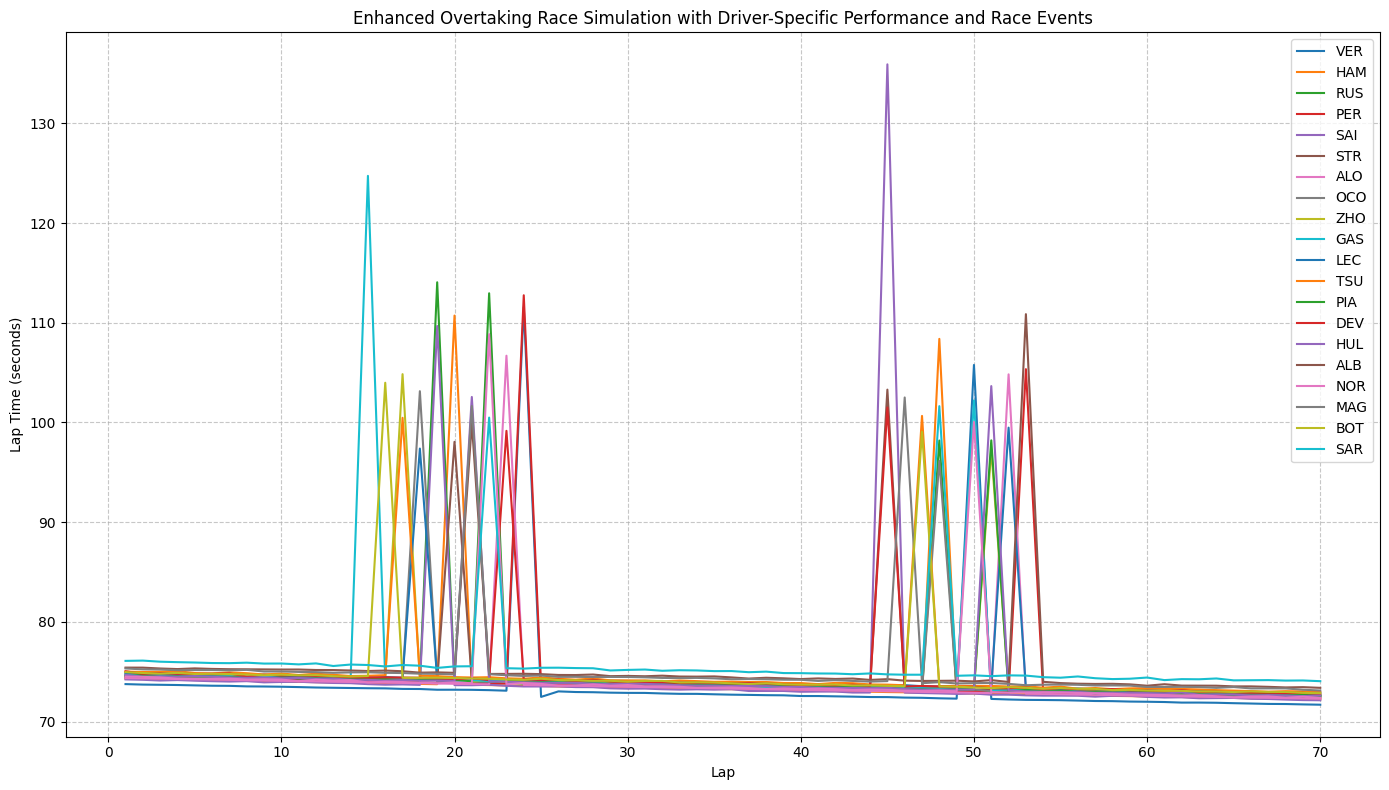

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 1
Driver: HAM, Initial Position: 2, Final Position: 3
Driver: RUS, Initial Position: 3, Final Position: 9
Driver: PER, Initial Position: 4, Final Position: 7
Driver: SAI, Initial Position: 5, Final Position: 13
Driver: STR, Initial Position: 6, Final Position: 6
Driver: ALO, Initial Position: 7, Final Position: 2
Driver: OCO, Initial Position: 8, Final Position: 5
Driver: ZHO, Initial Position: 9, Final Position: 10
Driver: GAS, Initial Position: 10, Final Position: 17
Driver: LEC, Initial Position: 11, Final Position: 12
Driver: TSU, Initial Position: 12, Final Position: 16
Driver: PIA, Initial Position: 13, Final Position: 11
Driver: DEV, Initial Position: 14, Final Position: 14
Driver: HUL, Initial Position: 15, Final Position: 8
Driver: ALB, Initial Position: 16, Final Position: 19
Driver: NOR, Initial Position: 17, Final Position: 4
Driver: MAG, Initial Position: 18, Final Position: 18
Driver: BOT,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Function to determine if a race event occurs
def determine_race_event():
    events = ['None', 'SC', 'VSC', 'Red Flag']
    probabilities = [0.8, 0.1, 0.07, 0.03]  # Example probabilities
    return np.random.choice(events, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Event durations
sc_duration = 3  # Safety Car duration in laps
vsc_duration = 2  # Virtual Safety Car duration in laps
red_flag_duration = 5  # Red Flag duration in laps

# Initialize pit stop strategy
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionaries to store results
race_lap_times = {driver: [] for driver in driver_info.keys()}
overtakes = {driver: 0 for driver in driver_info.keys()}
total_overtakes = 0

# Simulation loop
for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver in initial_positions.keys()]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    # Determine race event
    if lap % 10 == 0:  # Check for events every 10 laps
        event = determine_race_event()
        if event == 'SC':
            sc_active = True
            event_remaining_laps = sc_duration
        elif event == 'VSC':
            vsc_active = True
            event_remaining_laps = vsc_duration
        elif event == 'Red Flag':
            red_flag_active = True
            event_remaining_laps = red_flag_duration

    for idx, driver in enumerate(sorted_drivers):
        ratings = driver_ratings[driver_info[driver]]
        prime_time = driver_prime_times[driver_info[driver]]  # Use driver-specific prime time
        random_variation = np.random.normal(0, driver_stddev[driver] * (100 - ratings['Experience']) / 100)
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

        # Adjust lap times based on active events
        if 'sc_active' in locals() and sc_active:
            lap_time += 20  # Add time for Safety Car
        elif 'vsc_active' in locals() and vsc_active:
            lap_time += 10  # Add time for Virtual Safety Car
        elif 'red_flag_active' in locals() and red_flag_active:
            lap_time = np.nan  # No lap time for Red Flag period

        time_diff = 0  # Initialize time_diff
        if lap > 2 and idx > 0 and not ('red_flag_active' in locals() and red_flag_active):
            ahead_driver = sorted_drivers[idx - 1]
            if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                time_diff = race_lap_times[ahead_driver][-1] - lap_time
                if 0 < time_diff <= 1:
                    lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                    tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

        if not ('red_flag_active' in locals() and red_flag_active):
            lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver] and not ('red_flag_active' in locals() and red_flag_active):
            pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
            lap_time += pit_stop_time  # Simulate pit stop

        if not ('red_flag_active' in locals() and red_flag_active):
            race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold and not ('red_flag_active' in locals() and red_flag_active):
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    # Update the event state
    if 'sc_active' in locals() and sc_active or 'vsc_active' in locals() and vsc_active or 'red_flag_active' in locals() and red_flag_active:
        event_remaining_laps -= 1
        if event_remaining_laps == 0:
            sc_active = False
            vsc_active = False
            red_flag_active = False

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

# Convert race lap times to DataFrame for plotting
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the lap times
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Enhanced Overtaking Race Simulation with Driver-Specific Performance and Race Events')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print driver stats and total overtakes
print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}")
print(f"Total Overtakes in Race: {total_overtakes}")


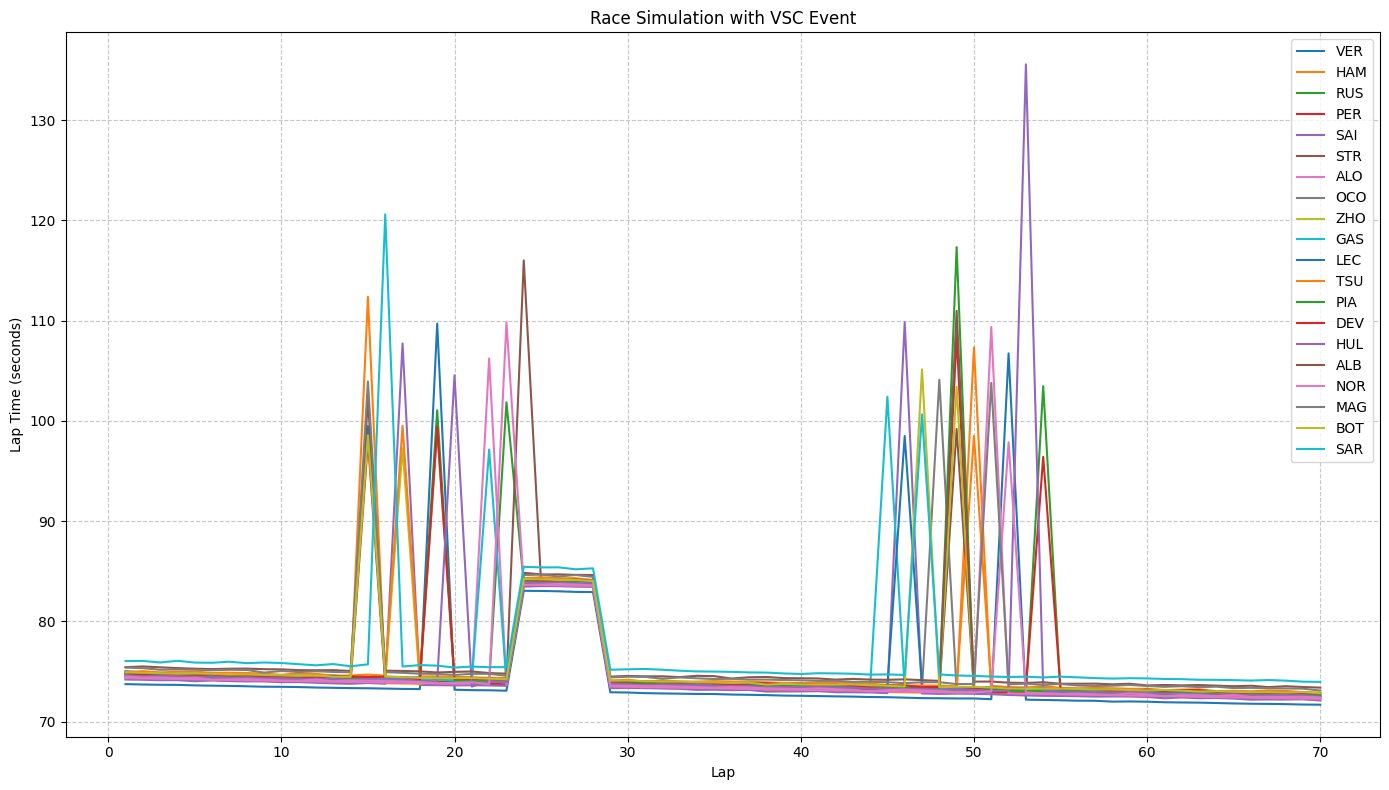

Driver Stats and Total Overtakes:
Driver: VER, Initial Position: 1, Final Position: 1
Driver: HAM, Initial Position: 2, Final Position: 5
Driver: RUS, Initial Position: 3, Final Position: 7
Driver: PER, Initial Position: 4, Final Position: 3
Driver: SAI, Initial Position: 5, Final Position: 2
Driver: STR, Initial Position: 6, Final Position: 10
Driver: ALO, Initial Position: 7, Final Position: 6
Driver: OCO, Initial Position: 8, Final Position: 8
Driver: ZHO, Initial Position: 9, Final Position: 11
Driver: GAS, Initial Position: 10, Final Position: 9
Driver: LEC, Initial Position: 11, Final Position: 13
Driver: TSU, Initial Position: 12, Final Position: 16
Driver: PIA, Initial Position: 13, Final Position: 14
Driver: DEV, Initial Position: 14, Final Position: 12
Driver: HUL, Initial Position: 15, Final Position: 17
Driver: ALB, Initial Position: 16, Final Position: 19
Driver: NOR, Initial Position: 17, Final Position: 4
Driver: MAG, Initial Position: 18, Final Position: 18
Driver: BOT,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

# Initial positions for drivers (based on some previous sorting, assuming 1 to 20)
initial_positions = {driver: idx + 1 for idx, driver in enumerate(driver_info.keys())}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Function to determine if a race event occurs
def determine_race_event():
    events = ['None', 'SC', 'VSC', 'Red Flag']
    probabilities = [0.8, 0.1, 0.07, 0.03]  # Example probabilities
    return np.random.choice(events, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Event durations
vsc_duration = 5  # Virtual Safety Car duration in laps

# Initialize pit stop strategy
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionaries to store results
race_lap_times = {driver: [] for driver in driver_info.keys()}
overtakes = {driver: 0 for driver in driver_info.keys()}
total_overtakes = 0

# Set VSC event
vsc_lap = random.randint(10, 60)  # VSC event occurs at a random lap between 10 and 60

# Simulation loop
for lap in range(1, num_laps + 1):
    if lap == 1:
        sorted_drivers = [driver for driver in initial_positions.keys()]
    else:
        sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

    # Determine if VSC is active
    vsc_active = vsc_lap <= lap < vsc_lap + vsc_duration

    for idx, driver in enumerate(sorted_drivers):
        ratings = driver_ratings[driver_info[driver]]
        prime_time = driver_prime_times[driver_info[driver]]  # Use driver-specific prime time
        random_variation = np.random.normal(0, driver_stddev[driver] * (100 - ratings['Experience']) / 100)
        tyre_deg = tyre_deg_rates['MEDIUM'] * lap
        lap_time = prime_time + random_variation + tyre_deg

               # Adjust lap times based on VSC
        if vsc_active:
            lap_time += 10  # Add time for Virtual Safety Car

        time_diff = 0  # Initialize time_diff
        if lap > 2 and idx > 0:
            ahead_driver = sorted_drivers[idx - 1]
            if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                time_diff = race_lap_times[ahead_driver][-1] - lap_time
                if 0 < time_diff <= 1:
                    lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                    tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

        lap_time -= track_evolution_factor * lap

        if lap in driver_pit_laps[driver]:
            pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
            lap_time += pit_stop_time  # Simulate pit stop

        race_lap_times[driver].append(lap_time)

        if idx > 0 and time_diff >= overtaking_threshold:
            overtakes[driver] += 1
            total_overtakes += 1  # Increment total overtakes in the race
            sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
            race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

for driver in race_lap_times:
    if len(race_lap_times[driver]) < num_laps:
        race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

# Convert race lap times to DataFrame for plotting
race_lap_times_df = pd.DataFrame(race_lap_times)

# Plot the lap times
plt.figure(figsize=(14, 8))
for driver in driver_info.keys():
    plt.plot(race_lap_times_df.index + 1, race_lap_times_df[driver], label=driver_info[driver])
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Race Simulation with VSC Event')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print driver stats and total overtakes
print("Driver Stats and Total Overtakes:")
for driver in driver_info.keys():
    print(f"Driver: {driver_info[driver]}, Initial Position: {initial_positions[driver]}, Final Position: {final_positions[driver]}")
print(f"Total Overtakes in Race: {total_overtakes}")



In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Driver information
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Prime times for each driver
driver_prime_times = {
    'VER': 73.79,
    'SAI': 74.25,
    'NOR': 74.49,
    'GAS': 74.74,
    'HAM': 74.32,
    'STR': 74.70,
    'OCO': 74.63,
    'HUL': 74.66,
    'ALO': 74.39,
    'PIA': 74.71,
    'PER': 74.46,
    'RUS': 74.59,
    'ZHO': 74.83,
    'DEV': 74.92,
    'TSU': 75.06,
    'BOT': 74.95,
    'MAG': 75.34,
    'ALB': 75.51,
    'LEC': 74.95,
    'SAR': 76.09
}

def run_simulation(driver, strategy, num_simulations, initial_position):
    driver_abbr = driver_info[driver]
    num_laps = 70

    # Define common attributes for all strategies
    tyre_deg_rates = {'HARD': 0.015, 'MEDIUM': 0.035, 'SOFT': 0.055}
    common_pit_window1 = range(15, 25)
    common_pit_window2 = range(45, 55)

    # Strategy-specific tire sequences and pit windows
    if strategy in ['Strategy 1', 'Strategy 2', 'Strategy 3', 'Strategy 4', 'Strategy 5']:
        tire_sequences = {
            'Strategy 1': ['SOFT', 'SOFT', 'HARD'],
            'Strategy 2': ['HARD', 'MEDIUM', 'SOFT'],
            'Strategy 3': ['MEDIUM', 'SOFT', 'HARD'],
            'Strategy 4': ['HARD', 'SOFT', 'SOFT'],
            'Strategy 5': ['MEDIUM', 'HARD', 'SOFT']
        }
        tire_sequence = tire_sequences[strategy]
        pit_window1 = common_pit_window1
        pit_window2 = common_pit_window2
    else:  # Strategy 6: One-stop strategy
        tire_sequence = ['HARD', 'MEDIUM']
        pit_window1 = range(30, 40)
        pit_window2 = []

    driver_stddev = {d: 0.15 for d in driver_info.keys()}
    track_evolution_factor = 0.07
    drs_bonus = 0.6
    dirty_air_factor = 1.05

    # Define pit laps for each driver considering empty pit windows
    driver_pit_laps = {
        d: [random.choice(pit_window1)] + ([random.choice(pit_window2)] if pit_window2 else [])
        for d in driver_info.keys()
    }

    positions = []

    for _ in range(num_simulations):
        current_tire_index = 0  # Start with the first tire in the sequence
        race_lap_times = {d: [] for d in driver_info.keys()}
        for lap in range(1, num_laps + 1):
            if lap == 1:
                sorted_drivers = list(driver_info.keys())
                sorted_drivers.remove(driver)
                sorted_drivers.insert(initial_position - 1, driver)
            else:
                sorted_drivers = sorted(race_lap_times.keys(), key=lambda d: race_lap_times[d][-1] if race_lap_times[d] else float('inf'))

            for idx, d in enumerate(sorted_drivers):
                ratings = driver_ratings[driver_info[d]]
                prime_time = driver_prime_times[driver_info[d]]
                tire_choice = tire_sequence[current_tire_index]  # Determine the current tire type
                random_variation = np.random.normal(0, driver_stddev[d] * (100 - ratings['Experience']) / 100)
                tyre_deg = tyre_deg_rates[tire_choice] * lap
                lap_time = prime_time + random_variation + tyre_deg

                time_diff = 0
                if lap > 2 and idx > 0:
                    ahead_driver = sorted_drivers[idx - 1]
                    if race_lap_times[ahead_driver]:
                        time_diff = race_lap_times[ahead_driver][-1] - lap_time
                        if 0 < time_diff <= 1:
                            lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                            tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

                lap_time -= track_evolution_factor * lap

                if lap in driver_pit_laps[d]:
                    if current_tire_index < len(tire_sequence) - 1:
                        current_tire_index += 1  # Move to the next tire in the sequence
                    pit_stop_time = generate_pit_stop_time()
                    lap_time += pit_stop_time

                race_lap_times[d].append(lap_time)

        total_race_times = {d: sum(race_lap_times[d]) for d in race_lap_times}  # Avoid summing NaNs
        sorted_drivers_final = sorted(total_race_times.keys(), key=lambda d: total_race_times[d])
        final_positions = {d: idx + 1 for idx, d in enumerate(sorted_drivers_final)}
        positions.append(final_positions[driver])

    return positions

def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

def plot_histograms(drivers, strategy, num_simulations, initial_position):
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    axs = axs.flatten()

    for i, driver in enumerate(drivers):
        positions = run_simulation(driver, strategy, num_simulations, initial_position)
        axs[i].hist(positions, bins=range(1, 22), edgecolor='black', alpha=0.7, color='blue')
        axs[i].set_title(driver_info[driver])
        axs[i].set_xlabel('Position')
        axs[i].set_ylabel('Frequency')
        axs[i].axvline(x=np.mean(positions), color='red', linestyle='dashed', linewidth=2)
        axs[i].set_xlim(1, 20)

    plt.tight_layout()
    plt.show()

# Specify the drivers you want to simulate
drivers_to_simulate = ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '22', '81', '21', '27', '23', '4', '20', '77', '2']

# Plot the histograms
plot_histograms(drivers_to_simulate, 'Strategy 1', 1000, 1)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Real race positions
real_race_positions = {
    '1': 1,
    '44': 2,
    '63': 3,
    '11': 4,
    '55': 5,
    '18': 6,
    '14': 7,
    '31': 8,
    '24': 9,
    '10': 10,
    '16': 11,
    '22': 12,
    '81': 13,
    '21': 14,
    '27': 15,
    '23': 16,
    '4': 17,
    '20': 18,
    '77': 19,
    '2': 20
}

# EA driver ratings
driver_ratings = {
    'VER': {'Pace': 95, 'Racecraft': 95, 'Awareness': 94, 'Experience': 92},
    'HAM': {'Pace': 93, 'Racecraft': 96, 'Awareness': 93, 'Experience': 97},
    'LEC': {'Pace': 92, 'Racecraft': 88, 'Awareness': 86, 'Experience': 72},
    'SAI': {'Pace': 89, 'Racecraft': 90, 'Awareness': 91, 'Experience': 75},
    'NOR': {'Pace': 87, 'Racecraft': 85, 'Awareness': 84, 'Experience': 65},
    'GAS': {'Pace': 84, 'Racecraft': 86, 'Awareness': 83, 'Experience': 70},
    'STR': {'Pace': 83, 'Racecraft': 80, 'Awareness': 82, 'Experience': 66},
    'OCO': {'Pace': 82, 'Racecraft': 85, 'Awareness': 81, 'Experience': 68},
    'ZHO': {'Pace': 79, 'Racecraft': 78, 'Awareness': 80, 'Experience': 60},
    'TSU': {'Pace': 80, 'Racecraft': 77, 'Awareness': 79, 'Experience': 62},
    'PIA': {'Pace': 81, 'Racecraft': 79, 'Awareness': 81, 'Experience': 61},
    'DEV': {'Pace': 78, 'Racecraft': 76, 'Awareness': 78, 'Experience': 59},
    'HUL': {'Pace': 82, 'Racecraft': 83, 'Awareness': 80, 'Experience': 72},
    'ALB': {'Pace': 80, 'Racecraft': 82, 'Awareness': 79, 'Experience': 64},
    'MAG': {'Pace': 81, 'Racecraft': 81, 'Awareness': 82, 'Experience': 69},
    'BOT': {'Pace': 85, 'Racecraft': 84, 'Awareness': 85, 'Experience': 75},
    'SAR': {'Pace': 77, 'Racecraft': 75, 'Awareness': 77, 'Experience': 58},
    'PER': {'Pace': 89, 'Racecraft': 91, 'Awareness': 87, 'Experience': 83},
    'ALO': {'Pace': 88, 'Racecraft': 94, 'Awareness': 89, 'Experience': 98},
    'RUS': {'Pace': 90, 'Racecraft': 92, 'Awareness': 90, 'Experience': 70},
}

# Driver prime times
driver_prime_times = {
    'VER': 80.18,
    'SAI': 80.43,
    'NOR': 80.80,
    'GAS': 80.72,
    'HAM': 82.27,
    'STR': 81.50,
    'OCO': 80.92,
    'HUL': 81.67,
    'ALO': 82.31,
    'PIA': 81.86,
    'PER': 82.14,
    'RUS': 83.26,
    'DEV': 83.33,
    'TSU': 82.56,
    'BOT': 81.19,
    'MAG': 82.56,
    'ALB': 83.34,
    'LEC': 81.10,
    'SAR': 82.43,
    'ZHO': 81.43
}

# Driver info mapping from number to abbreviation
driver_info = {
    '1': 'VER',
    '44': 'HAM',
    '63': 'RUS',
    '11': 'PER',
    '55': 'SAI',
    '18': 'STR',
    '14': 'ALO',
    '31': 'OCO',
    '24': 'ZHO',
    '10': 'GAS',
    '16': 'LEC',
    '22': 'TSU',
    '81': 'PIA',
    '21': 'DEV',
    '27': 'HUL',
    '23': 'ALB',
    '4': 'NOR',
    '20': 'MAG',
    '77': 'BOT',
    '2': 'SAR'
}

# Function to generate pit stop time with custom probabilities
def generate_pit_stop_time():
    time_ranges = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
    probabilities = [0.15, 0.15, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()  # Normalize probabilities to sum to 1
    return np.random.choice(time_ranges, p=probabilities)

# Simulation parameters
num_laps = 70
tyre_deg_rates = {
    'HARD': 0.02,
    'MEDIUM': 0.04,
    'SOFT': 0.06
}
driver_stddev = {driver: 0.15 for driver in driver_info.keys()}
track_evolution_factor = 0.07
overtaking_threshold = 0.8
drs_bonus = 0.6
dirty_air_factor = 1.05

# Initialize pit stop strategy
pit_window1 = range(15, 25)
pit_window2 = range(45, 55)
driver_pit_laps = {
    driver: [random.choice(pit_window1), random.choice(pit_window2)] for driver in driver_info.keys()
}

# Initialize dictionary to store the finishing positions
finishing_positions = {driver: [] for driver in driver_info.keys()}

# Run the simulation 1000 times
num_simulations = 1000
for _ in range(num_simulations):
    # Reset race lap times and other variables for each simulation
    race_lap_times = {driver: [] for driver in driver_info.keys()}
    overtakes = {driver: 0 for driver in driver_info.keys()}
    total_overtakes = 0

    for lap in range(1, num_laps + 1):
        if lap == 1:
            sorted_drivers = [driver for driver in driver_info.keys()]
        else:
            sorted_drivers = sorted(race_lap_times.keys(), key=lambda driver: race_lap_times[driver][-1])

        ahead_driver = None  # Define ahead_driver outside the loop
        for idx, driver in enumerate(sorted_drivers):
            ratings = driver_ratings[driver_info[driver]]
            prime_time = driver_prime_times[driver_info[driver]]  # Use driver-specific prime time
            tire_choice = 'MEDIUM'  # Assuming medium tire for simplicity, you can enhance this by using strategies
            random_variation = np.random.normal(0, driver_stddev[driver] * (100 - ratings['Experience']) / 100)
            tyre_deg = tyre_deg_rates[tire_choice] * lap
            lap_time = prime_time + random_variation + tyre_deg

            time_diff = 0  # Initialize time_diff
            if lap > 2 and idx > 0:
                ahead_driver = sorted_drivers[idx - 1]
                if race_lap_times[ahead_driver]:  # Ensure there are lap times recorded for the ahead driver
                    time_diff = race_lap_times[ahead_driver][-1] - lap_time
                    if 0 < time_diff <= 1:
                        lap_time -= drs_bonus * (ratings['Racecraft'] / 100)
                        tyre_deg *= dirty_air_factor * (100 - ratings['Awareness']) / 100

            lap_time -= track_evolution_factor * lap

            if lap in driver_pit_laps[driver]:
                pit_stop_time = generate_pit_stop_time()  # Generate pit stop time with custom probabilities
                lap_time += pit_stop_time  # Simulate pit stop

            race_lap_times[driver].append(lap_time)

            if ahead_driver and idx > 0 and race_lap_times[ahead_driver] and time_diff >= overtaking_threshold:
                overtakes[driver] += 1
                total_overtakes += 1  # Increment total overtakes in the race
                sorted_drivers[idx], sorted_drivers[idx - 1] = sorted_drivers[idx - 1], sorted_drivers[idx]
                race_lap_times[ahead_driver][-1] += 0.5  # Penalty for being overtaken

    for driver in race_lap_times:
        if len(race_lap_times[driver]) < num_laps:
            race_lap_times[driver].extend([np.nan] * (num_laps - len(race_lap_times[driver])))

    total_race_times = {driver: sum([lap for lap in race_lap_times[driver] if not np.isnan(lap)]) for driver in race_lap_times}
    sorted_drivers_final = sorted(total_race_times.keys(), key=lambda driver: total_race_times[driver])
    final_positions = {driver: idx + 1 for idx, driver in enumerate(sorted_drivers_final)}

    for driver, position in final_positions.items():
        finishing_positions[driver].append(position)

# Plot the histograms
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for idx, (driver, positions) in enumerate(finishing_positions.items()):
    ax = axes[idx]
    ax.hist(positions, bins=range(1, 22), color='blue', edgecolor='black', alpha=0.7)
    real_position = real_race_positions[driver]
    ax.axvline(real_position, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f"{driver_info[driver]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()
